### CA1 – Machine Learning for Business HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CCT-College-Dublin/ca1-50-CristhianMacedo2024104)

# 1. Introduction

This project aims to complete the first Assessment Task for the module Machine Learning for Business from the course Higher Diploma in Science in Data Analytics for Business by CCT College Dublin, this is a document to describe the project itself whose name is “CristhianMacedo_MLBusinessHDip_CA1.ipynb”. This Machine Learning project uses the programming language Python, the environment of Anaconda Navigator with Jupyter Notebook, with CRISP-DM methodology as project management.

The area that has been chosen to be covered is "Agriculture, Fisheries and Forestry and Food", with a data set about Dry Bean with 13,611 images of grains of seven different dry beans from the catalogue of the UC Irvine Machine Learning Repository and for Time Series task has been chosen the (GC=F) database about the Gold during 5 years updated on Thu 24 Oct 2024 16:02 Dublin, Ireland time zone.

**PROJECT OBJECTIVES**

After a search of a few data sets about Food, it was found that data of Beans that showed interesting to be analysed, the Dry beans database was chosen specifically for the use of clustering using unsupervised Machine Learning, such as K-Means Clustering, Hierarchical Clustering, K-Medoids Clustering, DBSCAN, OPTICS Clustering and Fuzzy C-means Clustering, were all of them it will be carried out to answer the questions below:

- What are the similarities or dissimilarities between the clusters?
- Which clustering solution showed the best performance? 
- Which clustering algorithm is easy to use?

The second step of this assessment task that will be carried out is about Time Series. The data that has been chosen is about Gold during the last five years, from 2019-10-24 to 2024-10-24, updated on Thu 24 Oct 2024 16:02 Dublin, Ireland time zone, and it will answer the question:

- How to analyse and work with Time Series?
- What would be a prediction of the value of Gold for the future?

# 2. Data Understanding

This first stage will cover some approaches to understanding the database, first importing the libraries such as pandas to manipulate the data, loading the database and setting in a Data Frame variable called "`df`", inspecting the data frame to get the head, shape, info, describe, is null, and so on, to understand the size of the data frame, to get information as how many feature and observations there exist, also whether have or not missing values and so on, getting an overview for the next steps, also reading the Data Dictionary to be more familiar with the values.

## 2.1 Importing Libraries

Starting to import some libraries such as "`pandas`" to start the project and "`warnings`" to suppress the warnings using a filter of warnings "`warnings.filterwarnings("ignore")`", other libraries will be added at the body of the notebook once needed it with a description.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## 2.2 Loading Data 

Creating a Data Frame named "`df`" after loading the data set "`Dry_Bean_Dataset.xlsx`" using the command "`.read_excel()`".

In [2]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

### 2.3 Inspecting the Data Set

Getting the "`Head`" of the data frame using the command "`.head()`" and understanding how the first 5 observations were presented as default and the features.

In [3]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

Getting the "`Shape`" of the data frame using the command "`.shape`", presenting the size of **13611 observations (Rows)** and **17 features (Columns)**.

In [4]:
df.shape

(13611, 17)

Getting the "`Info`" of the data frame using the command "`.info()`", this concise summary shows some interesting information about the data frame such as there are **13611 entries**, **0 to 13610 observations** in this data frame, *Data columns (total 17 columns)*, # showing the index of the features, Column's name, Non-Null Count in this case, it is already possible to notice that there are no features missing values, Dtype describing the type of each feature and an overview of dtypes: float64(14), int64(2), object(1) and memory usage of this data frame, in this case: 1.8+ MB.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Getting a "`Describe`" of the data frame using the command "`.describe()`", shows a table describing statistics information about each numerical feature, in this case having 14 float64, whose features are: Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4, 2 int64 Area and ConvexArea, and 1 object Class.
This statistical information involves the `count, mean, standard deviation, min, Q1 25%, Q2 50%, Q3 75% and max` for each numerical feature.

In [6]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

Getting the "`Null information`" of the data frame using the command "`.isnull().sum()`", checking the missing values in the data frame, there exist no features missing values.

In [7]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Utilised a matrix graphic imported from "`missingno`" library to see in the graphic how the missing values would be if exists distributed along the feature, first using `pip install` to install the "`missingno`" dependences, next importing it as "`msno`" and next plotting it, with **13611** observations in total.

In [8]:
# pip install missingno

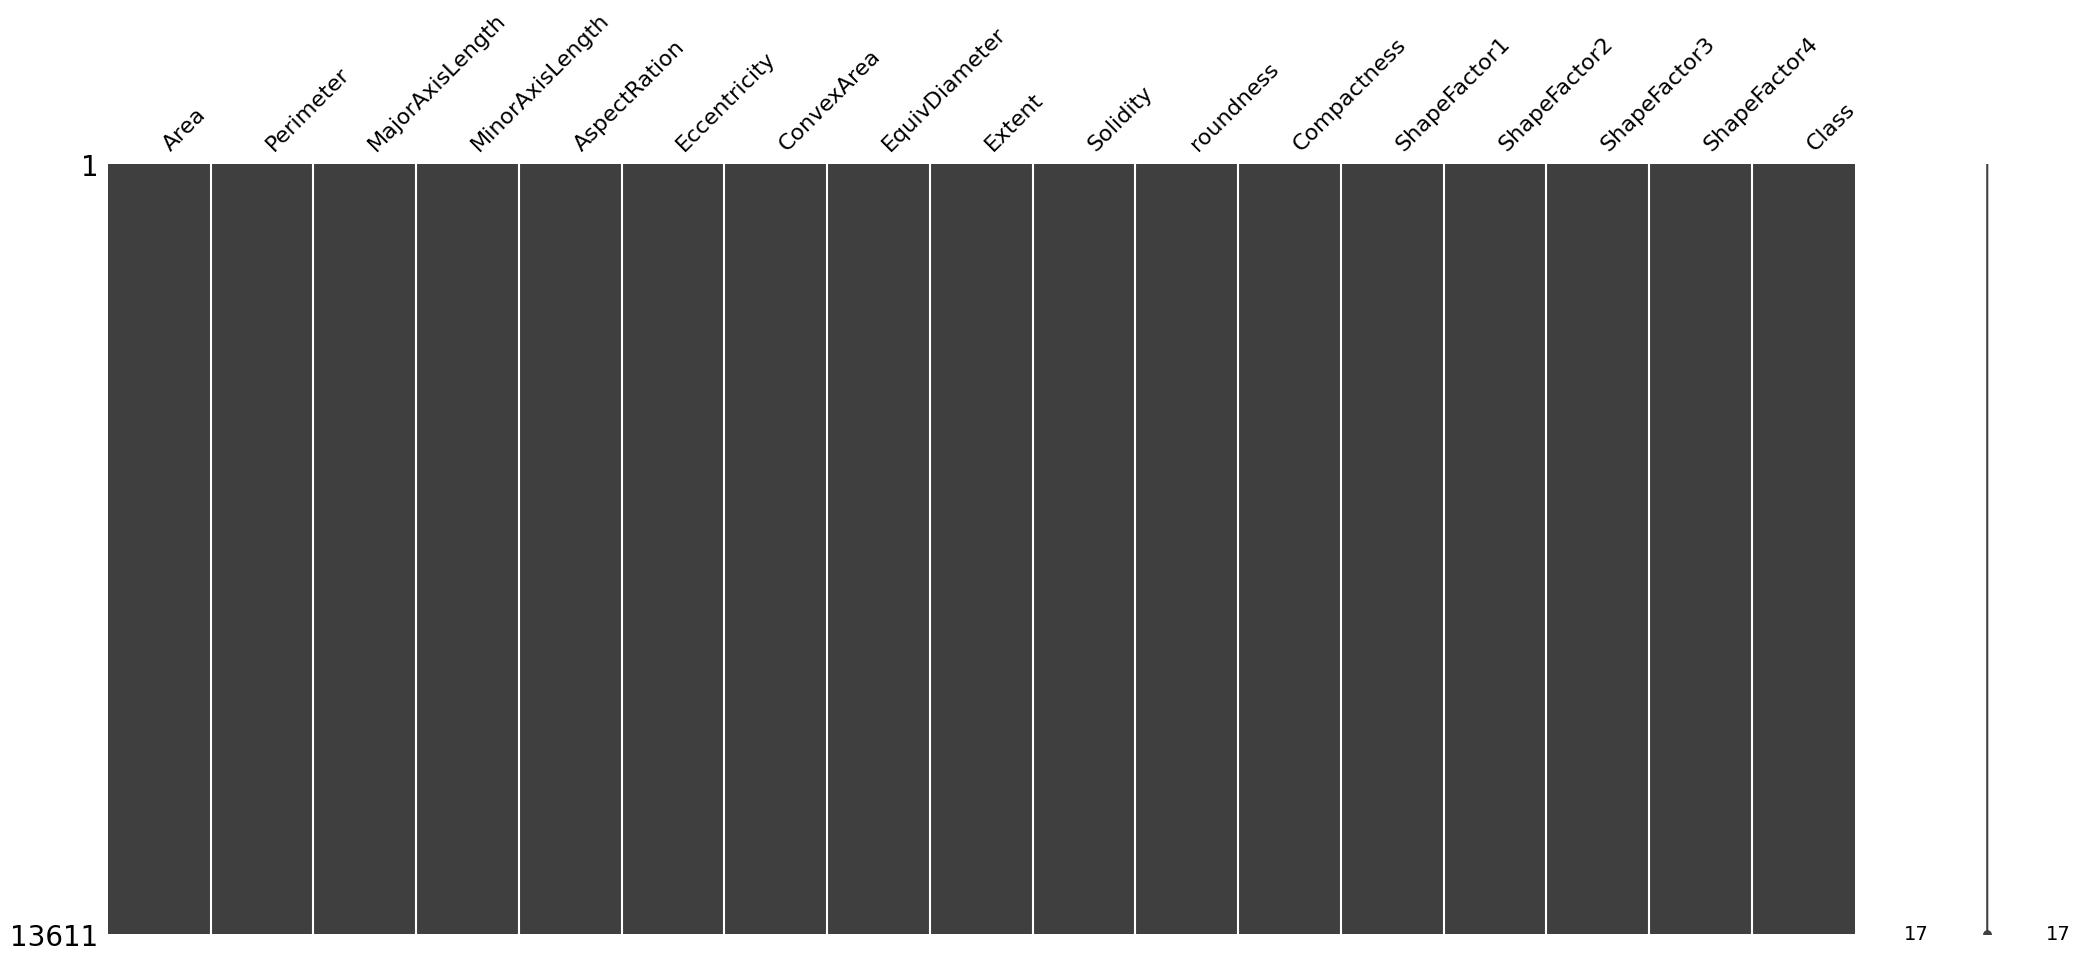

In [9]:
import missingno as msno

ax = msno.matrix(df)

Getting "`Duplicates`" of the data frame using the command "`.duplicated()`", shows whether the data set has duplicated observations. In this case, there are 68 duplicated observations to be handled.

In [10]:
df[df.duplicated()].shape

(68, 17)

Checking the "head" of missing values, but in this case is hard to be sure if these values are duplicated.

In [11]:
df[df.duplicated()].head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5505  33518    702.956       277.571399       154.305581      1.798842   
5509  33954    716.750       277.368480       156.356326      1.773951   
5548  38427    756.323       306.533886       160.591784      1.908777   
5554  38891    791.343       319.499996       156.869619      2.036723   
5599  40804    790.802       323.475648       163.287717      1.981016   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
5505      0.831240       34023     206.582775  0.808383  0.985157   0.852377   
5509      0.825970       34420     207.922042  0.799482  0.986461   0.830549   
5548      0.851782       38773     221.193978  0.796976  0.991076   0.844174   
5554      0.871168       39651     222.525412  0.650025  0.980833   0.780422   
5599      0.863241       41636     227.932592  0.787570  0.980017   0.819931   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
5505     0.744251      0.008281      0.001567      0.553909      0.996396   
5509     0.749624      0.008169      0.001591      0.561936      0.996847   
5548     0.721597      0.007977      0.001334      0.520702      0.993905   
5554     0.696480      0.008215      0.001192      0.485085      0.987983   
5599     0.704636      0.007928      0.001206      0.496512      0.983598   

      Class  
5505  HOROZ  
5509  HOROZ  
5548  HOROZ  
5554  HOROZ  
5599  HOROZ

Checking the data type of each feature using the command "`.dtypes`".

In [12]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

## 2.4 Finding Unique Values

Using the command ".unique()", to check the values in the "Class" feature, in this case: Seker, Barbunya, Bombay, Cali, Horoz, Sira and Dermosan.

In [13]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

# 3. Exploratory Data Analysis

## 3.1 Checking Data Distribution

The data set is already ready to use, but a few steps will be carried out before applied in Machine Learning, first, it was checked the data distribution of each numerical feature, getting the names of all numerical features.

In [14]:
numerical_cols = df.select_dtypes(exclude = ['object']).columns

print("Numerical Variables:\n", numerical_cols)

Numerical Variables:
 Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


Importing "matplotlib.pyplot" and "seaborn" in "3.1 topic" to create a few data visualisations of the features.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Checking the distribution of each numerical feature using a "distplot" and "kdeplot" returning their respective distribution and density, also how skewed these features are to the left or right, or in case of a normal distribution, and points of mean and median in the distribution also with their Standard Deviation value.

Feature: Area
Skew: 2.95
Mean: 53048.28, Median: 44652.00
Standard Deviation: 29324.10


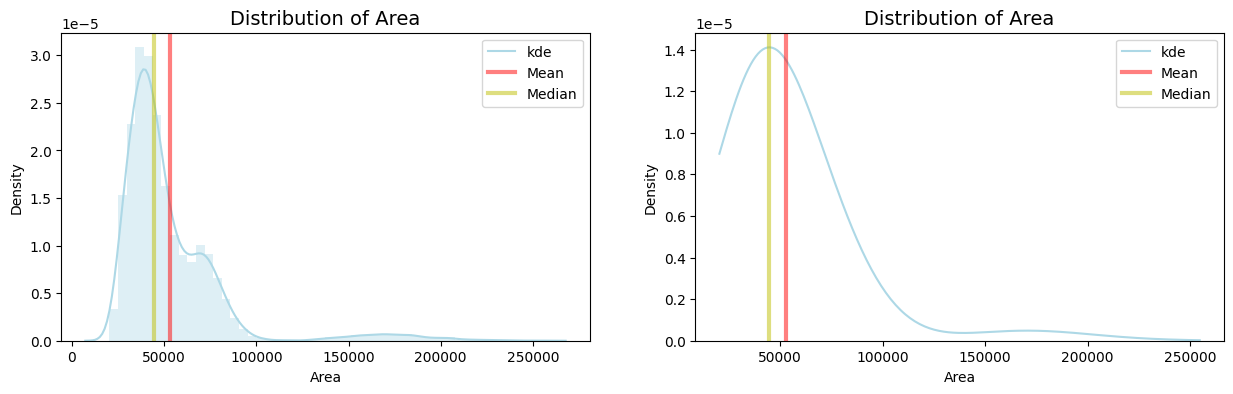

Feature: Perimeter
Skew: 1.63
Mean: 855.28, Median: 794.94
Standard Deviation: 214.29


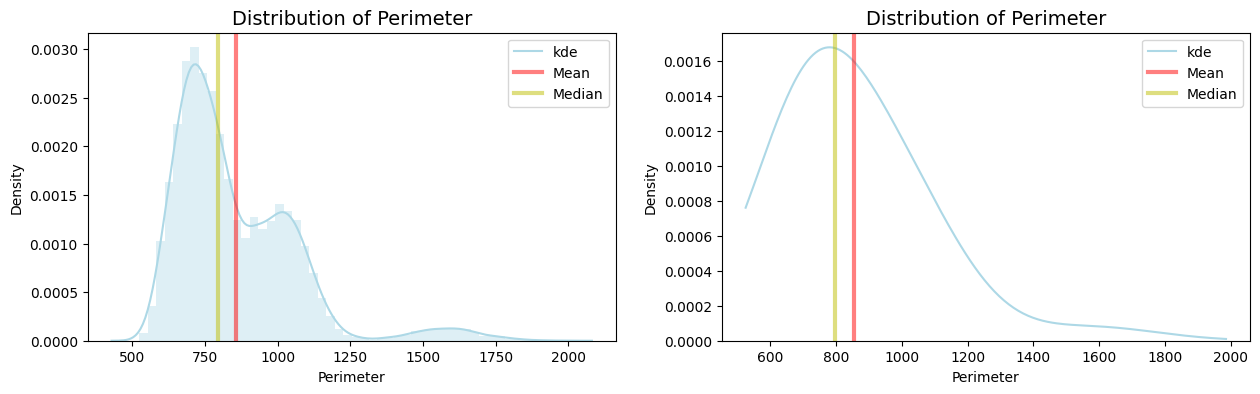

Feature: MajorAxisLength
Skew: 1.36
Mean: 320.14, Median: 296.88
Standard Deviation: 85.69


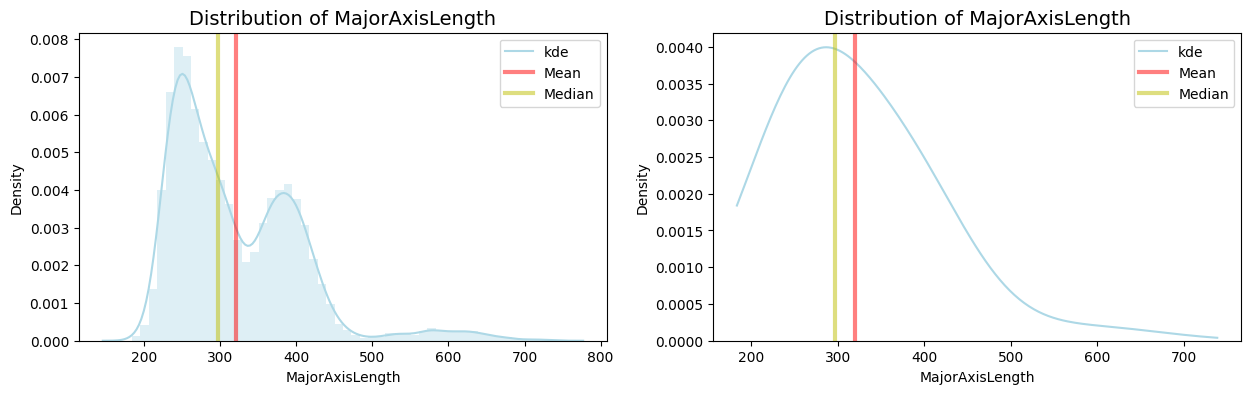

Feature: MinorAxisLength
Skew: 2.24
Mean: 202.27, Median: 192.43
Standard Deviation: 44.97


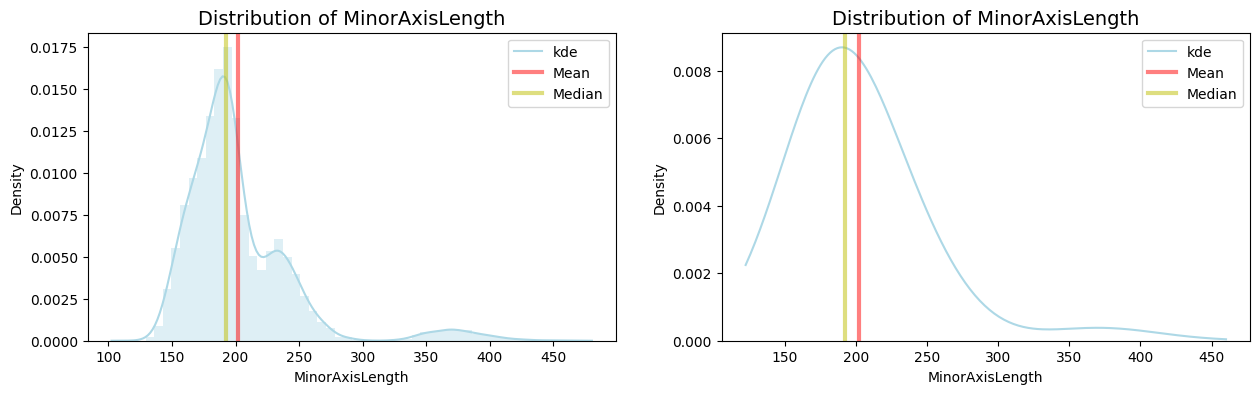

Feature: AspectRation
Skew: 0.58
Mean: 1.58, Median: 1.55
Standard Deviation: 0.25


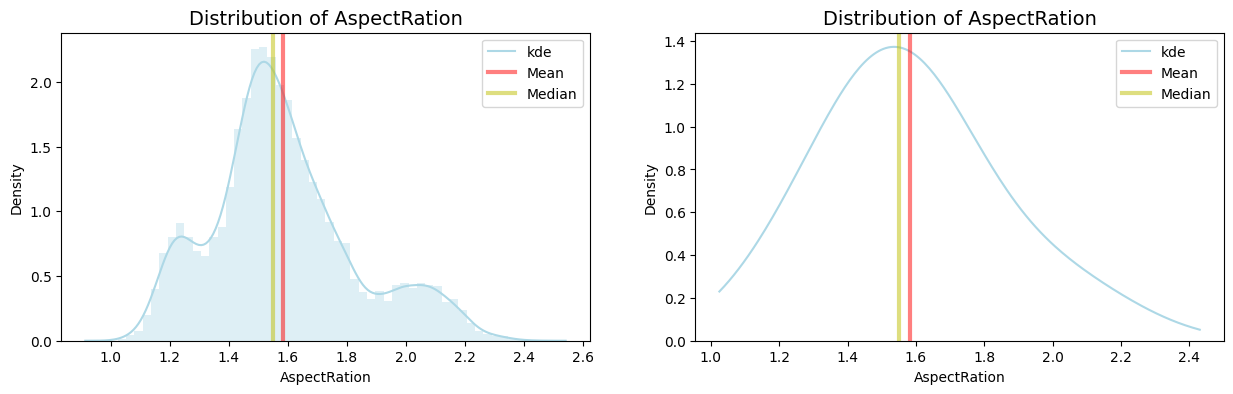

Feature: Eccentricity
Skew: -1.06
Mean: 0.75, Median: 0.76
Standard Deviation: 0.09


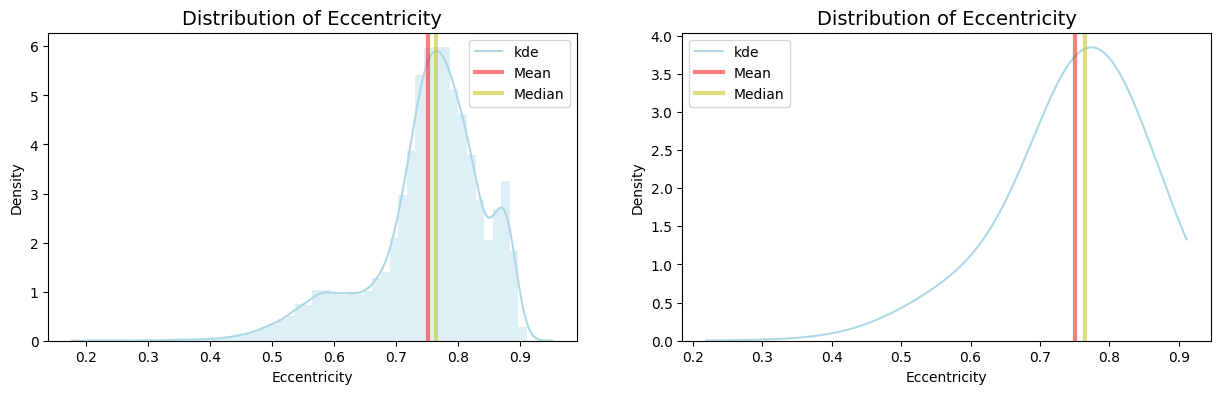

Feature: ConvexArea
Skew: 2.94
Mean: 53768.20, Median: 45178.00
Standard Deviation: 29774.92


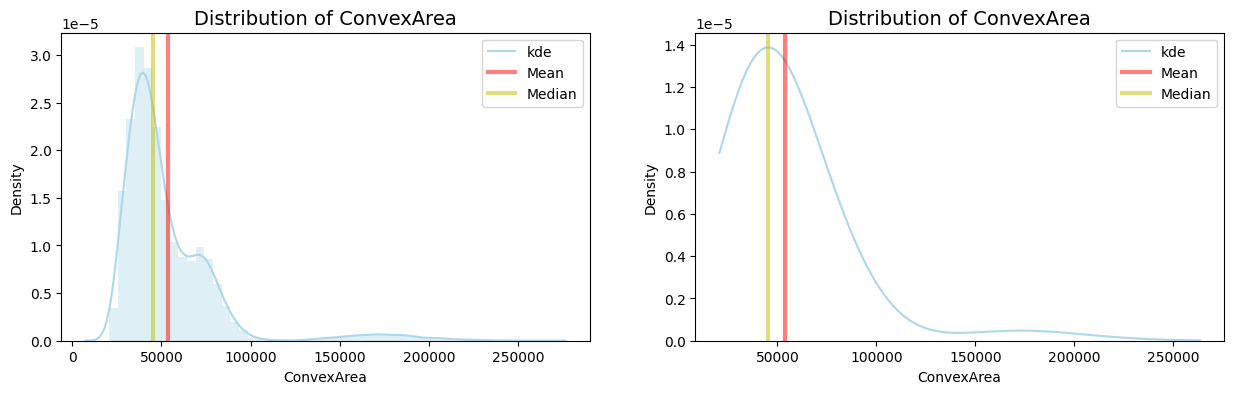

Feature: EquivDiameter
Skew: 1.95
Mean: 253.06, Median: 238.44
Standard Deviation: 59.18


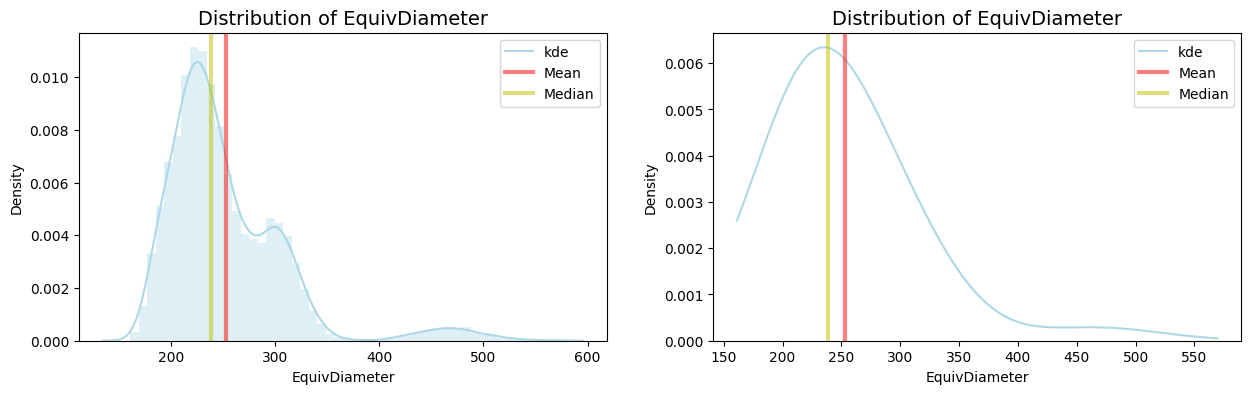

Feature: Extent
Skew: -0.9
Mean: 0.75, Median: 0.76
Standard Deviation: 0.05


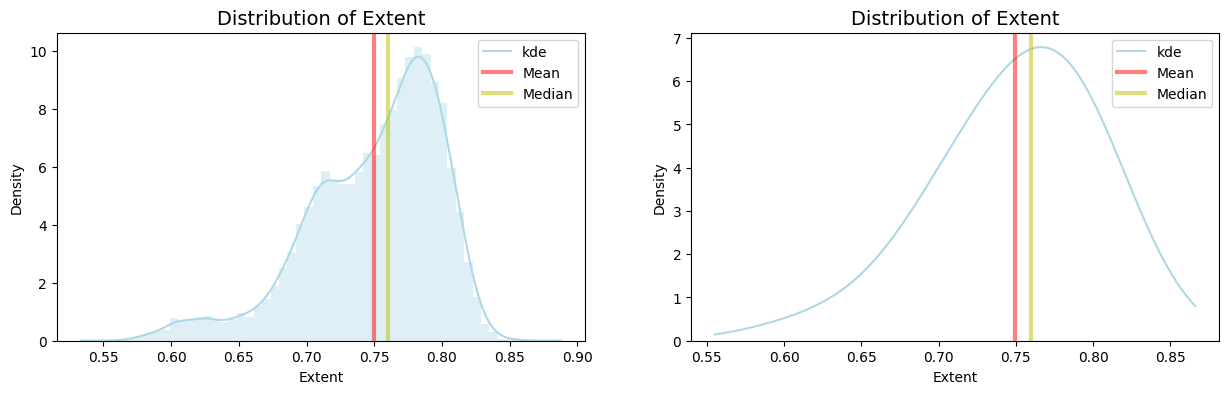

Feature: Solidity
Skew: -2.55
Mean: 0.99, Median: 0.99
Standard Deviation: 0.00


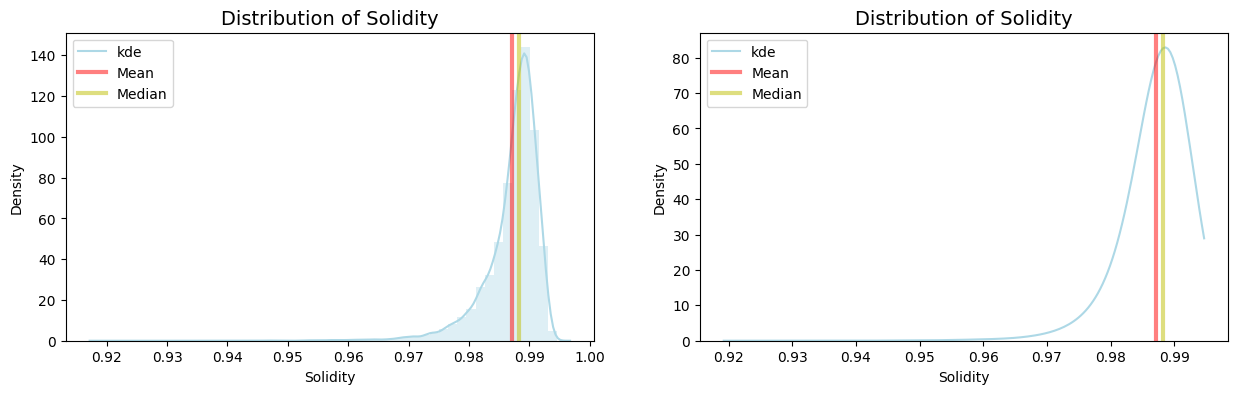

Feature: roundness
Skew: -0.64
Mean: 0.87, Median: 0.88
Standard Deviation: 0.06


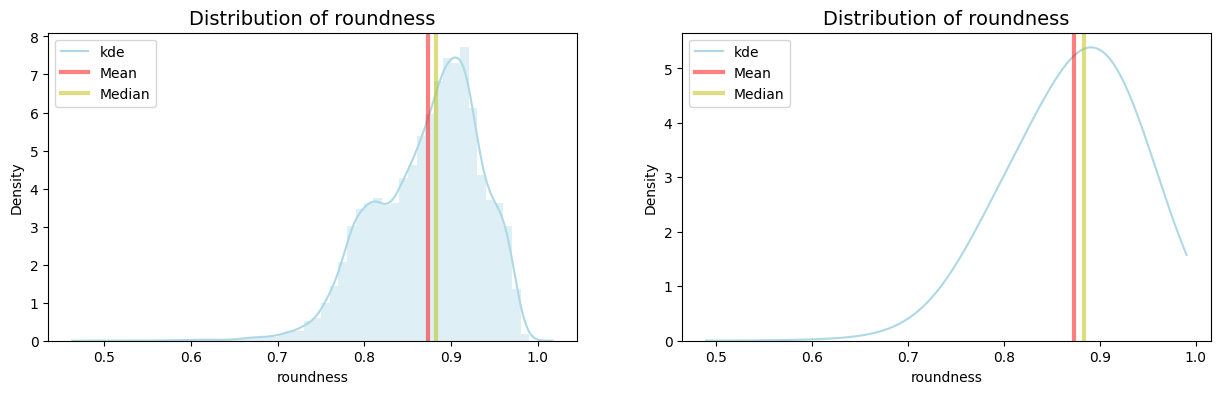

Feature: Compactness
Skew: 0.04
Mean: 0.80, Median: 0.80
Standard Deviation: 0.06


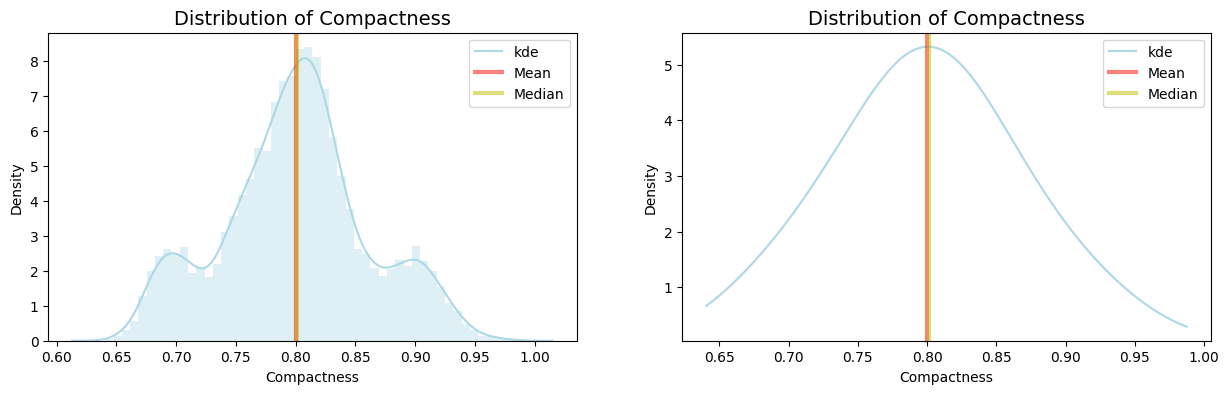

Feature: ShapeFactor1
Skew: -0.53
Mean: 0.01, Median: 0.01
Standard Deviation: 0.00


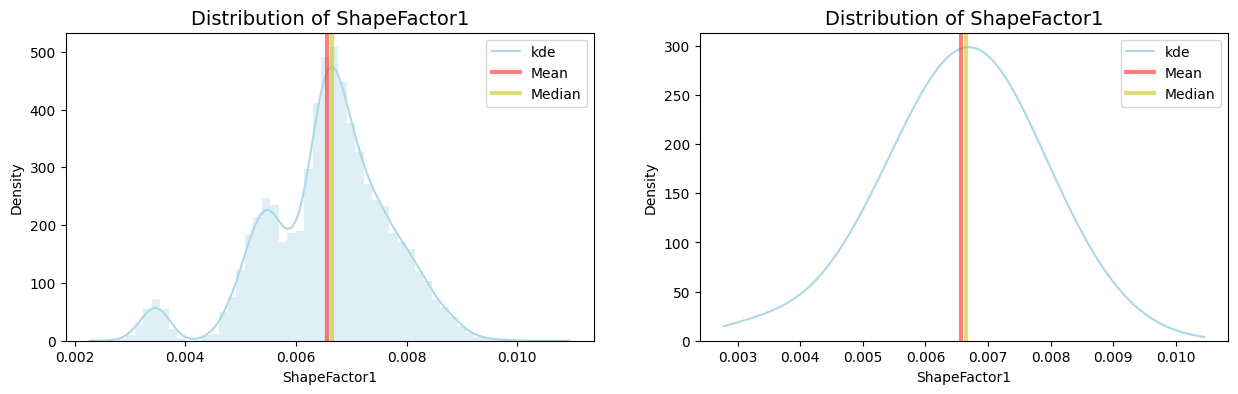

Feature: ShapeFactor2
Skew: 0.3
Mean: 0.00, Median: 0.00
Standard Deviation: 0.00


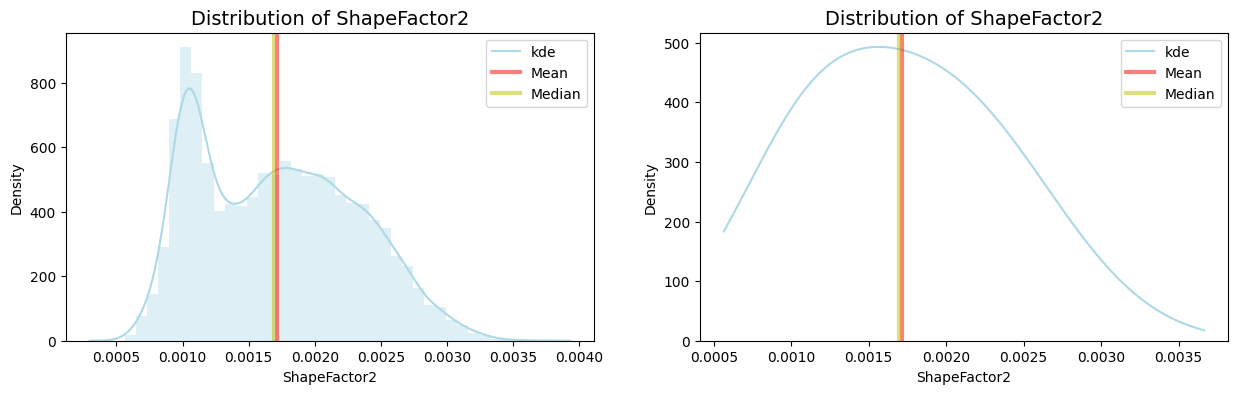

Feature: ShapeFactor3
Skew: 0.24
Mean: 0.64, Median: 0.64
Standard Deviation: 0.10


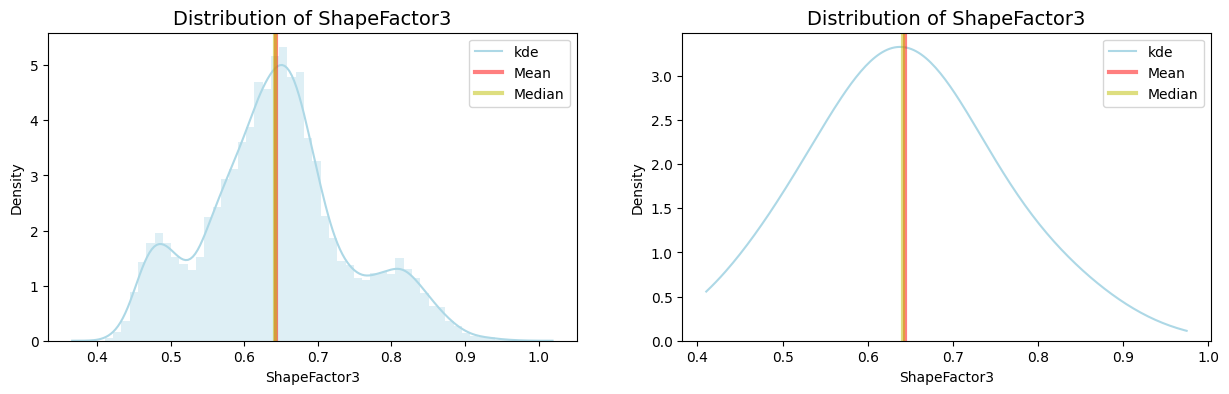

Feature: ShapeFactor4
Skew: -2.76
Mean: 1.00, Median: 1.00
Standard Deviation: 0.00


In [16]:
for col in numerical_cols:
    print('Feature:', col)
    print('Skew:', round(df[col].skew(), 2))
    print('Mean: {:.2f}, Median: {:.2f}'.format(df[col].mean(), df[col].median()))
    print('Standard Deviation: {:.2f}'.format(df[col].std()))
    
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], axlabel = col, color = "lightblue");
    plt.axvline(df[col].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
    plt.axvline(df[col].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
    plt.title("Distribution of " + col, size = 14)
    plt.legend(["kde", "Mean", "Median"])
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(data = df, x = col, bw_adjust = 5, cut = 0, color = "lightblue")
    plt.axvline(df[col].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
    plt.axvline(df[col].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
    plt.title("Distribution of " + col, size = 14)
    plt.legend(["kde", "Mean", "Median"])
    plt.show()

Also, to check from another perspective, it was created a "`hist subplolt`" and a "`boxplot`" with numerical features.

Feature: Area
Skew: 2.95


Feature: Perimeter
Skew: 1.63


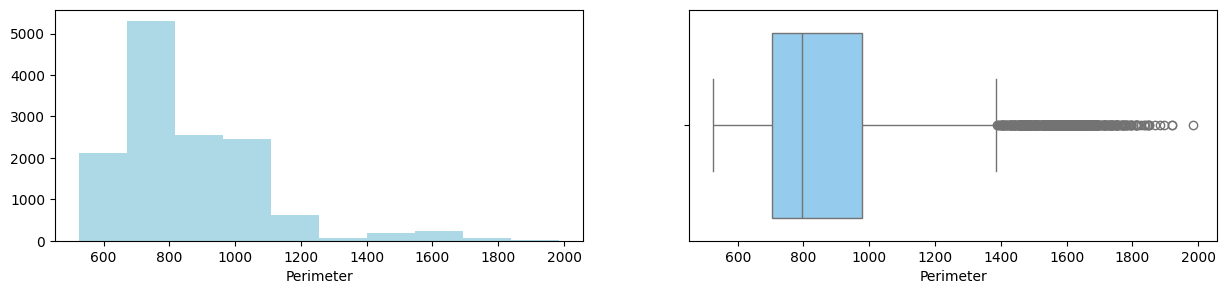

Feature: MajorAxisLength
Skew: 1.36


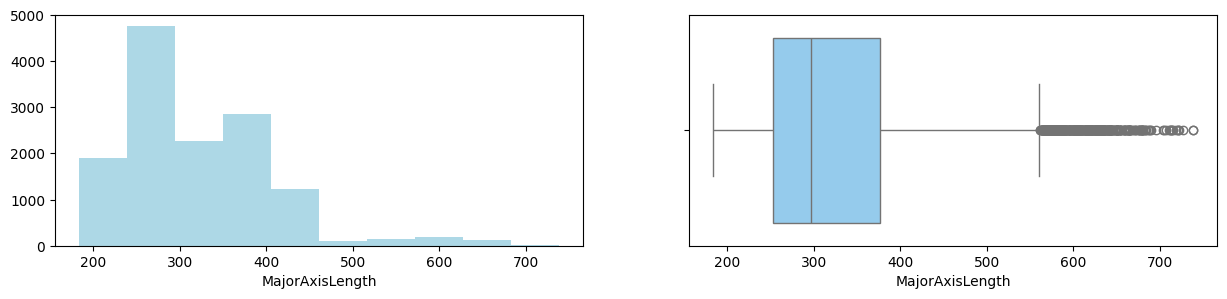

Feature: MinorAxisLength
Skew: 2.24


Feature: AspectRation
Skew: 0.58


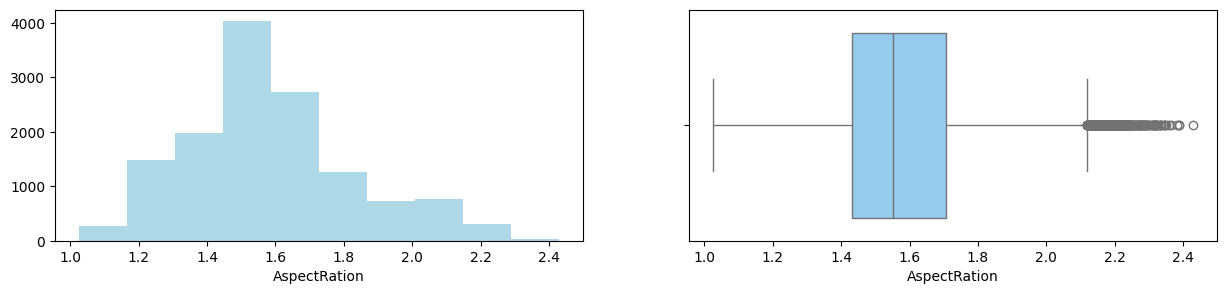

Feature: Eccentricity
Skew: -1.06


Feature: ConvexArea
Skew: 2.94


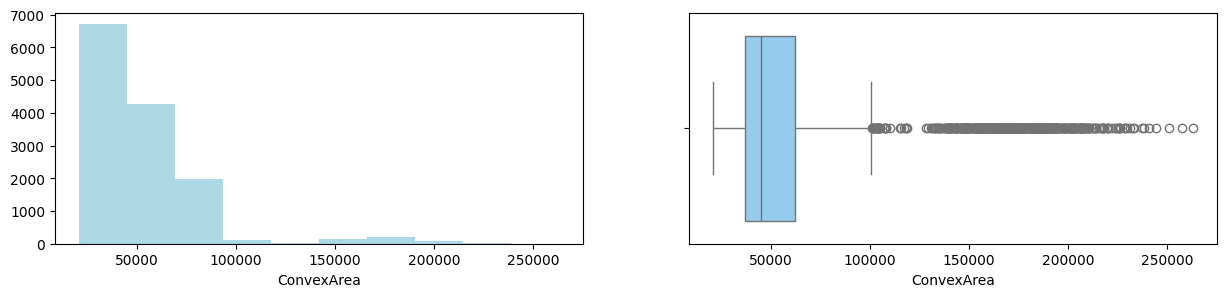

Feature: EquivDiameter
Skew: 1.95


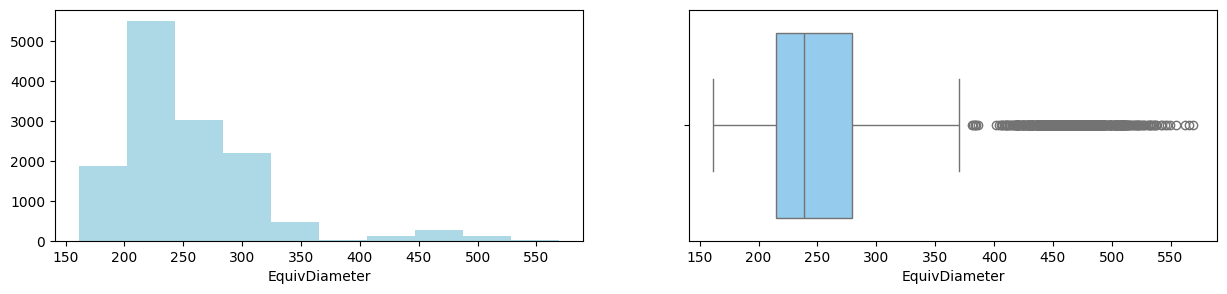

Feature: Extent
Skew: -0.9


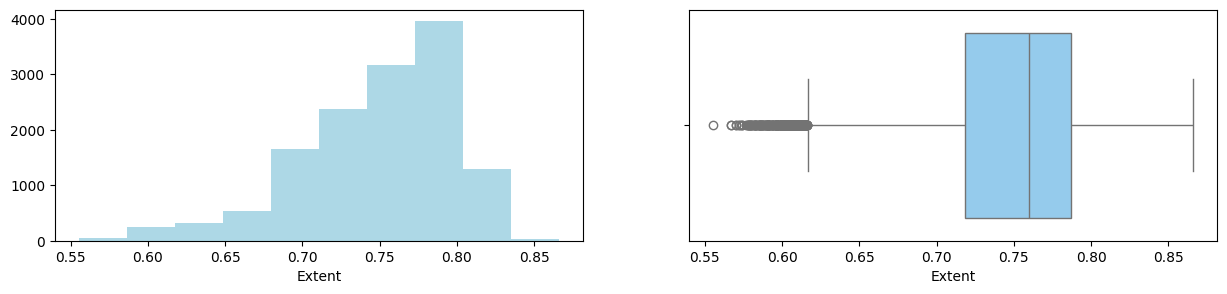

Feature: Solidity
Skew: -2.55


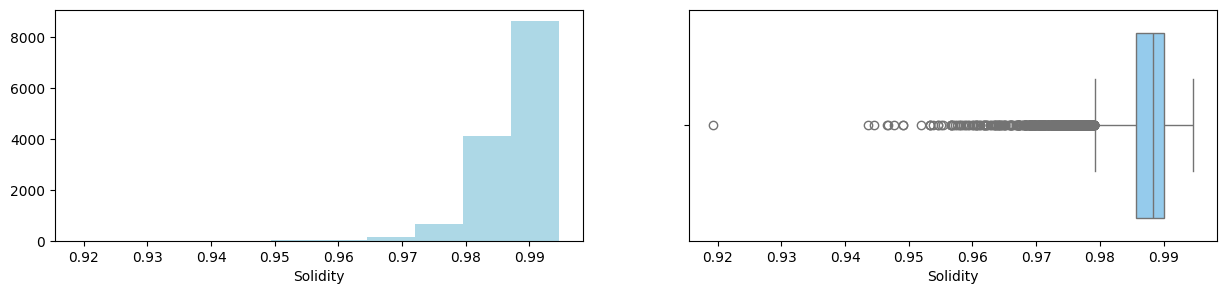

Feature: roundness
Skew: -0.64


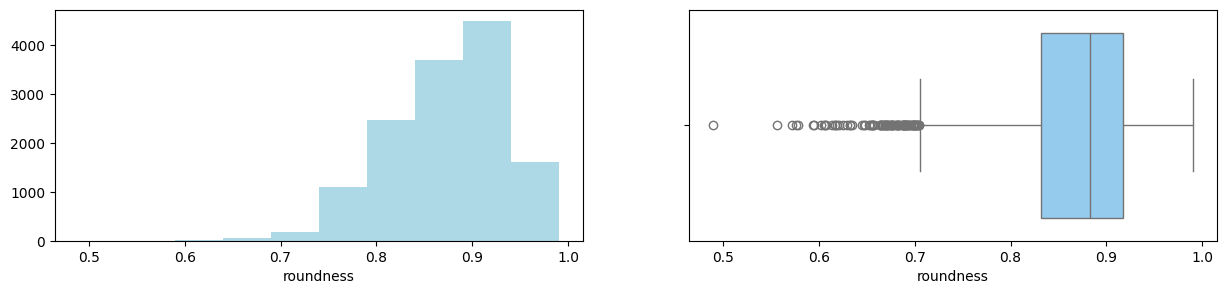

Feature: Compactness
Skew: 0.04


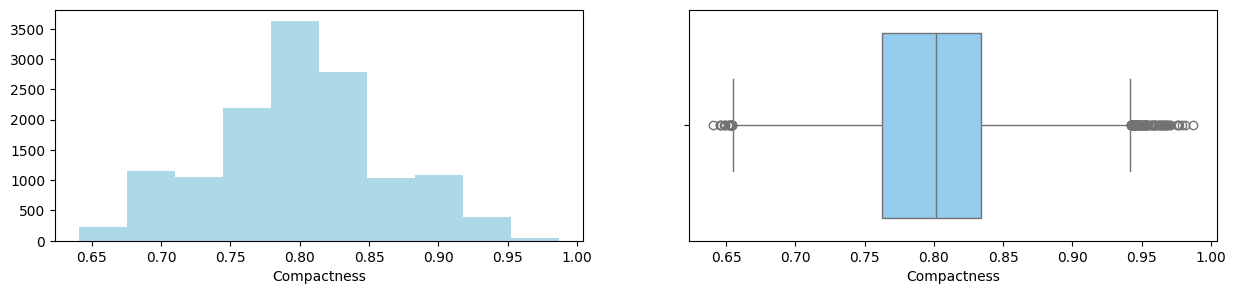

Feature: ShapeFactor1
Skew: -0.53


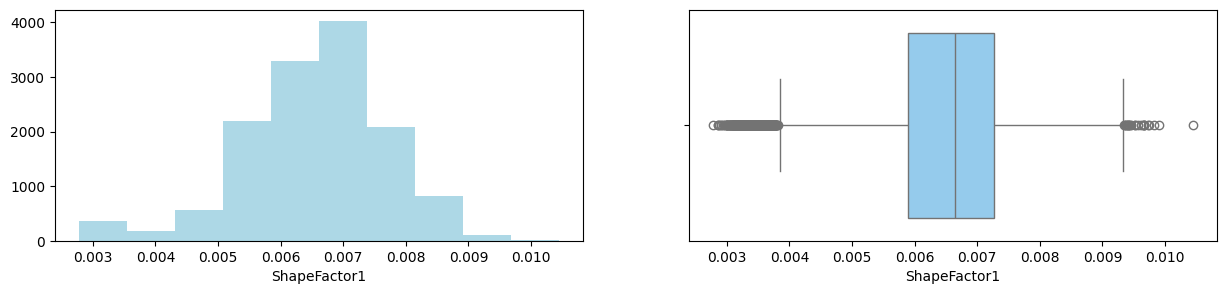

Feature: ShapeFactor2
Skew: 0.3


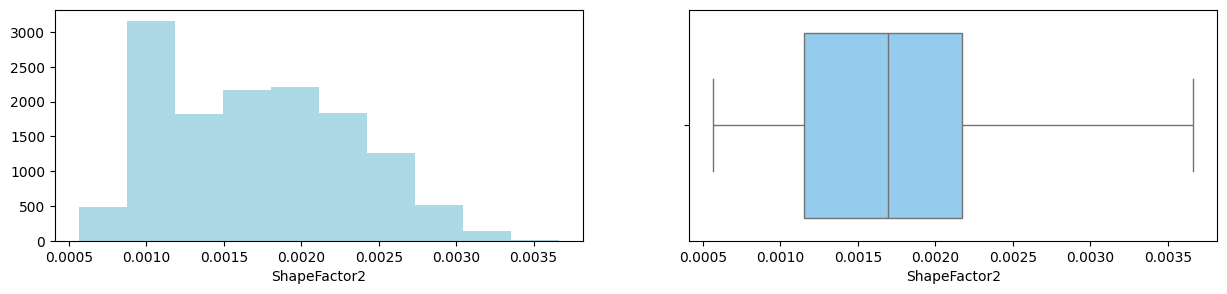

Feature: ShapeFactor3
Skew: 0.24


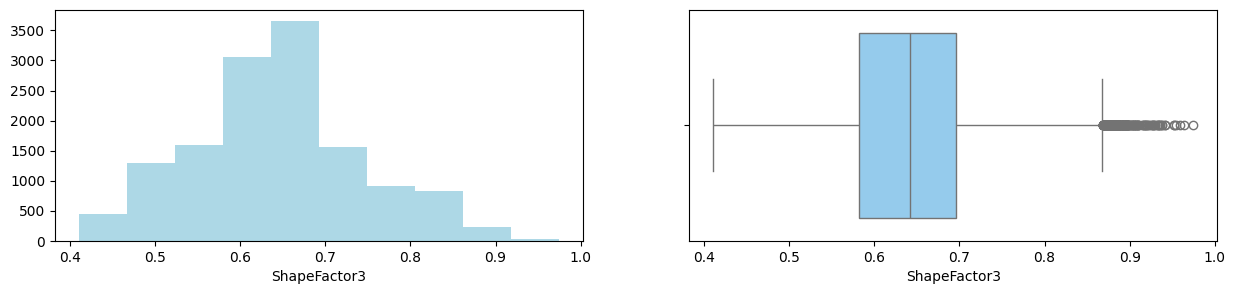

Feature: ShapeFactor4
Skew: -2.76


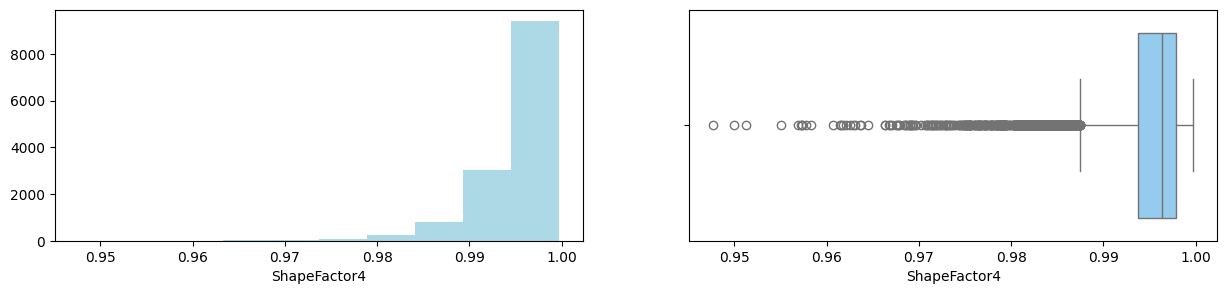

In [17]:
for col in numerical_cols:
    print("Feature: " + col)
    print('Skew:', round(df[col].skew(), 2))
    
    plt.figure(figsize = (15, 3))
    
    plt.subplot(1, 2, 1)
    df[col].hist(grid = False, color = "lightblue")
    plt.xlabel(col)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col], color = "lightskyblue")
    plt.show()

Next created a "`countplot`" to visualise the Class categorical feature.

In [18]:
plt.figure(figsize = (6, 4))
sns.countplot(x = "Class", data = df, palette = "Blues_r", order = df["Class"].value_counts().index);
plt.title('Class Feature')
plt.xticks(rotation = 45)
plt.show()

The distribution of missing values, it utilising the "`missingno`" library as a bar chart.

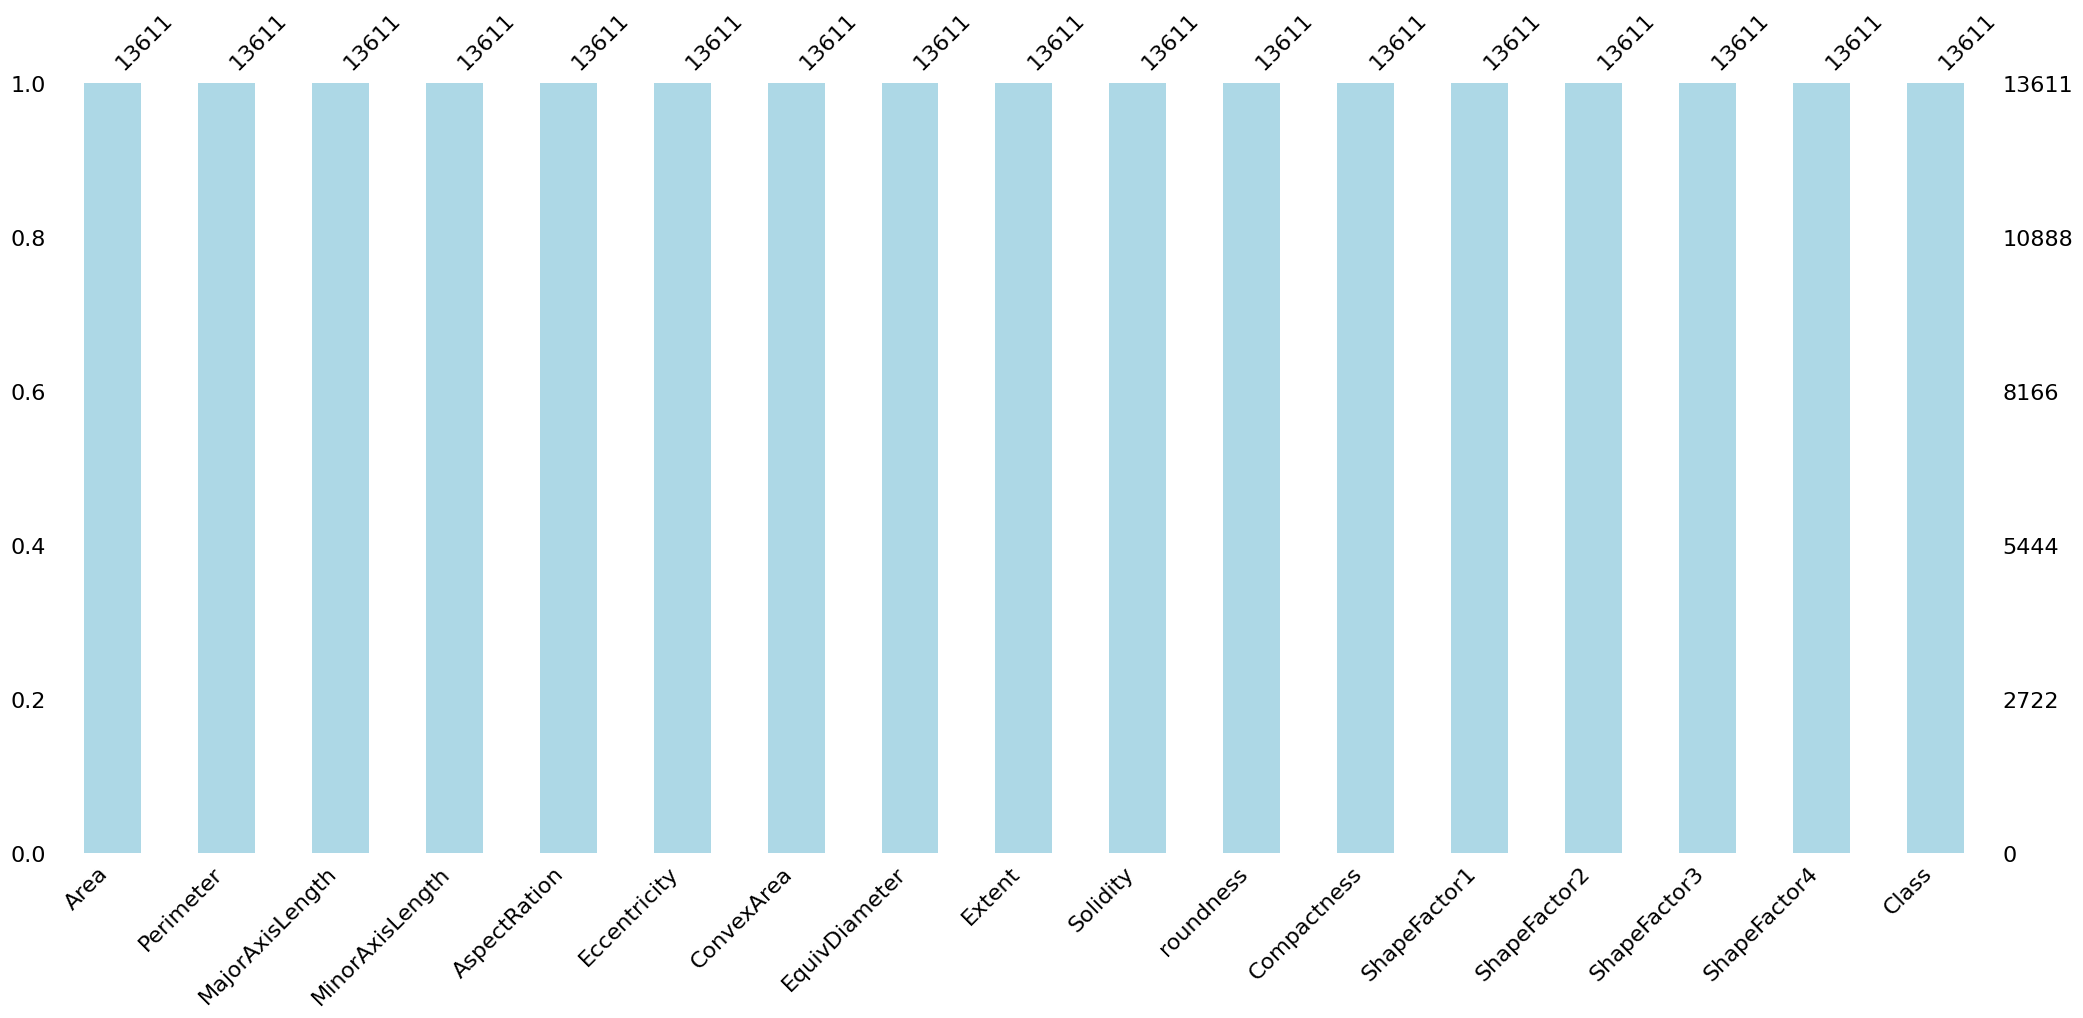

In [19]:
msno.bar(df, color = 'lightblue');

## 3.2 Variable Encoding

Before encoding, it checks the Unique Values of the "Class" feature first, and next the "value_counts()".

In [20]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [21]:
df["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Importing "LabelEncoder" from "sklearn.preprocessing" in "3.2 topic".

In [22]:
from sklearn.preprocessing import LabelEncoder

Opted to use Label Encoder once "Label encoding is suitable for categorical features with only two distinct categories. In this technique, each category is assigned a unique integer label. Categories are assigned integer values starting from 0." (Baruah, 2023).

- Pros: Works well for features with two categories
- Cons: Machine learning algorithms may misinterpret the integer labels as having mathematical significance 
(Baruah, 2023).

Defined Label Encoder in the "encoder" variable and transformed the feature "Class".

In [23]:
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

Next, checking the Unique Values of the "Class" and the "value_counts()" again. 

In [24]:
df["Class"].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [25]:
df["Class"].value_counts()

Class
3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: count, dtype: int64

Next, printing the "classes_" method of the encoder to compare the correct order of the encoded categorical values.

In [26]:
print(encoder.classes_)

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


As a result after comparisons, after encoded: 
- BARBUNYA = 0, BOMBAY = 1, CALI = 2, DERMASON = 3, HOROZ = 4,  SEKER = 5, SIRA = 6

In [27]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      5  
1     0.953861      0.006979      0.003564      0.909851      0.998430      5  
2     0.908774      0.007244      0.003048      0.825871      0.999066      5  
3     0.928329      0.007017      0.003215      0.861794      0.994199      5  
4     0.970516      0.006697      0.003665      0.941900      0.999166      5

## 3.3 Handling Outliers

Creating a copy of "df" data frame in a new variable called "df_outliers" to test and check outliers inside the features.

In [28]:
df_outliers = df.copy()

Creating a "box plot" to visualise all features with their respective outliers.

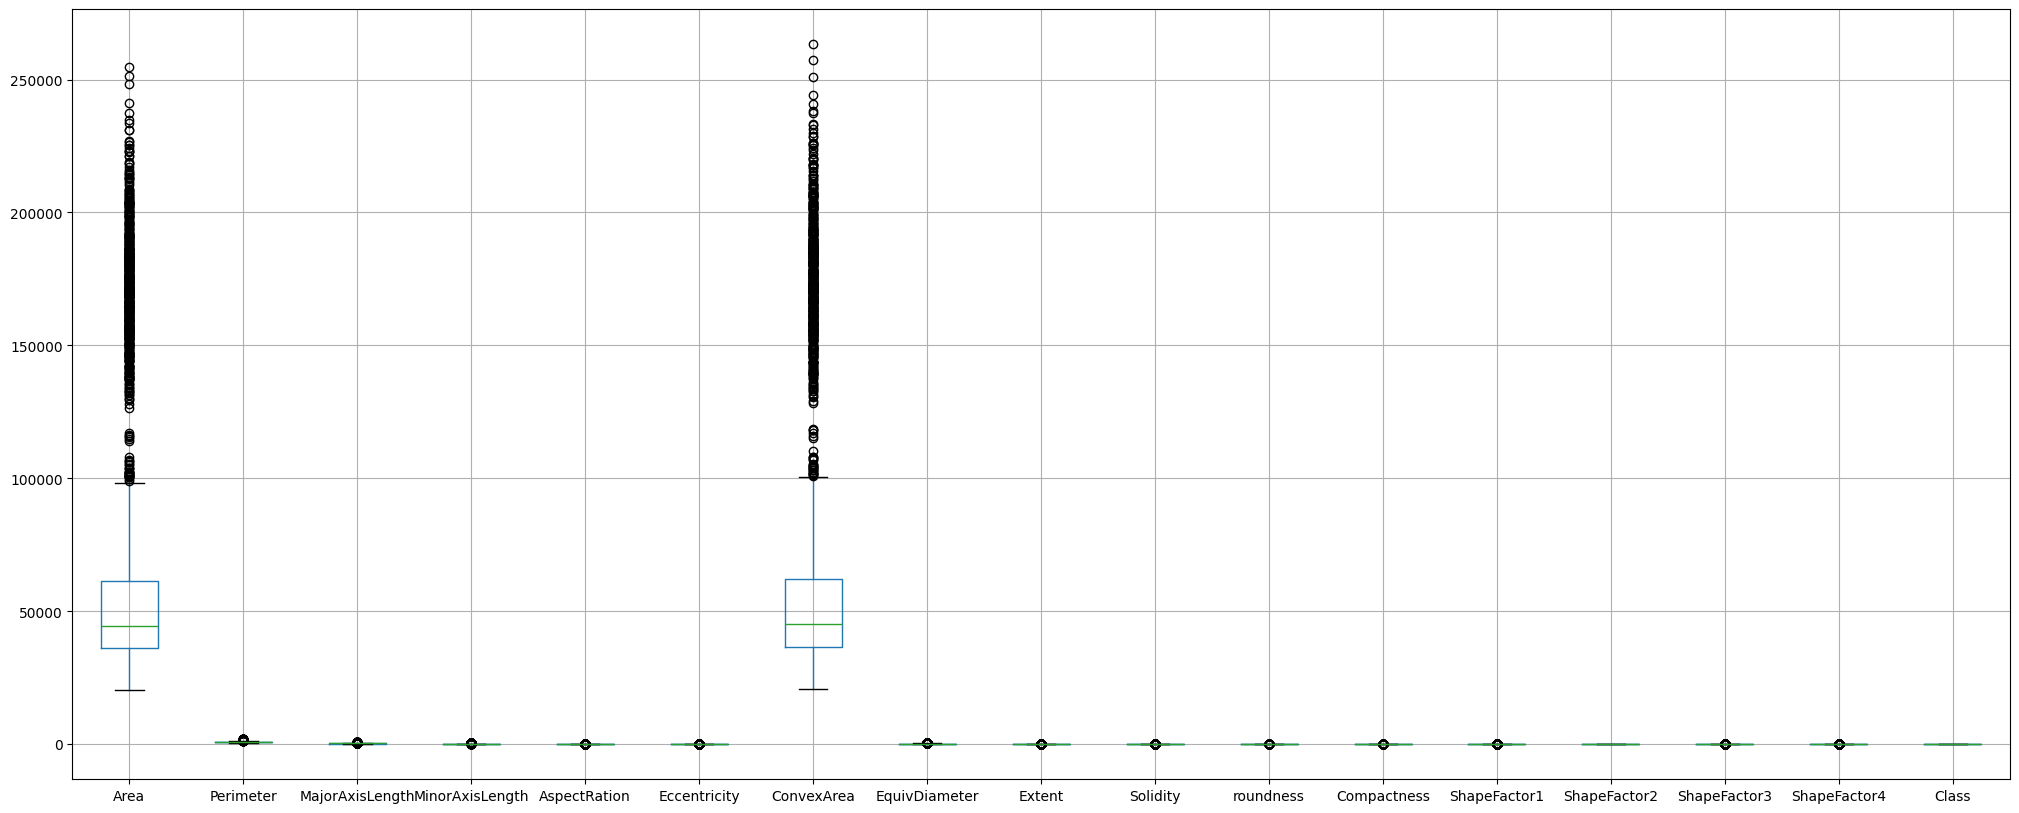

In [29]:
df_outliers.boxplot(figsize = (25, 10));

Checking the visualisations of the distribution of the outliers for each numerical feature using a "distplot", "violinplot" and "stripplot" also how skewed these features are.

Area
Skew: 2.95


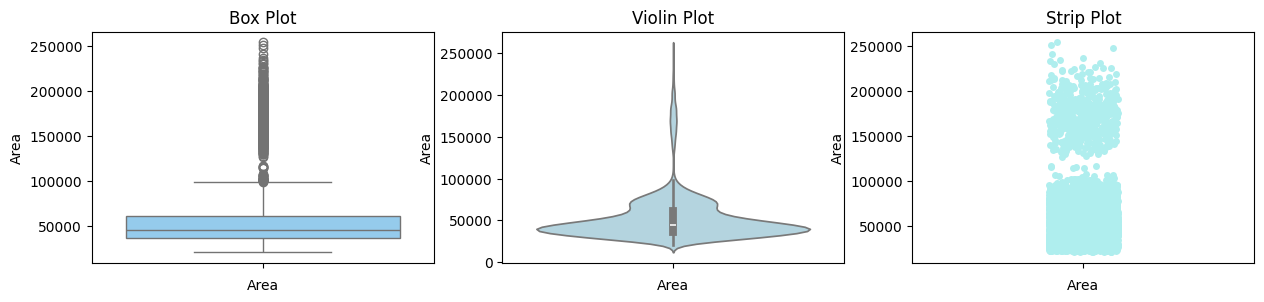

Perimeter
Skew: 1.63


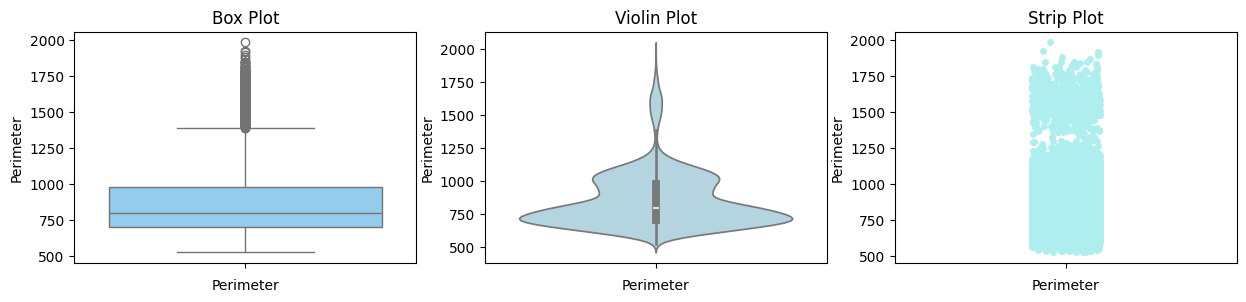

MajorAxisLength
Skew: 1.36


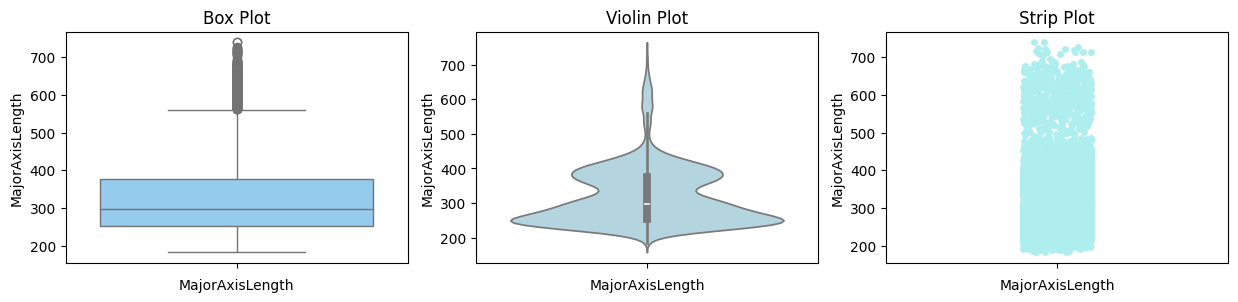

MinorAxisLength
Skew: 2.24


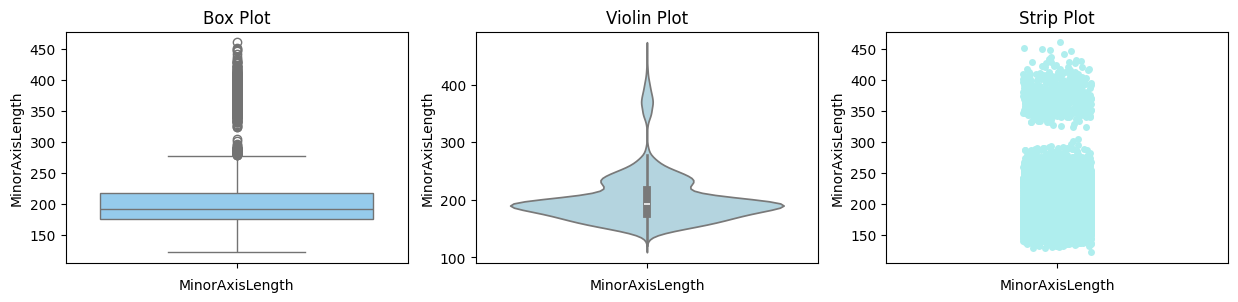

AspectRation
Skew: 0.58


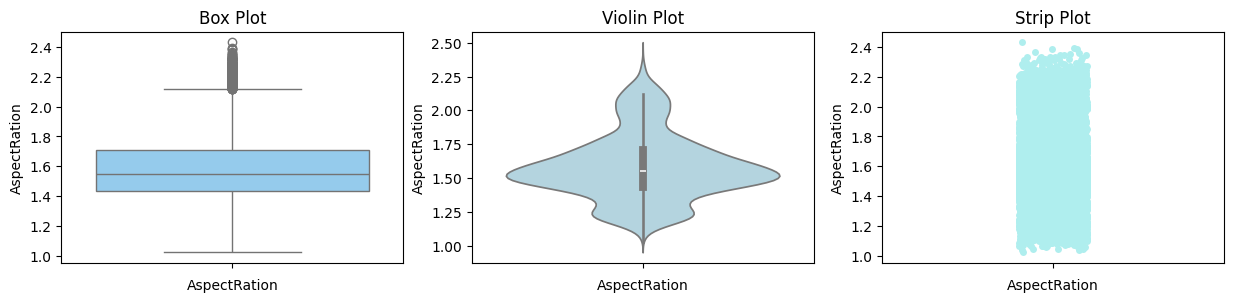

Eccentricity
Skew: -1.06


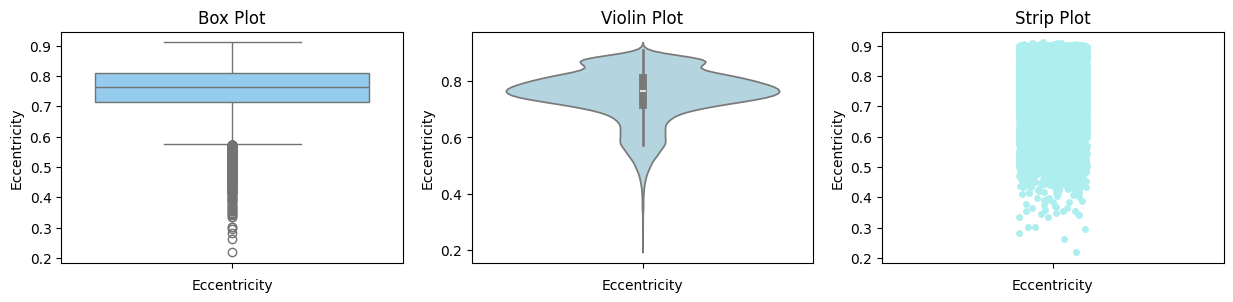

ConvexArea
Skew: 2.94


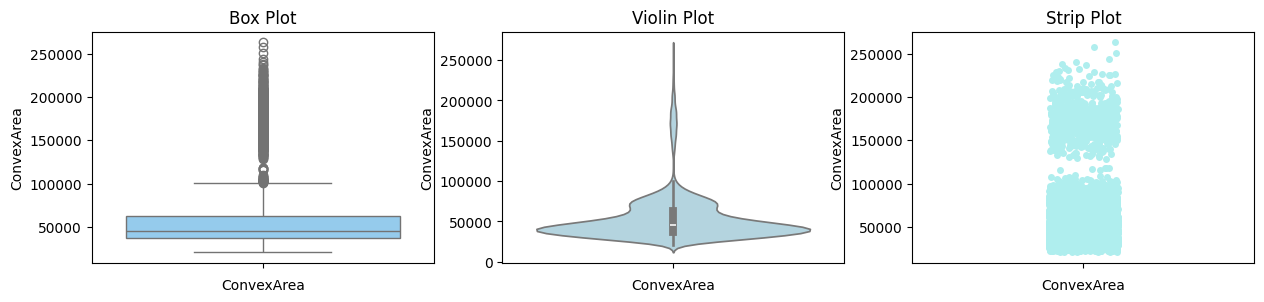

EquivDiameter
Skew: 1.95


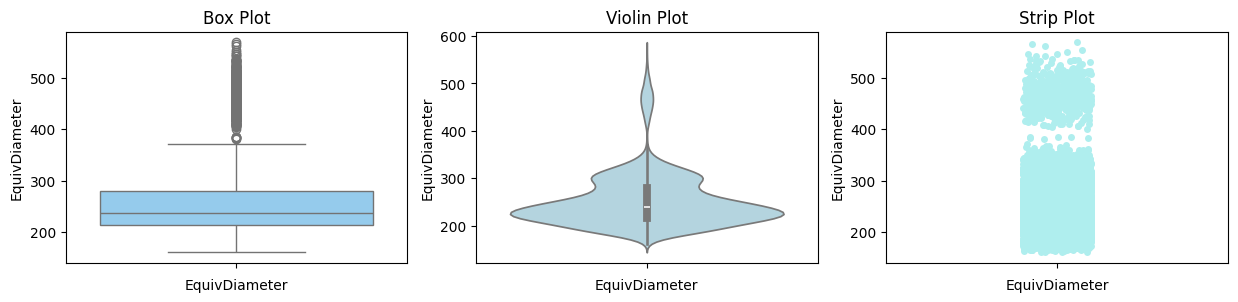

Extent
Skew: -0.9


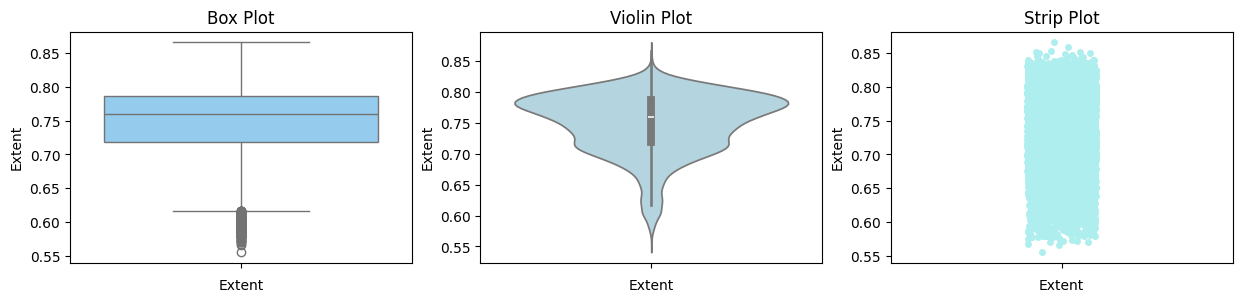

Solidity
Skew: -2.55


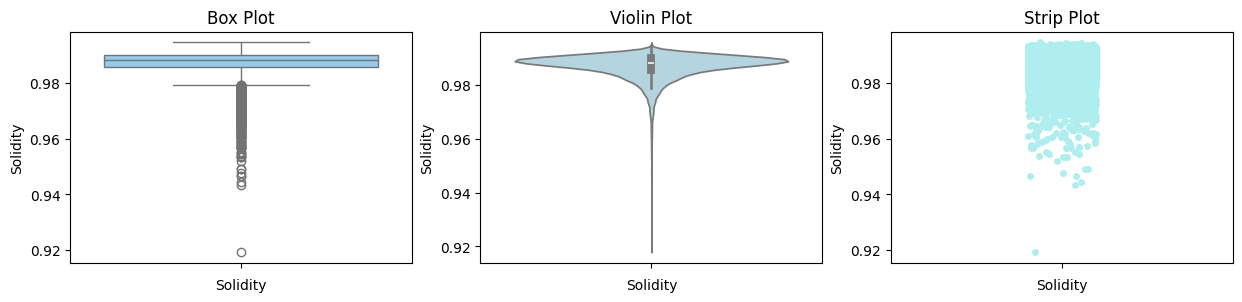

roundness
Skew: -0.64


Compactness
Skew: 0.04


ShapeFactor1
Skew: -0.53


ShapeFactor2
Skew: 0.3


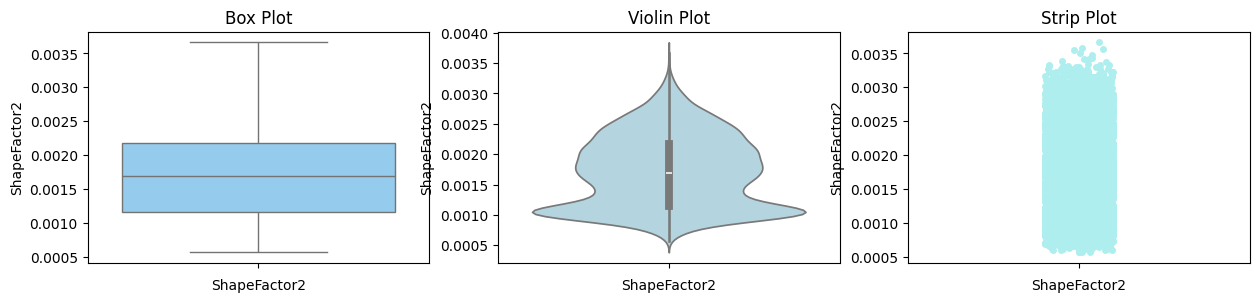

ShapeFactor3
Skew: 0.24


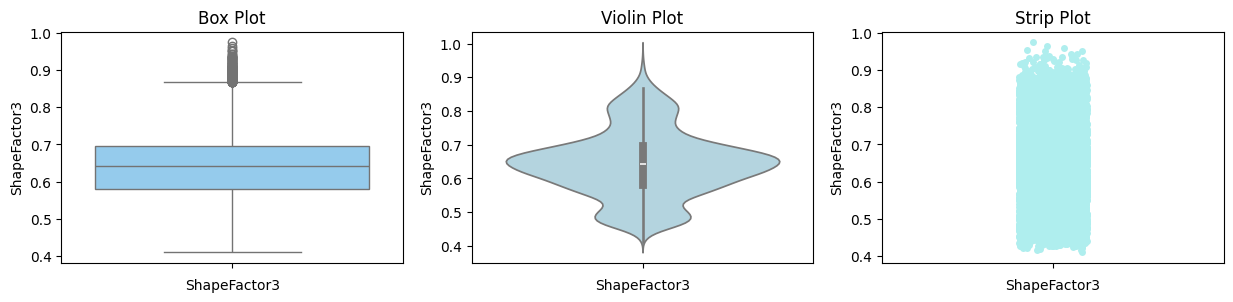

ShapeFactor4
Skew: -2.76


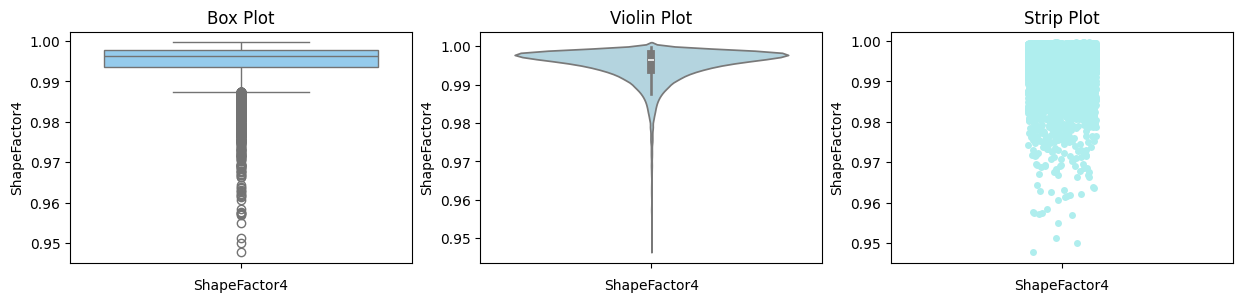

In [30]:
for col in numerical_cols:
    print(col)
    print('Skew:', round(df[col].skew(), 2))
    
    plt.figure(figsize = (15, 3))
    plt.subplot(1, 3, 1)
    plt.title("Box Plot")
    sns.boxplot(data = df[col], color = "lightskyblue")
    plt.ylabel(col)
    plt.xlabel(col)
    
    plt.subplot(1, 3, 2)
    plt.title("Violin Plot")
    sns.violinplot(y = df[col], color = "lightblue")
    plt.xlabel(col)

    plt.subplot(1, 3, 3)
    plt.title("Strip Plot")
    sns.stripplot(y = df[col], color = "paleturquoise")
    plt.xlabel(col)

    plt.show()

Dealing with outliers using IQR method, getting the shape of before and after and their respective distribution in a boxplot.

In [31]:
Q1 = df_outliers[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']].quantile(0.25)
Q3 = df_outliers[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']].quantile(0.75)
IQR = Q3 - Q1

In [32]:
df_outliers = df_outliers[~((df_outliers[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] < (Q1 - 1.5 * IQR)) | 
                            (df_outliers[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] > (Q3 + 1.5 * IQR))).any(axis=1)]

3,017 observations of difference.

In [33]:
df.shape, df_outliers.shape

((13611, 17), (10594, 17))

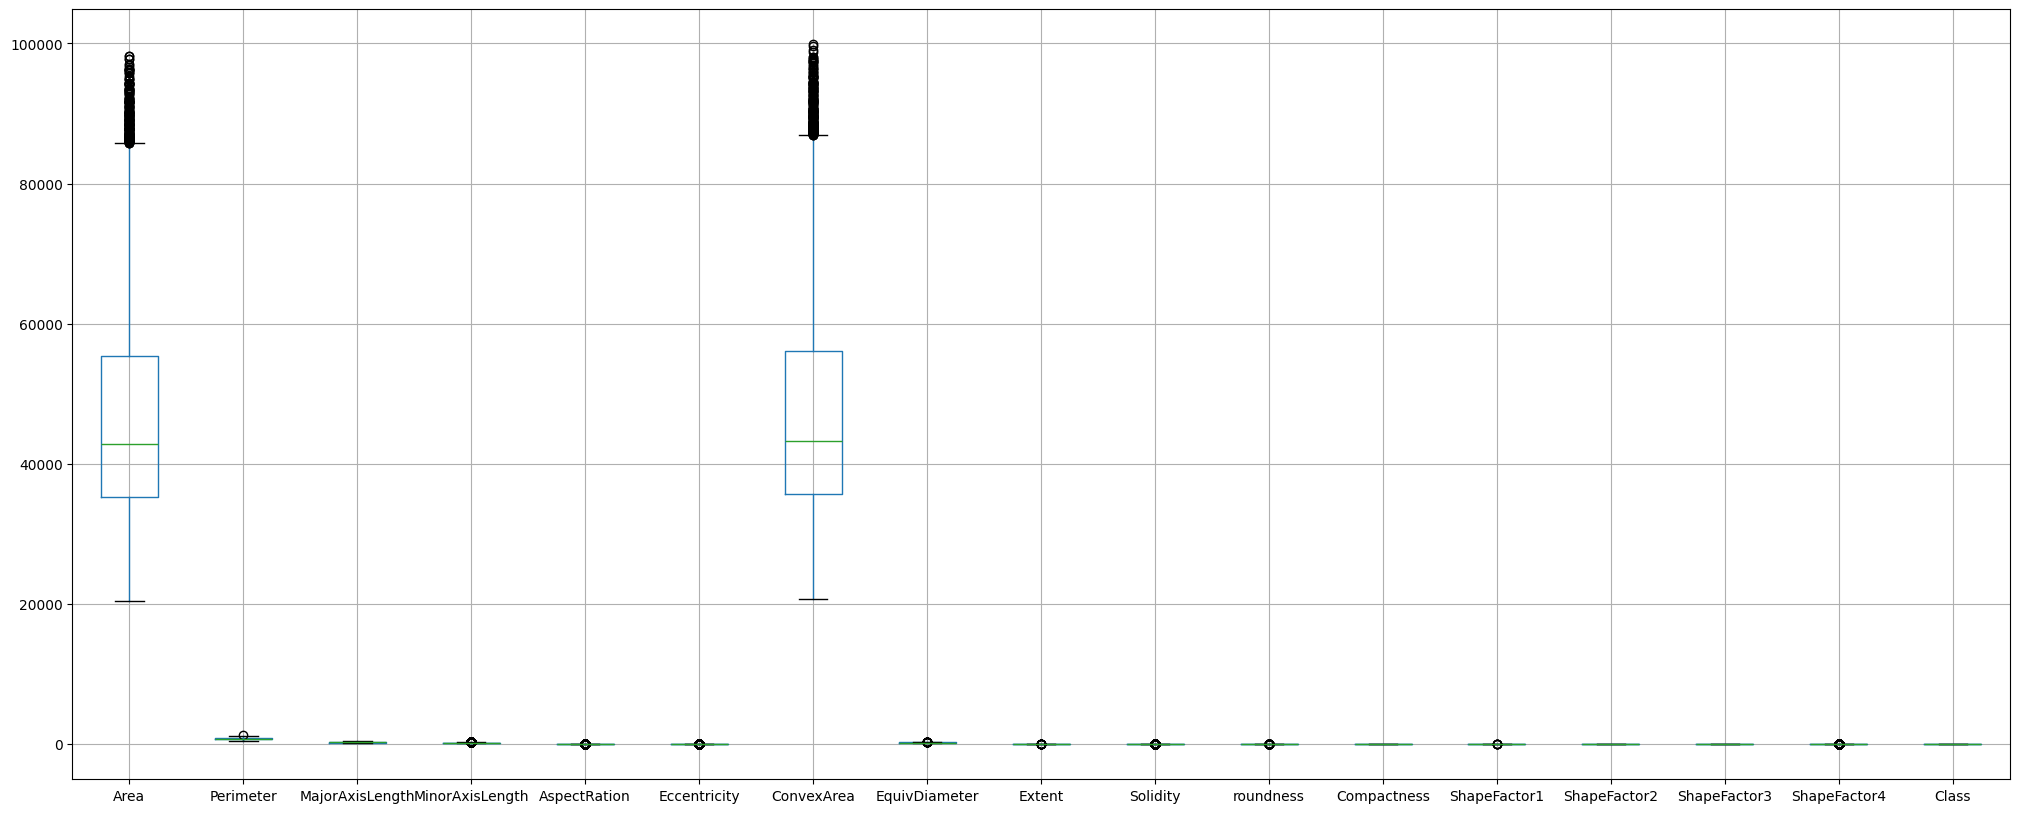

In [34]:
df_outliers.boxplot(figsize = (25, 10));

## 3.4 Feature Scaling

Importing "preprocessing" from "sklearn" in "3.4 topic".

In [35]:
from sklearn import preprocessing

Creating an example of feature scaling testing Min Max Scaler, Standard Scaler, Normalisation and Robust Scaler, and their respective results in box plots.

In [36]:
df_MinMaxScaler = df.copy()
df_StandardScaler = df.copy() 
df_Normalisation = df.copy() 
df_RobustScaler = df.copy() 

**MinMaxScaler**

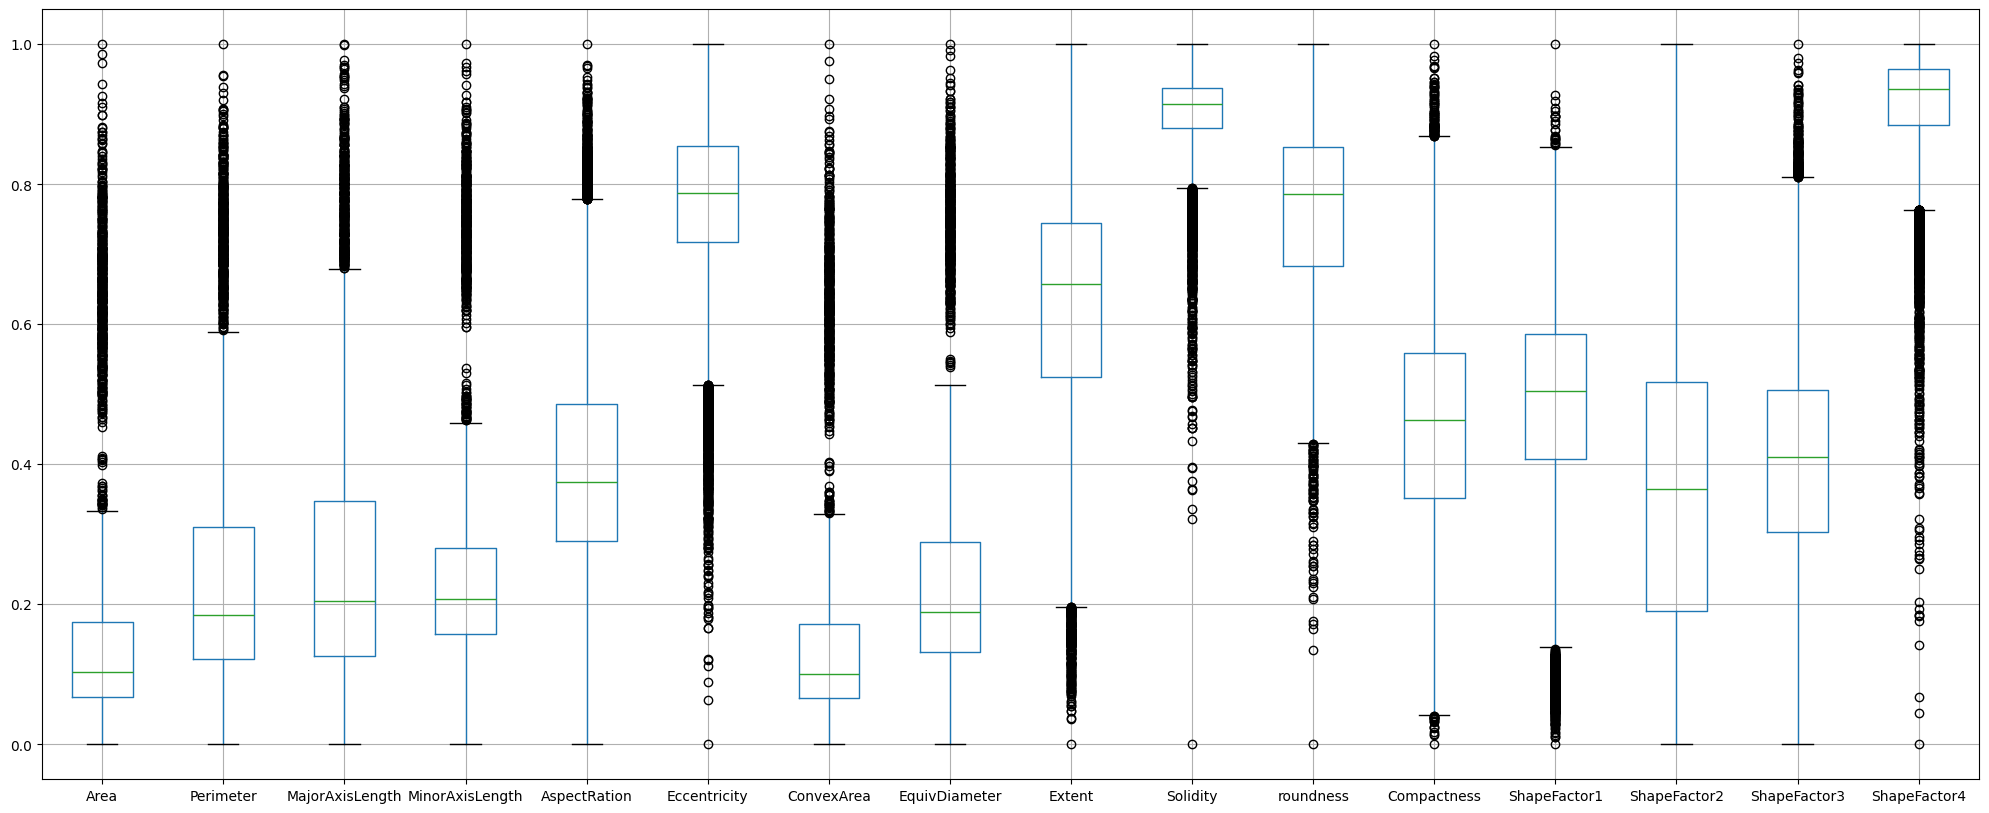

In [37]:
df_MinMaxScaler[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = preprocessing.minmax_scale(df_MinMaxScaler[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

df_MinMaxScaler.boxplot(column = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'], figsize = (25, 10));

**StandardScaler**

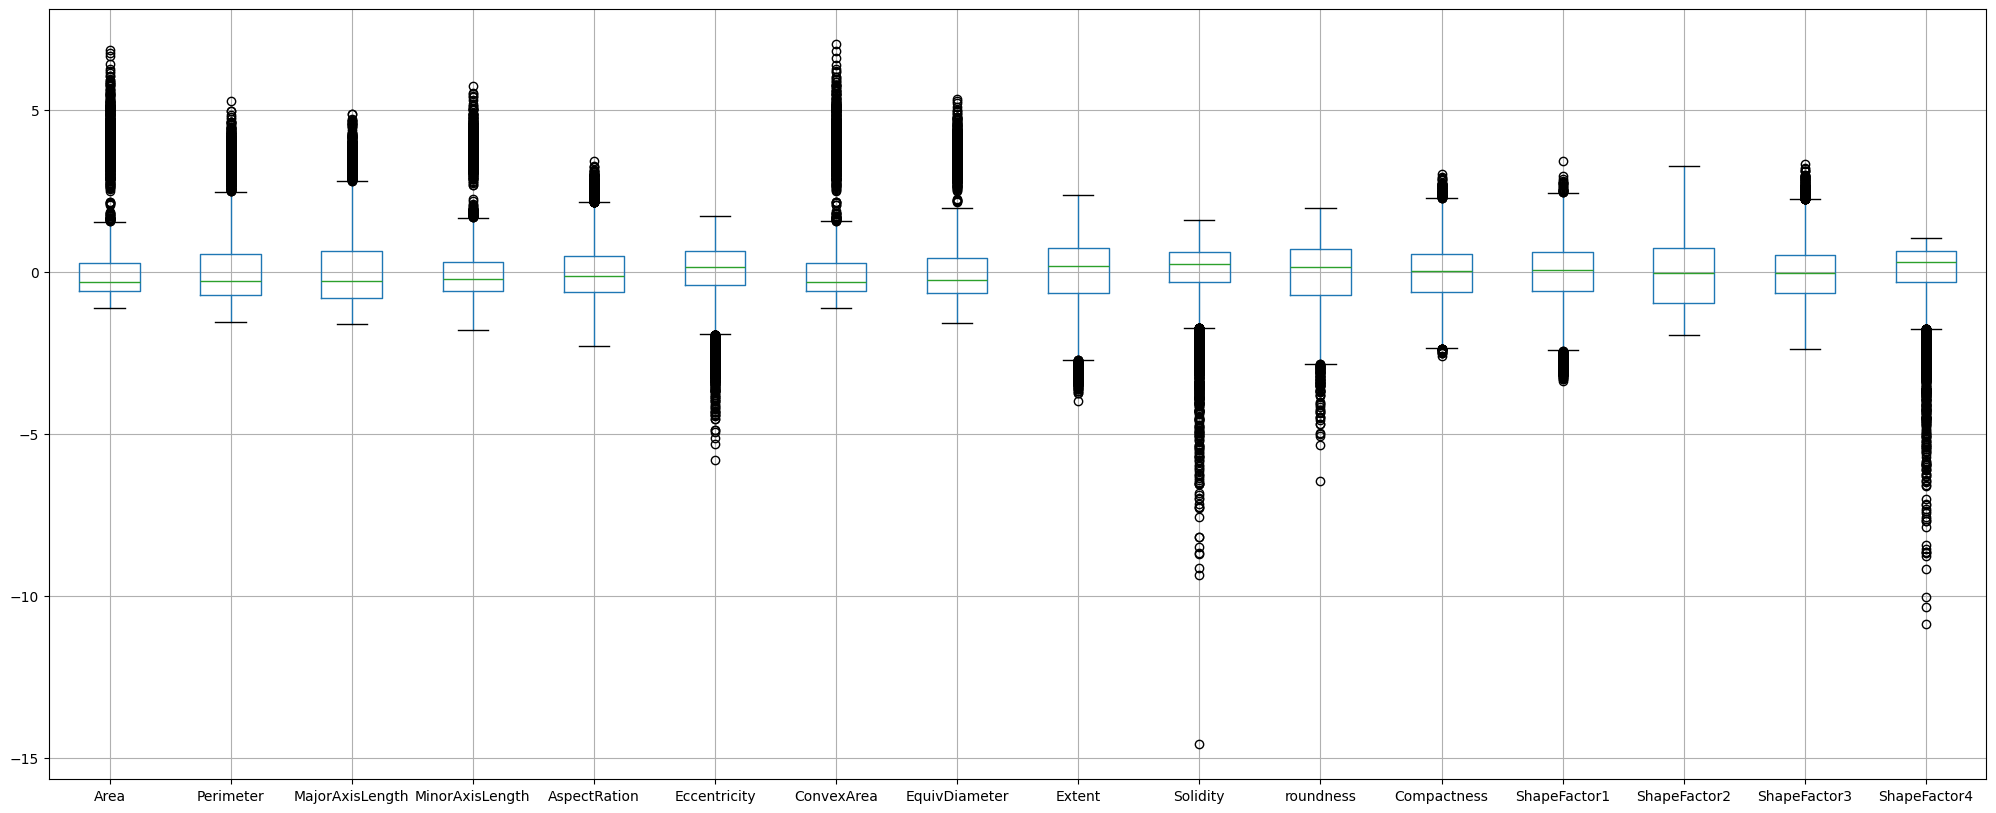

In [38]:
df_StandardScaler[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = preprocessing.StandardScaler().fit_transform(df_StandardScaler[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

df_StandardScaler.boxplot(column = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],figsize = (25, 10));

**Normalisation**

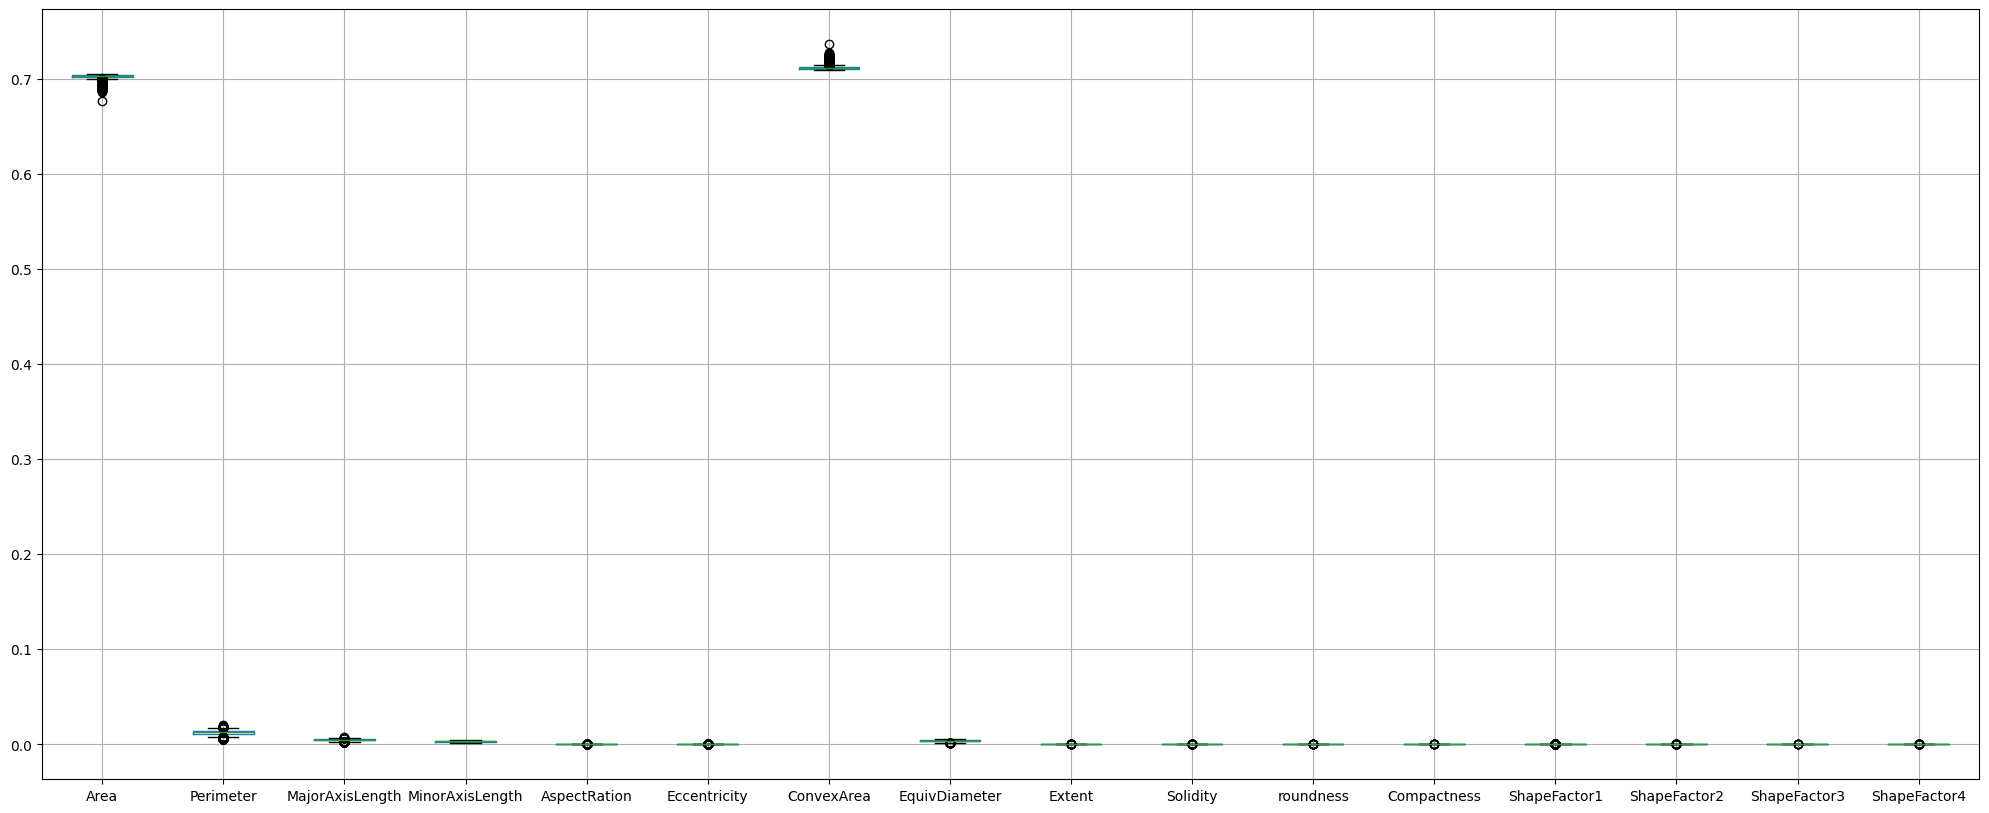

In [39]:
df_Normalisation[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = preprocessing.normalize(df_Normalisation[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

df_Normalisation.boxplot(column = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],figsize = (25, 10));

**RobustScaler**

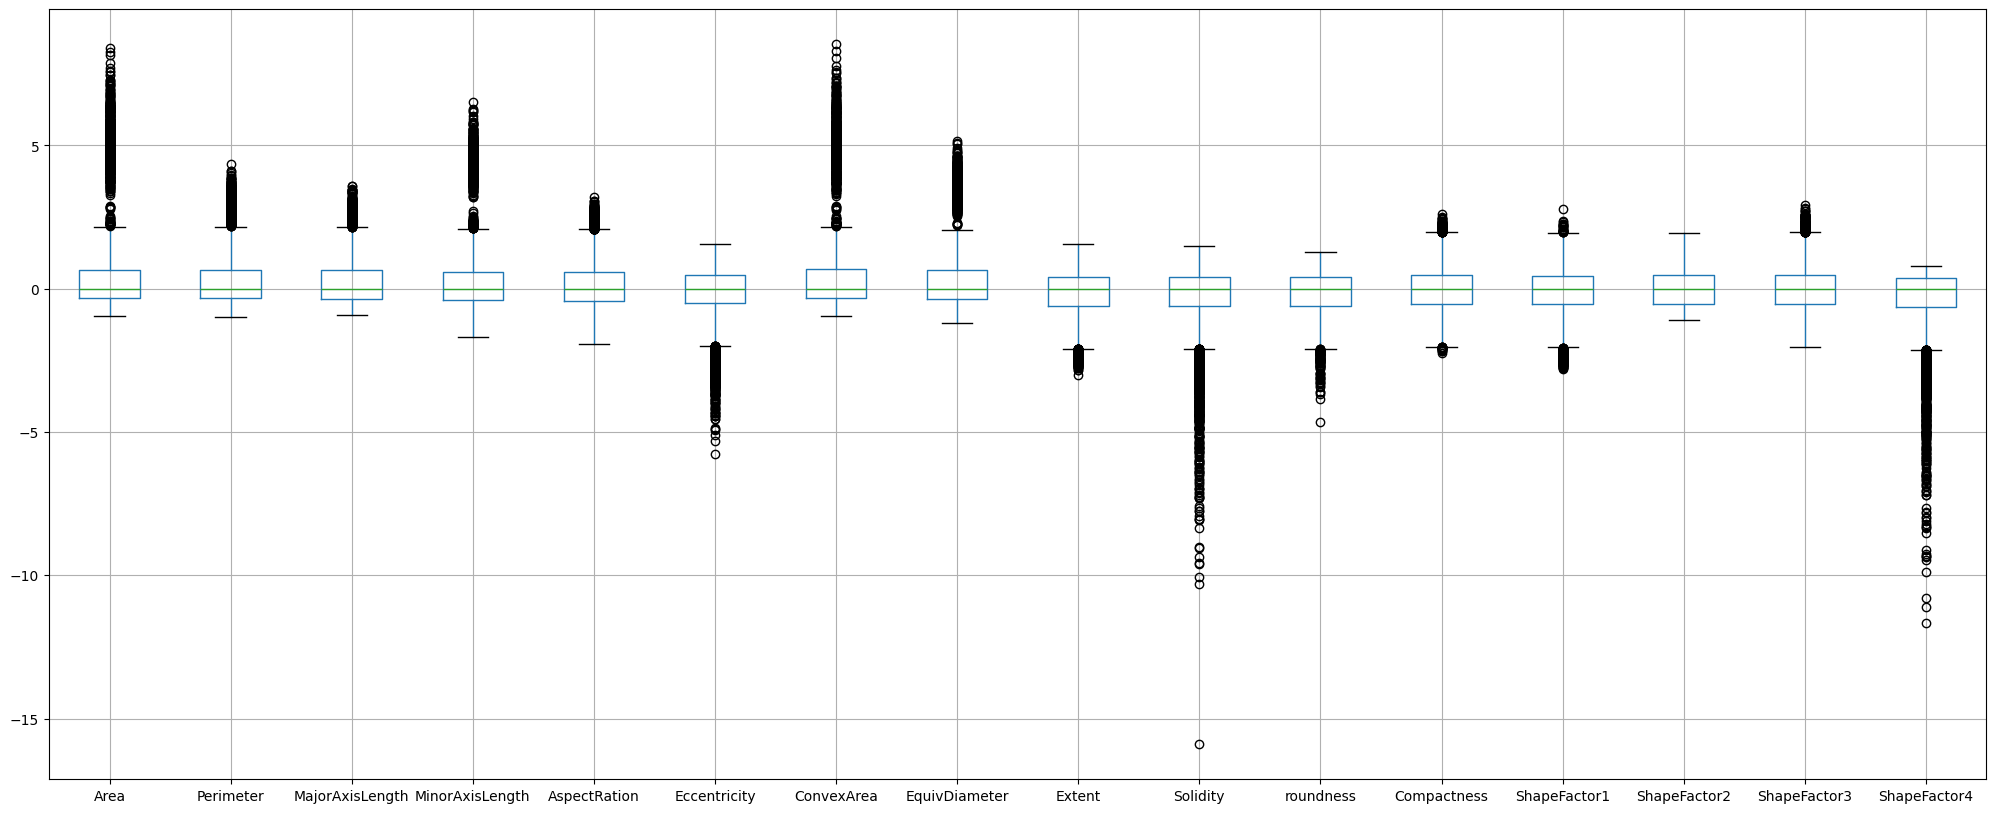

In [40]:
scaler = preprocessing.RobustScaler()
df_RobustScaler[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = scaler.fit_transform(df_RobustScaler[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

df_RobustScaler.boxplot(column = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],figsize = (25, 10));

Opted to save the results of RobustScaler in case of need in a new data frame called "df_scaled" where this method is more robust with outliers.

In [41]:
df_scaled = df_RobustScaler.copy()

In [42]:
df_scaled.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.650176  -0.674670        -0.720061        -0.450252     -1.287954   
1 -0.636618  -0.573361        -0.782186        -0.235466     -1.651251   
2 -0.610782  -0.624178        -0.682331        -0.400660     -1.242389   
3 -0.585666  -0.544621        -0.700742        -0.240757     -1.446444   
4 -0.580387  -0.638706        -0.771446        -0.052265     -1.784287   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.270284   -0.643601      -0.750203  0.059567  0.131945   0.883185   
1     -3.730295   -0.625735      -0.732625  0.353414 -0.759294   0.045726   
2     -2.133671   -0.605485      -0.699413  0.267588  0.293774   0.763127   
3     -2.811823   -0.565062      -0.667474  0.334550 -2.668207   0.245116   
4     -4.556475   -0.577064      -0.660804  0.194070  0.601065   1.199915   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     1.560992      0.500423      1.429812      1.676249      0.559366      5  
1     2.125093      0.243153      1.839288      2.335906      0.489131      5  
2     1.497156      0.436556      1.331896      1.603402      0.641250      5  
3     1.769500      0.270910      1.495976      1.916742     -0.523271      5  
4     2.357049      0.037795      1.938967      2.615457      0.665157      5

In [43]:
df.shape, df_outliers.shape, df_scaled.shape

((13611, 17), (10594, 17), (13611, 17))

# 4. Machine Learning Clusters

After a few analyses of the data set, tests will be carried out using K-Means Clustering, Hierarchical Clustering, K-Medoids Clustering, DBSCAN, OPTICS Clustering and Fuzzy C-means Clustering to check which clustering solution performs the best.

## 4.1 K-means Clustering

First, splitting the data to use in the Unsupervised Machine Learning model algorithm 

- `X` - Storing the values of the features: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4.

In [44]:
X = df.iloc[:, 0:16].values.copy()
# X = df.drop("Class", axis = 1).values.copy()

Also created two variables called "`feature1_index and feature2_index`" with constant numbers to use easily in the graphics and so on, when necessary, at the moment, it set a constant number of 2 to "feature1_index" and 3 to "feature2_index", to analyse the column 2 and 3 of the data frame. 

In [45]:
feature1_index = 2
feature2_index = 3

Importing the method “`KMeans`” from "sklearn.cluster" in “4.1 topic”.

In [46]:
from sklearn.cluster import KMeans

Creating the classifier cluster: "`kmeans`" applying "KMeans" with the parameters: "n_clusters = 4, max_iter = 300, n_init = 10, random_state = 38", next using the "fit_predict" in "X" values and storing in the variable "`y_kmeans`" the prediction. 


In [47]:
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 38)

y_kmeans = kmeans.fit_predict(X)

Next, visualising the clusters using a "Scatter Plot", for the four clusters and plotting their centroid points for each cluster using the features "`MajorAxisLength and MinorAxisLength`".

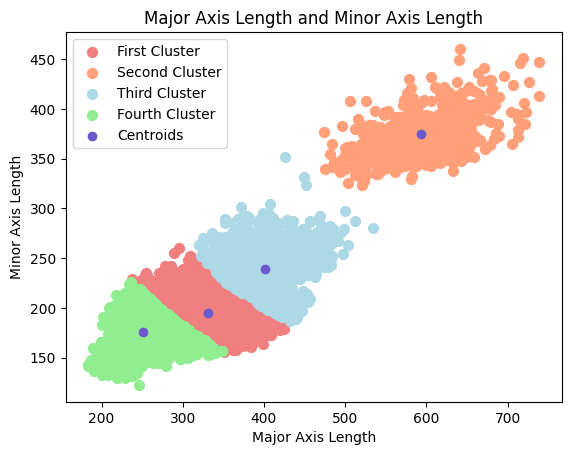

In [48]:
plt.scatter(X[y_kmeans == 0, feature1_index], X[y_kmeans == 0, feature2_index], s = 50, c = 'lightcoral', label = 'First Cluster')
plt.scatter(X[y_kmeans == 1, feature1_index], X[y_kmeans == 1, feature2_index], s = 50, c = 'lightsalmon', label = 'Second Cluster')
plt.scatter(X[y_kmeans == 2, feature1_index], X[y_kmeans == 2, feature2_index], s = 50, c = 'lightblue', label = 'Third Cluster')
plt.scatter(X[y_kmeans == 3, feature1_index], X[y_kmeans == 3, feature2_index], s = 50, c = 'lightgreen', label = 'Fourth Cluster')

plt.title("Major Axis Length and Minor Axis Length")
plt.scatter(kmeans.cluster_centers_[:, feature1_index], kmeans.cluster_centers_[:, feature2_index], c = 'slateblue', label = 'Centroids')
plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')

plt.legend(loc = "best")
plt.show()

Next, it will use the Elbow method to analyse how many numbers of clusters are ideal for this specific data, using a measurement of "Within Cluster Sum of Squares (WCSS)". 

First, it declared an empty array named "wcss" using a "for loop" in a range from 1 to 11 to test the possibility of having between 1 to 11 clusters with the same parameters as before, but the number of clusters varying, training the model with "fit" method in "X" values, and storing it in the array "wcss", next plotting the results in a "Line graph" plot, to analyse the elbow of it.

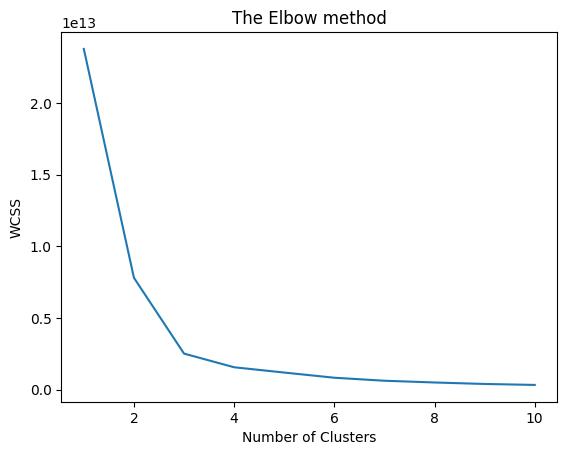

In [49]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 38)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Analysing the graphic above is indicative of 3 clusters performs the best results in this case.

Importing the library "`numpy`" in "`4.1 topic`", to use the methods "arange, array, sqrt, sum, dot and argmax".

In [50]:
import numpy as np

As achieved before, is going to use an updated elbow method to indicate the number of the best cluster with a red circle to show it in the graphic.

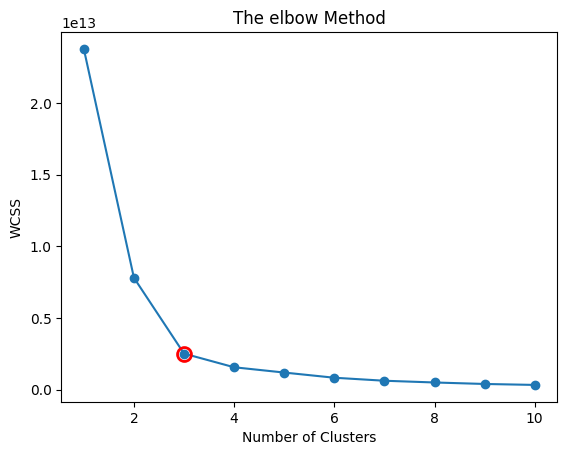

In [51]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 38)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

x_coords = np.arange(1, 11)
line_start = np.array([1, wcss[0]])
line_end = np.array([10, wcss[-1]])

line_vec = line_end - line_start
line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))

distances = []
for i in range(1, 11):
    point = np.array([x_coords[i - 1], wcss[i - 1]])
    point_vec = point - line_start

    proj_of_point_onto_line = line_start + line_vec_norm * np.dot(point_vec, line_vec_norm)

    distance = np.sqrt(np.sum((proj_of_point_onto_line - point)**2))
    distances.append(distance)


elbow_point = np.argmax(distances) + 1

plt.plot(elbow_point, wcss[elbow_point - 1], 'ro', markersize = 10, markerfacecolor = 'none', markeredgewidth = 2)

plt.show()

The first elbow graphic shows a curve, and for analysis is necessary to interpret and do it by themselves, by assuming a number of the best clusters the second one shows a red circle, which is the best, which makes it easy.

Importing "silhouette_score" from "`sklearn.metric`" in "`4.1 topic`", to use the silhouette score.

In [52]:
from sklearn.metrics import silhouette_score

Next, getting a total of **0.56** after calculating the Silhouette score based on four clusters. 

In [53]:
print(f'Silhouette Score(n = 4): {silhouette_score(X, y_kmeans)}')

Silhouette Score(n = 4): 0.5699545103071542


Testing with 3 clusters and got a total of **0.66** after calculating the Silhouette score based on three clusters. 

In [54]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)
silhouette_score(X, kmeans.fit_predict(X))

0.6647284829798941

Next, visualising the clusters using a "Scatter Plot", for the three clusters and plotting their centroid points for each cluster using the features "`MajorAxisLength and MinorAxisLength`".

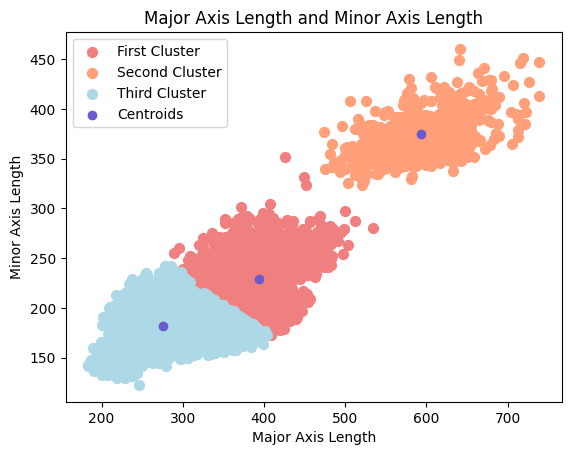

In [55]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, feature1_index], X[y_kmeans == 0, feature2_index], s = 50, c = 'lightcoral', label = 'First Cluster')
plt.scatter(X[y_kmeans == 1, feature1_index], X[y_kmeans == 1, feature2_index], s = 50, c = 'lightsalmon', label = 'Second Cluster')
plt.scatter(X[y_kmeans == 2, feature1_index], X[y_kmeans == 2, feature2_index], s = 50, c = 'lightblue', label = 'Third Cluster')

plt.title("Major Axis Length and Minor Axis Length")
plt.scatter(kmeans.cluster_centers_[:, feature1_index], kmeans.cluster_centers_[:, feature2_index], c = 'slateblue', label = 'Centroids')
plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')

plt.legend(loc = "best")
plt.show()

### 4.1.1 K-means Clustering Comparison of Davies-Bouldin Index and Silhouette Score

First, creating a function to perform K-Means clustering and calculate metrics

In [56]:
def perform_clustering(n_clusters, data):
    kmeans = KMeans(n_clusters = n_clusters)
    labels = kmeans.fit_predict(data)
    db_index = davies_bouldin_score(data, labels)
    silhouette_avg = silhouette_score(data, labels)
    return db_index, silhouette_avg

Importing "davies_bouldin_score" from "`sklearn.metrics`" in "`4.1.1 topic`", to use the Davies Bouldin Score.

In [57]:
from sklearn.metrics import davies_bouldin_score

Creating a few variable arrays "db_scores and silhouette_scores" to store the values when executed.

In [58]:
cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, X)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

Next, the results are plotted in a "Line graph" plot to compare between the "Davies-Bouldin Index and Silhouette Score" and analyse the best number of clusters.

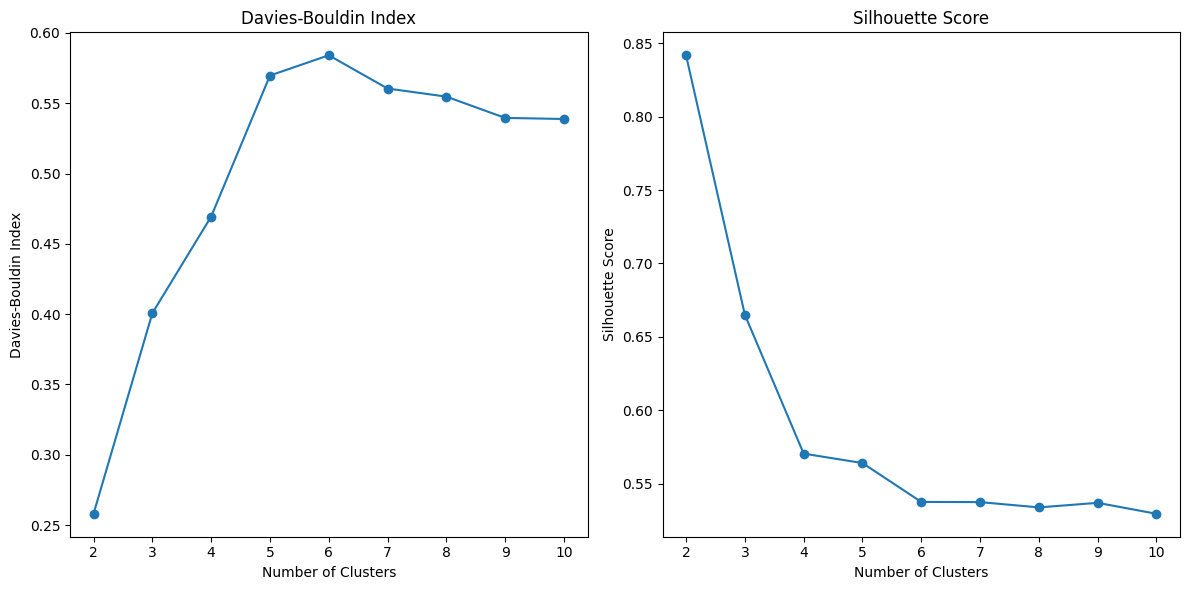

In [59]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, marker = 'o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Next, getting the optimal number of clusters based on the metrics.

In [60]:
optimal_clusters_db = np.argmin(db_scores) + 2 
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2 

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 2
Optimal Clusters (Silhouette): 2


As represented in the "Line graph" plot, the number of clusters based on the Davies-Bouldin Index will be **2** looking at the lowest point on the graph and for Silhouette Score **2** looking at the highest point on the graph, and both values are confirmed in the metrics test.

Importing "linkage and dendrogram" from "`scipy.cluster.hierarchy`" in "`4.1.1 topic`" to use a dendrogram graphic.

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram

Next, plotting a dendrogram with the optimal number of clusters from Davies-Bouldin Index.

In [62]:
optimal_KMeans = KMeans(n_clusters = optimal_clusters_db)
optimal_labels = optimal_KMeans.fit_predict(X)
linkage_matrix_optimal = linkage(X, method = 'ward')

plt.figure(figsize = (12, 6))
dendrogram(linkage_matrix_optimal, orientation = "top", labels = optimal_labels, distance_sort = 'descending')

plt.title(f'Dendrogram with {optimal_clusters_db} Clusters (Davies-Bouldin)')
plt.show()

Next, similar as before, but now everything is in the same code: 
1. Creating a function to perform K-Means clustering and calculate metrics.
2. Creating a few variable arrays "db_scores and silhouette_scores" to store the values when executed.
3. Next, the results are plotted in a "Line graph" plot to compare the "Davies-Bouldin Index and Silhouette Score" and visualise the best number of clusters.
4. Next, getting the optimal number of clusters based on Silhouette Score metrics.
5. Creating a K-means clustering with the optimal number of clusters.
6. Next, visualising the clusters using a "Scatter Plot", for the **two** clusters and plotting their centroid points for each cluster using the features "`MajorAxisLength and MinorAxisLength`".

In [63]:
def perform_clustering(n_clusters, data):
    kmeans = KMeans(n_clusters = n_clusters)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    silhouette_avg = silhouette_score(X, labels)
    return db_index, silhouette_avg

cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, X)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (18, 6))

# Davies-Bouldin Index
plt.subplot(1, 3, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Optimal number of clusters based on Silhouette Score
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2 

# K-means clustering with the optimal number of clusters
optimal_kmeans = KMeans(n_clusters = optimal_clusters_silhouette)
optimal_labels = optimal_kmeans.fit_predict(X)

plt.subplot(1, 3, 3)
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = optimal_labels, cmap = 'viridis')
plt.scatter(optimal_kmeans.cluster_centers_[:, feature1_index], optimal_kmeans.cluster_centers_[:, feature2_index],
            s = 300, c = 'red', marker = 'X', label = 'Centroids')

plt.title('K-means Clustering')
plt.xlabel(f'Feature {feature1_index}')
plt.ylabel(f'Feature {feature2_index}')
plt.legend()

plt.tight_layout()
plt.show()

As represented in the "Line graph" plot, the number of clusters based on the Davies-Bouldin Index and Silhouette Score will be **2**, and next plotted a "Scatter Plot" with their centroid points for each cluster using the features "MajorAxisLength and MinorAxisLength" with 2 clusters got from Silhouette Score.

Next, getting the optimal number of clusters based on the metrics.

In [64]:
optimal_clusters_db = np.argmin(db_scores) + 2 
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2 

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 2
Optimal Clusters (Silhouette): 2


## 4.2 Hierarchical Clustering

First, splitting the data to use in the Unsupervised Machine Learning model algorithm.

- "`X`" - Storing the values of the features: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4.

In [65]:
X = df.iloc[:, 0:16].values.copy()

Importing the method “`AgglomerativeClustering`” from "sklearn.cluster" in “4.2 topic”.

In [66]:
from sklearn.cluster import AgglomerativeClustering

Creating the classifier cluster: "hierarchicalClustering" applying "AgglomerativeClustering" with the parameters: "n_clusters = 4, metric = 'euclidean', linkage = 'ward'", next using the "fit_predict" in "X" values and storing in the variable "y_hc" the prediction.

Change the parameter affinity to metric, the affinity parameter "Deprecated since version 1.2: affinity was deprecated in version 1.2 and will be renamed to metric in 1.4." (scikit-learn developers, 2023) also the standard values for "metric" parameter has been changed "Deprecated since version 1.4: metric=None is deprecated in 1.4 and will be removed in 1.6. Let metric be the default value (i.e. "euclidean") instead." (scikit-learn developers, 2024).

In [67]:
hierarchicalClustering = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')  

y_hc = hierarchicalClustering.fit_predict(X)

Next, visualising the clusters using a "Scatter Plot" for the **four** clusters and plotting their centroid points for each cluster using the features "`MajorAxisLength and MinorAxisLength`".

In [68]:
plt.figure(figsize = (5.7, 4.7))
plt.title("Major Axis Length and Minor Axis Length with Hierarchical Clustering")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = hierarchicalClustering.labels_) 

plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')
plt.show()

Next, getting a total of **0.56** after calculating the Silhouette score based on four clusters.

In [69]:
print(f'Silhouette Score(n = 4): {silhouette_score(X, y_hc)}')

Silhouette Score(n = 4): 0.5671835196556886


Testing with 3 clusters and got a total of 0.61 after calculating the Silhouette score based on three clusters.

In [70]:
hierarchicalClustering = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
silhouette_score(X, hierarchicalClustering.fit_predict(X))

0.6108111488137355

Next, visualising the clusters using a "Scatter Plot", for the **three** clusters using the features "MajorAxisLength and MinorAxisLength".

In [71]:
hierarchicalClustering = AgglomerativeClustering(n_clusters = 3)
y_hc = hierarchicalClustering.fit_predict(X)

plt.scatter(X[y_hc == 0, feature1_index], X[y_hc == 0, feature2_index], s = 50, c = 'lightcoral', label = 'First Cluster')
plt.scatter(X[y_hc == 1, feature1_index], X[y_hc == 1, feature2_index], s = 50, c = 'lightsalmon', label = 'Second Cluster')
plt.scatter(X[y_hc == 2, feature1_index], X[y_hc == 2, feature2_index], s = 50, c = 'lightblue', label = 'Third Cluster')
plt.scatter(X[y_hc == 3, feature1_index], X[y_hc == 3, feature2_index], s = 50, c = 'lightgreen', label = 'Fourth Cluster')

plt.title('Major Axis Length and Minor Axis Length with Hierarchical Clustering')
plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')

plt.legend(loc = "best")
plt.show()

### 4.2.1 Hierarchical Clustering Comparison of Davies-Bouldin Index and Silhouette Score

Next,
1. Creating a function to perform Agglomerative Clustering and calculate metrics.
2. Creating a few variable arrays "db_scores and silhouette_scores" to store the values when executed.
3. Next, the results are plotted in a "Line graph" plot to compare the "Davies-Bouldin Index and Silhouette Score" and visualise the best number of clusters.
4. Next, getting the optimal number of clusters based on Silhouette Score metrics.
5. Creating an Agglomerative Clustering with the optimal number of clusters.
6. Next, visualising the clusters using a "Scatter Plot", for each cluster in total got from the tests using the features "MajorAxisLength and MinorAxisLength".

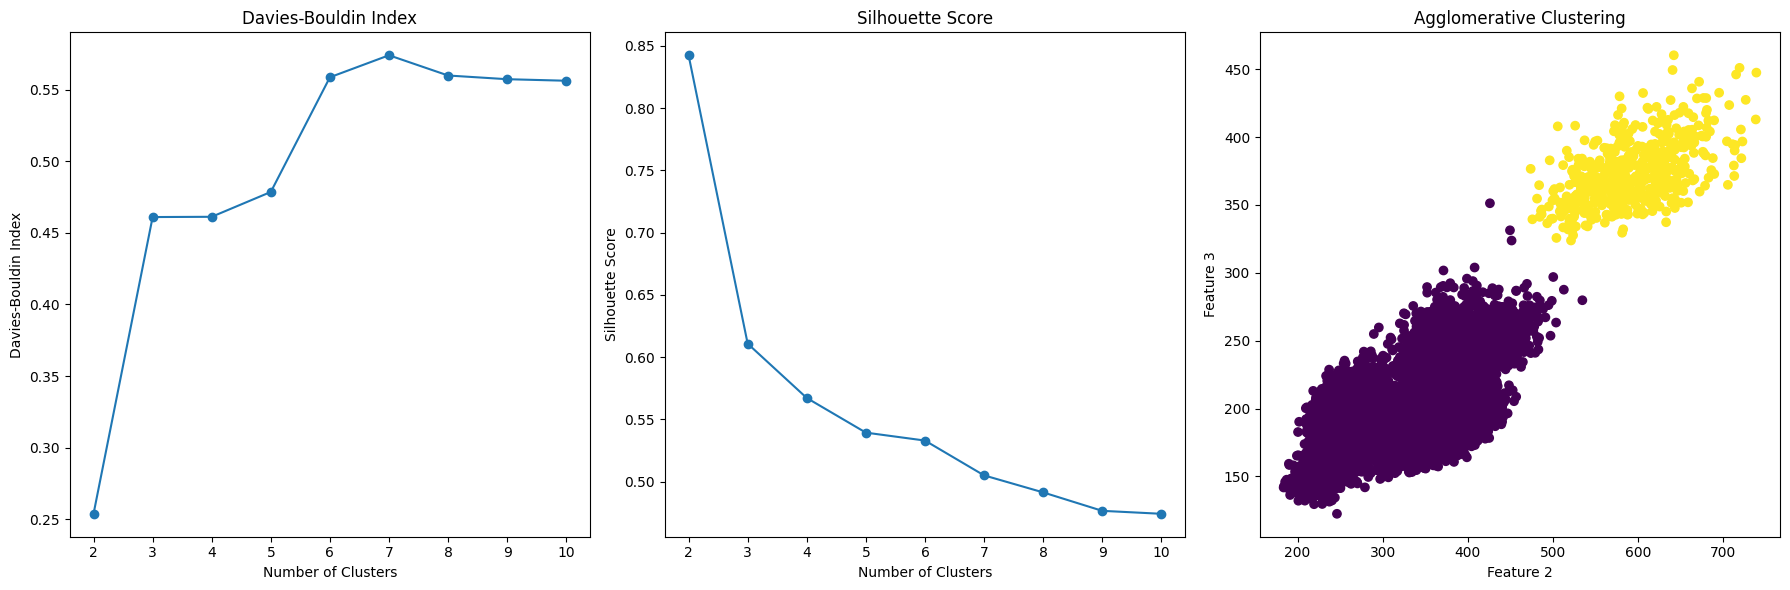

In [72]:
def perform_clustering(n_clusters, data):
    hierarchicalClustering = AgglomerativeClustering(n_clusters = n_clusters)
    labels = hierarchicalClustering.fit_predict(data)
    db_index = davies_bouldin_score(data, labels)
    silhouette_avg = silhouette_score(data, labels)
    return db_index, silhouette_avg

cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, X)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (18, 6))

# Davies-Bouldin Index
plt.subplot(1, 3, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Optimal number of clusters based on Silhouette Score
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2 

# AgglomerativeClustering with the optimal number of clusters
optimal_AgglomerativeClustering = AgglomerativeClustering(n_clusters = optimal_clusters_silhouette)
optimal_labels = optimal_AgglomerativeClustering.fit_predict(X)

plt.subplot(1, 3, 3)
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = optimal_labels, cmap = 'viridis')

plt.title('Agglomerative Clustering')
plt.xlabel(f'Feature {feature1_index}')
plt.ylabel(f'Feature {feature2_index}')

plt.tight_layout()
plt.show()

Next, getting the optimal number of clusters based on the metrics.

Above, as represented in the "Line graph" plot, the number of clusters based on the Davies-Bouldin Index and Silhouette Score will be 2, and next, plotted a "Scatter Plot" using the features "MajorAxisLength and MinorAxisLength" with 2 clusters got from Silhouette Score.

In [73]:
optimal_clusters_db = np.argmin(db_scores) + 2 
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2 

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 2
Optimal Clusters (Silhouette): 2


Next, plotting a dendrogram with the optimal number of clusters from the Davies-Bouldin Index.

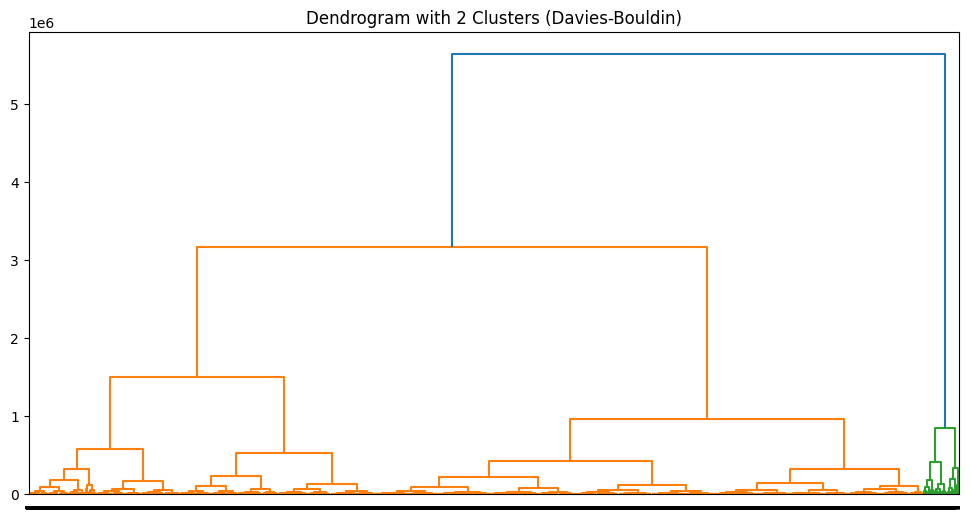

In [74]:
optimal_Agglomerative = AgglomerativeClustering(n_clusters = optimal_clusters_db)
optimal_labels = optimal_Agglomerative.fit_predict(X)
linkage_matrix_optimal = linkage(X, method = 'ward')

plt.figure(figsize = (12, 6))
dendrogram(linkage_matrix_optimal, orientation = "top", labels = optimal_labels, distance_sort = 'descending')

plt.title(f'Dendrogram with {optimal_clusters_db} Clusters (Davies-Bouldin)')
plt.show()

## 4.3 K-Medoids Clustering

First, splitting the data to use in the Unsupervised Machine Learning model algorithm.

- "`X`" - Storing the values of the features: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4.
- "`y`" - Storing the target variable "Class".

In [75]:
X = df.iloc[:, 0:16].values.copy()
y = df.iloc[:, -1].values.copy()

First using pip install to install the "scikit-learn-extra" dependencies.

In [76]:
# pip install scikit-learn-extra

Importing the method “KMedoids” from "sklearn_extra.cluster" in “4.3 topic”.

In [77]:
from sklearn_extra.cluster import KMedoids

Creating the classifier cluster: "kMedoids" applying "KMedoids" with the parameters: "n_clusters = 4, random_state = 38", next using the "fit" in "X" values and storing in the variable "centers" and in the variable "y_kmc" the prediction.

In [78]:
kMedoids = KMedoids(n_clusters = 4, random_state = 38)
centers = kMedoids.fit(X)
y_kmc = kMedoids.predict(X)

In [79]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6), dpi = 100)
axes[0].scatter(X[:, feature1_index], X[:, feature2_index], c = y, cmap = 'gist_rainbow', edgecolor = 'k')
axes[1].scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmc, cmap = 'jet', edgecolor = 'k')

axes[0].set_xlabel('MajorAxisLength')
axes[0].set_ylabel('MinorAxisLength')

axes[1].set_xlabel('MajorAxisLength')
axes[1].set_ylabel('MinorAxisLength')

axes[0].set_title('Actual')
axes[1].set_title('Predicted')

plt.show()

Next, getting a total of **0.41** after calculating the Silhouette score based on four clusters.

In [80]:
print(f'Silhouette Score(n = 4): {silhouette_score(X, y_kmc)}')

Silhouette Score(n = 4): 0.41449629095956214


Testing with 3 clusters and got a total of **0.44** after calculating the Silhouette score based on three clusters.

In [81]:
kMedoids = KMedoids(n_clusters = 3, random_state = 38)

silhouette_score(X, kMedoids.fit_predict(X))

0.44801645593755496

Next, visualising the clusters using a "Scatter Plot", for the three clusters using the features "MajorAxisLength and MinorAxisLength".

In [82]:
kMedoids = KMedoids(n_clusters = 3, random_state = 38)
y_kmc = kMedoids.fit_predict(X)

plt.title("Major Axis Length and Minor Axis Length with KMedoids")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmc, cmap = 'jet', edgecolor = (0, 0, 0, 0.3))
plt.scatter(kMedoids.cluster_centers_[:, feature1_index], kMedoids.cluster_centers_[:, feature2_index], c = 'yellow', label = 'Centroids')
plt.xlabel('MajorAxisLength')
plt.ylabel('MinorAxisLength')

plt.show()

### 4.3.1 K-Medoids Clustering Comparison of Davies-Bouldin Index and Silhouette Score

Next,
1. Creating a function to perform KMedoids Clustering and calculate metrics.
2. Creating a few variable arrays "db_scores and silhouette_scores" to store the values when executed.
3. Next, the results are plotted in a "Line graph" plot to compare the "Davies-Bouldin Index and Silhouette Score" and visualise the best number of clusters.
4. Next, getting the optimal number of clusters based on Silhouette Score metrics.
5. Creating an KMedoids Clustering with the optimal number of clusters.
6. Next, visualising the clusters using a "Scatter Plot", for each cluster in total got from the tests using the features "MajorAxisLength and MinorAxisLength".

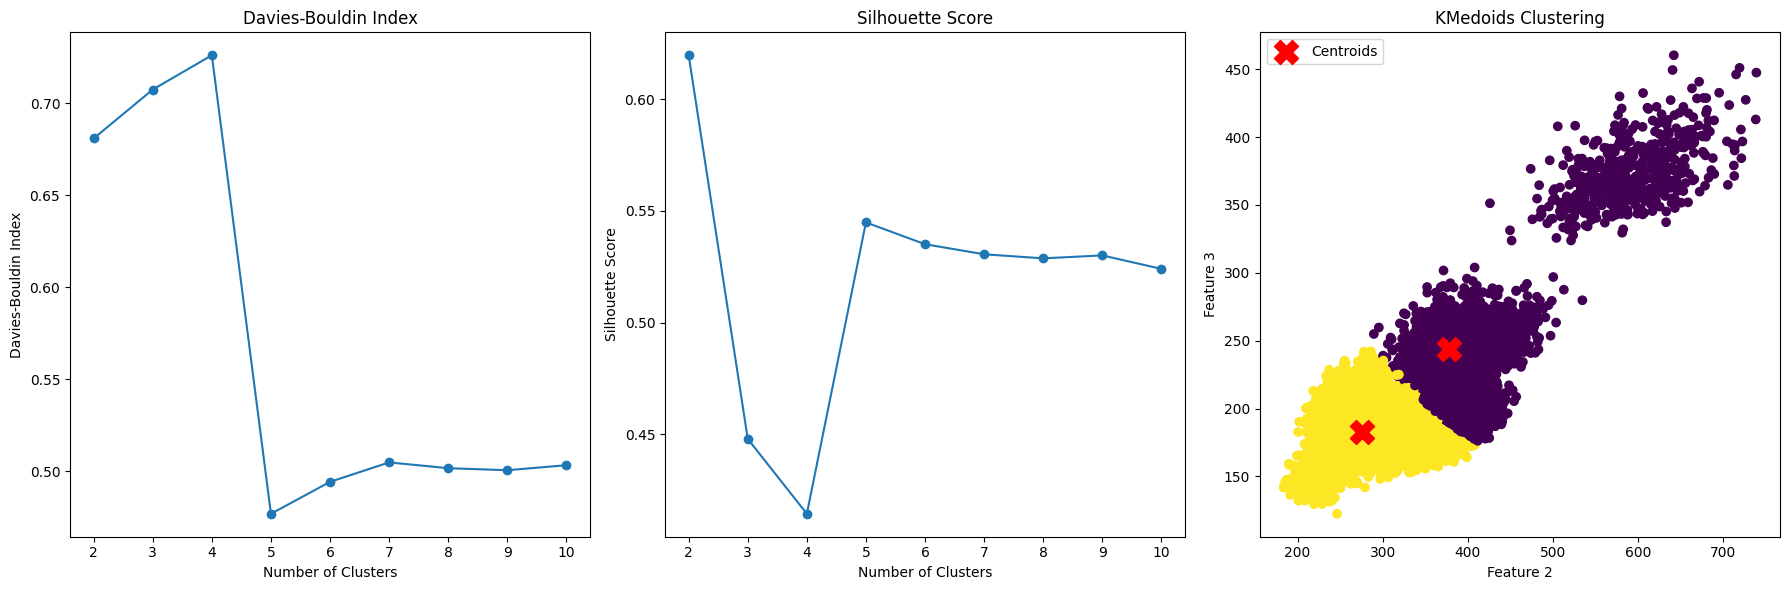

In [83]:
def perform_clustering(n_clusters, data):
    kMedoids = KMedoids(n_clusters = n_clusters)
    labels = kMedoids.fit_predict(data)
    db_index = davies_bouldin_score(data, labels)
    silhouette_avg = silhouette_score(data, labels)
    return db_index, silhouette_avg

cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, X)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (18, 6))

# Davies-Bouldin Index
plt.subplot(1, 3, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Optimal number of clusters based on Silhouette Score
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2 

# KMedoids with the optimal number of clusters
optimal_KMedoids = KMedoids(n_clusters = optimal_clusters_silhouette)
optimal_labels = optimal_KMedoids.fit_predict(X)

plt.subplot(1, 3, 3)
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = optimal_labels, cmap = 'viridis')
plt.scatter(optimal_KMedoids.cluster_centers_[:, feature1_index], optimal_KMedoids.cluster_centers_[:, feature2_index],
            s = 300, c = 'red', marker = 'X', label = 'Centroids')

plt.title('KMedoids Clustering')
plt.xlabel(f'Feature {feature1_index}')
plt.ylabel(f'Feature {feature2_index}')
plt.legend()

plt.tight_layout()
plt.show()

Next, getting the optimal number of clusters based on the metrics.

Above, as represented in the "Line graph" plot, the number of clusters based on the Davies-Bouldin Index is **5** and Silhouette Score is **2**, and next, plotted a "Scatter Plot" using the features "MajorAxisLength and MinorAxisLength" with 2 clusters got from Silhouette Score.

In [84]:
optimal_clusters_db = np.argmin(db_scores) + 2 
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2 

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 5
Optimal Clusters (Silhouette): 2


Next, plotting a dendrogram with the optimal number of clusters from the Davies-Bouldin Index.

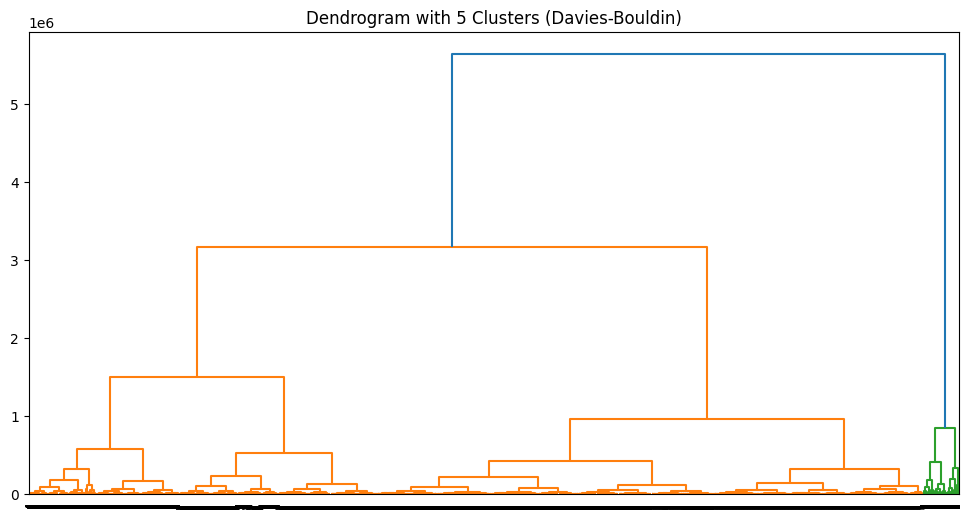

In [85]:
optimal_KMedoids = KMedoids(n_clusters = optimal_clusters_db)
optimal_labels = optimal_KMedoids.fit_predict(X)
linkage_matrix_optimal = linkage(X, method = 'ward')

plt.figure(figsize = (12, 6))
dendrogram(linkage_matrix_optimal, orientation = "top", labels = optimal_labels, distance_sort = 'descending')

plt.title(f'Dendrogram with {optimal_clusters_db} Clusters (Davies-Bouldin)')
plt.show()

Next, visualising the clusters using a "Scatter Plot", for the **five** clusters from the Davies-Bouldin Index using the features "MajorAxisLength and MinorAxisLength".

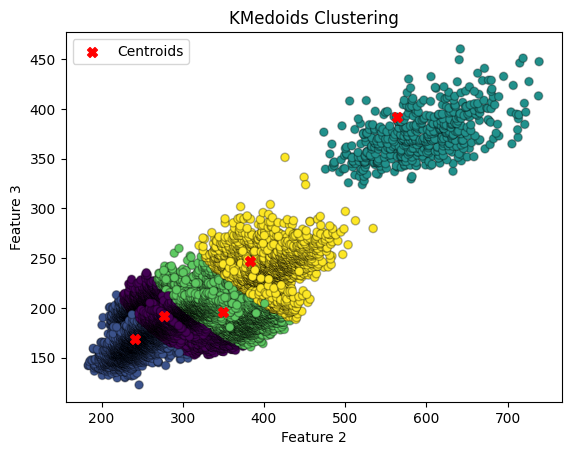

In [86]:
kMedoids = KMedoids(n_clusters = 5, random_state = 38)
y_kmc = kMedoids.fit_predict(X)

plt.scatter(X[:, feature1_index], X[:, feature2_index], c = optimal_labels, cmap = 'viridis', edgecolor = (0, 0, 0, 0.3))
plt.scatter(optimal_KMedoids.cluster_centers_[:, feature1_index], optimal_KMedoids.cluster_centers_[:, feature2_index],
            s = 50, c = 'red', marker = 'X', label = 'Centroids')

plt.title('KMedoids Clustering')
plt.xlabel(f'Feature {feature1_index}')
plt.ylabel(f'Feature {feature2_index}')
plt.legend()

plt.show()

## 4.4 DBSCAN

First, splitting the data to use in the Unsupervised Machine Learning model algorithm.

- "`X`" - Storing the features: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4.

In [87]:
X = df.iloc[:, 0:16].copy()

Importing the method “`DBSCAN`” from "sklearn.cluster" in “4.4 topic”.

In [88]:
from sklearn.cluster import DBSCAN

Creating the classifier cluster: "dbscan" applying "DBSCAN" with the parameters: "eps = 30, min_samples = 1", next using the "fit_predict" in "X" values and storing in the variable "y_dbscan" the prediction.

In [89]:
dbscan = DBSCAN(eps = 30, min_samples = 1)

y_dbscan = dbscan.fit_predict(X)

Next, visualising the clusters using a "Scatter Plot", with the results using the features "MajorAxisLength and MinorAxisLength".

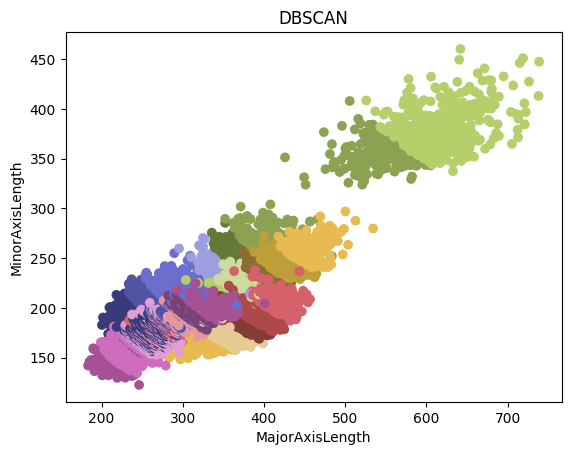

In [90]:
plt.title("DBSCAN")
plt.scatter(X.iloc[:, feature1_index], X.iloc[:, feature2_index], c = y_dbscan, cmap = 'tab20b')
plt.xlabel('MajorAxisLength')
plt.ylabel('MinorAxisLength')
plt.show()

Importing the method “`NearestNeighbors`” from "sklearn.neighbors" in “4.4 topic”.

In [91]:
from sklearn.neighbors import NearestNeighbors

The results before look messy, once the epsilon is very small and needs to optimise parameters, next need to find a value of epsilon and minpoints and train the model once again, for epsilon, we can use the K-distance graph, and for that, is needed the distance between the points, in this case, it will be obtained using "NearestNeighbors"

Next, initialise an object called "neigh" using "NearestNeighbors" with the parameters: "n_neighbors = 2", next using the "fit" to train the model in "X" feature1_index and feature2_index, in this case, (Major Axis Length and Minor Axis Length columns) and stored in the variable "nbrs", and storing the distances and indices in the variables "distances and indices".

In [92]:
neigh = NearestNeighbors(n_neighbors = 2)

nbrs = neigh.fit(X.iloc[:, [feature1_index, feature2_index]])

distances, indices = nbrs.kneighbors(X.iloc[:, [feature1_index, feature2_index]])

Plotting the K-distance Graph

In [93]:
distances = distances[:, 1]

plt.figure(figsize = (14,7))

plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)

plt.show()

Using the method "np.mean" to get the average of the distances and return **0.73** as a total.

In [94]:
np.mean(distances)

0.7392919450782641

Creating once again the classifier cluster: "dbscan" applying "DBSCAN" with the parameters: "eps = 0.74, min_samples = 1" and training the model using "X", and adding another column to the "X" data frame called "DBSCAN_opt_labels".

In [95]:
dbscan = DBSCAN(eps = 0.74, min_samples = 1)

dbscan.fit(X.iloc[:, [feature1_index, feature2_index]])

X['DBSCAN_opt_labels'] = dbscan.labels_

In [96]:
plt.scatter(X.iloc[:, feature1_index], X.iloc[:, feature2_index], c = X['DBSCAN_opt_labels'], cmap = 'jet', s = 15)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [97]:
print(f'Silhouette Score: {silhouette_score(X, y_dbscan)}')
print(f'Davies Bouldin Score: {davies_bouldin_score(X, y_dbscan)}')

Silhouette Score: -0.18185734926786934
Davies Bouldin Score: 2.598752982617613


After tests with Silhouette score and Davies-Bouldin index, got as results  **0.18** Silhouette and **2.59** Davies Bouldin, next creating a classifier cluster: "dbscan" applying "DBSCAN" with the parameters: "eps = 0.18, min_samples = 1" in a new feature called "DBSCAN_silhouette_labels" and plotted it, also created a new test with the parameters: "eps = 2.59, min_samples = 1". in a new feature called "DBSCAN_davies_bouldin_labels" and plotted it.

In [98]:
dbscan = DBSCAN(eps = 0.18, min_samples = 1)

dbscan.fit(X.iloc[:, [feature1_index, feature2_index]])

X['DBSCAN_silhouette_labels'] = dbscan.labels_

plt.scatter(X.iloc[:, feature1_index], X.iloc[:, feature2_index], c = X['DBSCAN_silhouette_labels'], cmap = 'jet', s = 15)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [99]:
dbscan = DBSCAN(eps = 2.59, min_samples = 1)

dbscan.fit(X.iloc[:, [feature1_index, feature2_index]])

X['DBSCAN_davies_bouldin_labels'] = dbscan.labels_

plt.scatter(X.iloc[:, feature1_index], X.iloc[:, feature2_index], c = X['DBSCAN_davies_bouldin_labels'], cmap = 'jet', s = 15)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 4.5 OPTICS Clustering

First, splitting the data to use in the Unsupervised Machine Learning model algorithm.

- "`X`" - Storing the features: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4.

In [100]:
X = df_scaled.iloc[:, 0:16].copy()

Importing the method “`OPTICS`” from "sklearn.cluster" in “4.5 topic”.

In [101]:
from sklearn.cluster import OPTICS

Creating the classifier cluster: "optics" applying "OPTICS" with the parameters: "min_samples = 3, xi = 0.02, min_cluster_size = 0.03", next using the "optics" in "X" values to train and storing in the variable "y_optics" the prediction and plotting the results.

In [102]:
optics = OPTICS(min_samples = 3, xi = 0.02, min_cluster_size = 0.03) 
  
optics.fit(X)
y_optics = optics.fit_predict(X)

In [103]:
plt.title("OPTICS")
plt.scatter(X.iloc[:, feature1_index], X.iloc[:, feature2_index], c = optics.labels_) 
plt.xlabel('MajorAxisLength')
plt.ylabel('MinorAxisLength')
plt.show()

### 4.5.1 OPTICS Clustering - Cluster Optics DBSCAN

Importing the method “`cluster_optics_dbscan`” from "sklearn.cluster" in “4.5.1 topic”.

In [104]:
from sklearn.cluster import cluster_optics_dbscan 

Storing the results of the training in "labels1" and "labels2", in the first label, set an "eps = 0.2" to the DBSCAN technique and in the second label, an "eps = 0.3". Next, it creates a variable called "space" to specify the range, storing the reachability distance for the points and storing the cluster labels for the optics points in a variable called "labels". 

In [105]:
labels1 = cluster_optics_dbscan(reachability = optics.reachability_,
                                core_distances = optics.core_distances_,
                                ordering = optics.ordering_, eps = 0.2)

labels2 = cluster_optics_dbscan(reachability = optics.reachability_,
                                core_distances = optics.core_distances_,
                                ordering = optics.ordering_, eps = 0.3)

space = np.arange(len(X))

reachability = optics.reachability_[optics.ordering_]

labels = optics.labels_[optics.ordering_]  

Importing the method “`gridspec`” from "matplotlib" in “4.5.1 topic”.

In [106]:
from matplotlib import gridspec 

Next, it plotted the Reachability-Distance Plot and the results to compare between "OPTICS Clustering", "DBSCAN Clustering with eps = 0.2" and "DBSCAN Clustering with eps = 0.3".

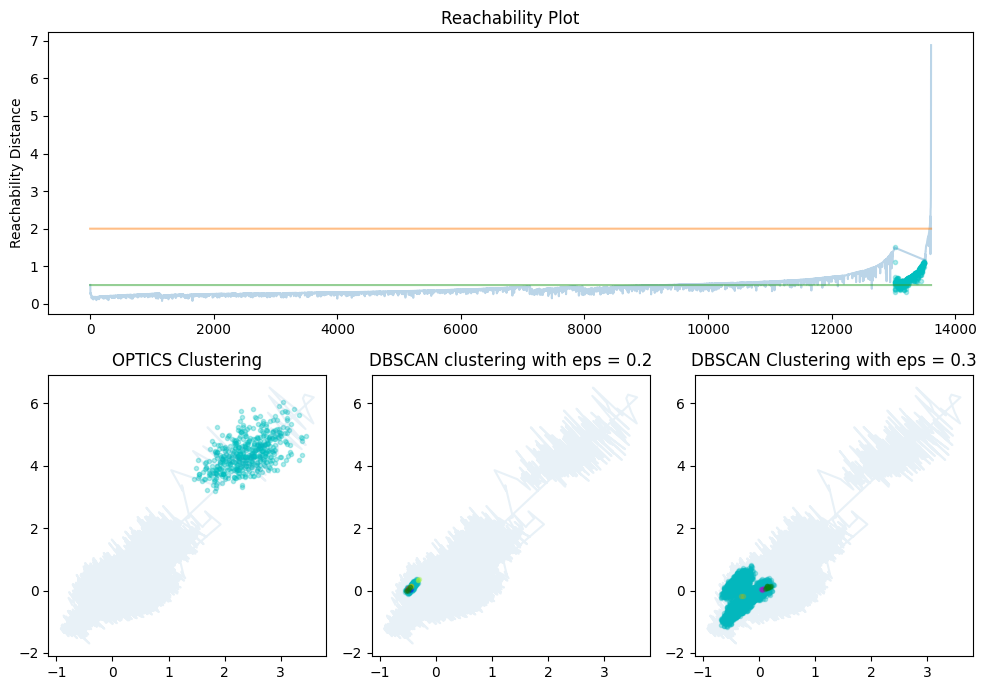

In [107]:
# Defining the framework of the visualization 
plt.figure(figsize = (10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
    
ax1.plot(space[labels == -1], reachability[labels == -1], alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X[optics.labels_ == Class] 
    ax2.plot(Xk.iloc[:, feature1_index], Xk.iloc[:, feature2_index], colour, alpha = 0.3) 
      
ax2.plot(X.iloc[optics.labels_ == -1, feature1_index],
         X.iloc[optics.labels_ == -1, feature2_index], alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.2 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X[labels1 == Class] 
    ax3.plot(Xk.iloc[:, feature1_index], Xk.iloc[:, feature2_index], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X.iloc[labels1 == -1, feature1_index],
         X.iloc[labels1 == -1, feature2_index], alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.2') 
  
# Plotting the DBSCAN Clustering with eps = 0.3 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, feature1_index], Xk.iloc[:, feature2_index], colour, alpha = 0.3) 
          
ax4.plot(X.iloc[labels2 == -1, feature1_index],
         X.iloc[labels2 == -1, feature2_index], alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 0.3') 

plt.tight_layout() 
plt.show() 

## 4.6 Fuzzy C-Means Clustering

First, splitting the data to use in the Unsupervised Machine Learning model algorithm.

- "`X`" - Storing the features: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4.

In [108]:
X = df.iloc[:, 0:16].values.copy()

First using pip install to install the "fuzzy-c-means" dependencies.

In [109]:
# pip install fuzzy-c-means

Importing the method “`FCM`” from "fcmeans" in “4.6 topic”.

In [110]:
from fcmeans import FCM

Creating the classifier cluster: "fuzzy" applying "FCM" with the parameters: "n_clusters = 4", next using the "fit" in "X" values and storing in the variable "fcm_centers" and in the variable "fcm_labels" the outputs.

In [111]:
fuzzy = FCM(n_clusters = 4)

fuzzy.fit(X)

fcm_centers = fuzzy.centers
fcm_labels = fuzzy.u.argmax(axis = 1)

Next, plotting the results of the Actual points and the predicted ones after using Fuzzy C-means technique with their respective centroids.

In [112]:
f, axes = plt.subplots(1, 2, figsize = (11, 5))

axes[0].scatter(X[:, feature1_index], X[:, feature2_index], cmap = 'gist_rainbow')

axes[1].scatter(X[:, feature1_index], X[:, feature2_index], c = fcm_labels, cmap = 'jet')
axes[1].scatter(fcm_centers[:, feature1_index], fcm_centers[:, feature2_index], marker = "x", c = 'tomato')

axes[0].set_xlabel('MajorAxisLength')
axes[0].set_ylabel('MinorAxisLength')

axes[1].set_xlabel('MajorAxisLength')
axes[1].set_ylabel('MinorAxisLength')

axes[0].set_title('Actual')
axes[1].set_title('Predicted')

plt.show()

Next, getting a total of **0.56** after calculating the Silhouette score based on four clusters.

In [113]:
print(f'Silhouette Score(n = 4): {silhouette_score(X, fcm_labels)}')

Silhouette Score(n = 4): 0.5676230663303676


Testing with 3 clusters and got a total of **0.66** after calculating the Silhouette score based on three clusters.

In [114]:
fuzzy = FCM(n_clusters = 3)

fuzzy.fit(X)

silhouette_score(X, fuzzy.predict(X))

0.6634766822178854

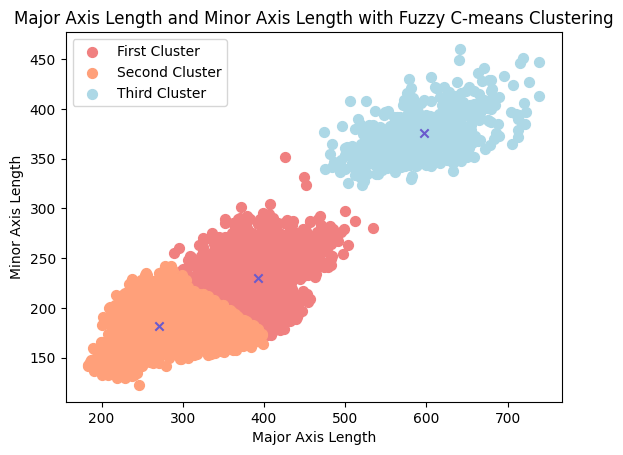

In [115]:
fuzzy = FCM(n_clusters = 3)
fuzzy.fit(X)
fcm_centers = fuzzy.centers
fcm_labels = fuzzy.u.argmax(axis = 1)

plt.scatter(X[fcm_labels == 0, feature1_index], X[fcm_labels == 0, feature2_index], s = 50, c = 'lightcoral', label = 'First Cluster')
plt.scatter(X[fcm_labels == 1, feature1_index], X[fcm_labels == 1, feature2_index], s = 50, c = 'lightsalmon', label = 'Second Cluster')
plt.scatter(X[fcm_labels == 2, feature1_index], X[fcm_labels == 2, feature2_index], s = 50, c = 'lightblue', label = 'Third Cluster')

# plt.scatter(X[:, feature1_index], X[:, feature2_index], c = fcm_labels, cmap = 'jet')
plt.title("Major Axis Length and Minor Axis Length with Fuzzy C-means Clustering")
plt.scatter(fcm_centers[:, feature1_index], fcm_centers[:, feature2_index], marker = "x", c = 'slateblue')
plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')

plt.legend(loc = "best")
plt.show()

### 4.6 Fuzzy C-means Clustering Comparison of Davies-Bouldin Index and Silhouette Score

Next,
1. Creating a function to perform FCM Clustering and calculate metrics.
2. Creating a few variable arrays "db_scores and silhouette_scores" to store the values when executed.
3. Next, the results are plotted in a "Line graph" plot to compare the "Davies-Bouldin Index and Silhouette Score" and visualise the best number of clusters.
4. Next, getting the optimal number of clusters based on Silhouette Score metrics.
5. Creating a Fuzzy C-means Clustering with the optimal number of clusters.
6. Next, visualising the clusters using a "Scatter Plot", for each cluster in total got from the tests using the features "MajorAxisLength and MinorAxisLength".

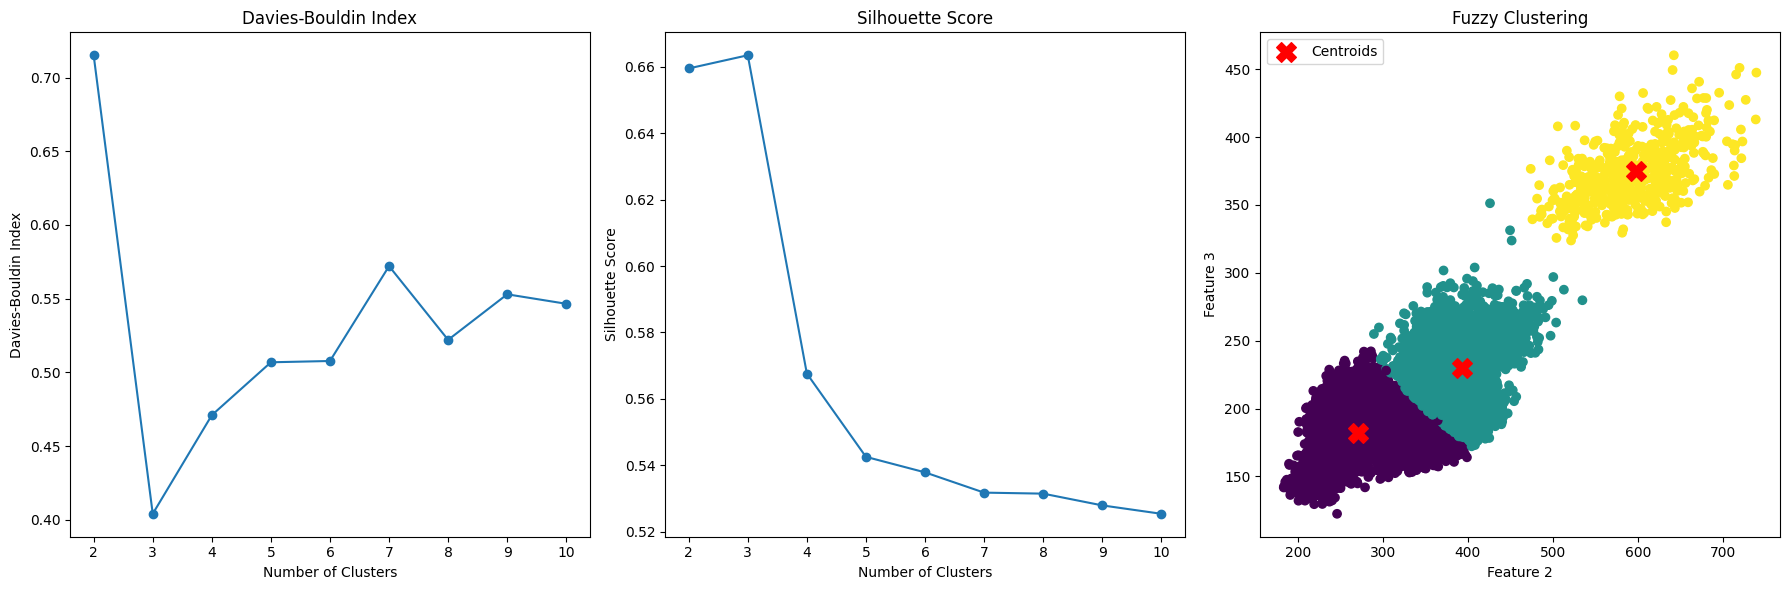

In [116]:
def perform_clustering(n_clusters, data):
    fuzzy = FCM(n_clusters = n_clusters)
    fuzzy.fit(data)
    labels = fuzzy.predict(data)
    db_index = davies_bouldin_score(X, labels)
    silhouette_avg = silhouette_score(X, labels)
    return db_index, silhouette_avg

cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, X)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (18, 6))

# Davies-Bouldin Index
plt.subplot(1, 3, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Optimal number of clusters based on Silhouette Score
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2

# Fuzzy clustering with the optimal number of clusters
optimal_fuzzy = FCM(n_clusters = optimal_clusters_silhouette)
optimal_fuzzy.fit(X)
optimal_labels = optimal_fuzzy.predict(X)

plt.subplot(1, 3, 3)
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = optimal_labels, cmap = 'viridis')
plt.scatter(optimal_fuzzy.centers[:, feature1_index], optimal_fuzzy.centers[:, feature2_index],
            s = 200, c = 'red', marker = 'X', label = 'Centroids')

plt.title('Fuzzy Clustering')
plt.xlabel(f'Feature {feature1_index}')
plt.ylabel(f'Feature {feature2_index}')
plt.legend()

plt.tight_layout()
plt.show()

Next, getting the optimal number of clusters based on the metrics.

Above, as represented in the "Line graph" plot, the number of clusters based on the Davies-Bouldin Index is 3 and Silhouette Score is 3, and next, plotted a "Scatter Plot" using the features "MajorAxisLength and MinorAxisLength" with 3 clusters got from Silhouette Score.

In [117]:
optimal_clusters_db = np.argmin(db_scores) + 2 
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2 

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 3
Optimal Clusters (Silhouette): 3


Next, plotting a dendrogram with the optimal number of clusters from the Davies-Bouldin Index.

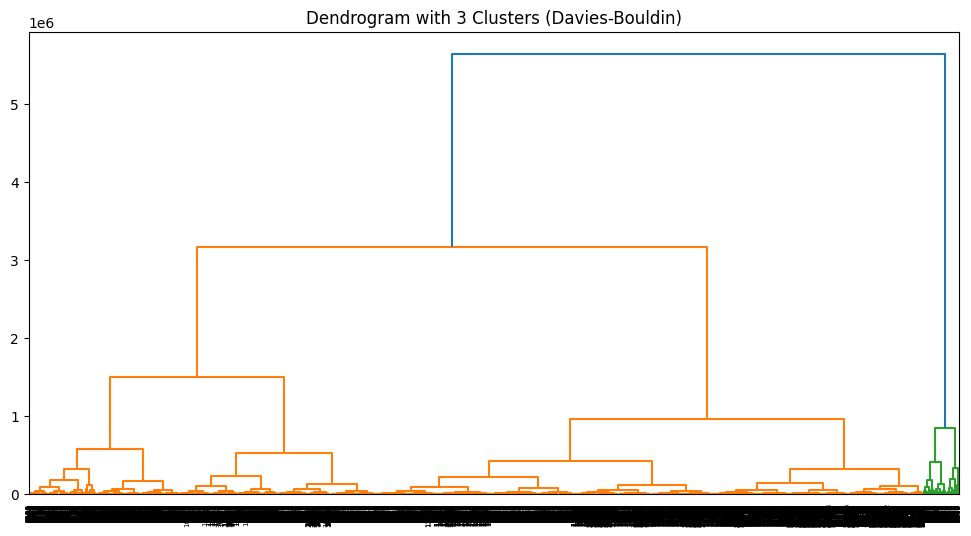

In [118]:
optimal_FCM = FCM(n_clusters = optimal_clusters_db)
optimal_labels = optimal_FCM.fit(X)
linkage_matrix_optimal = linkage(X, method = 'ward')

plt.figure(figsize = (12, 6))
dendrogram(linkage_matrix_optimal, orientation = "top", labels = optimal_labels, distance_sort = 'descending')

plt.title(f'Dendrogram with {optimal_clusters_db} Clusters (Davies-Bouldin)')
plt.show()

**Overview:**

- K-Means Clustering:

Split the data in the “X” variable, getting just the values of the features, next created a cluster to train, test, split and predict the values, tested first with four clusters and plotted in a “Scatter Plot”, the algorithm worked pretty well, to create four clusters and show the centroids, next checked it with the elbow method, and seem that should be fewer clusters than 4, so created a new elbow method that shows in a red circle the exact number of clusters that should be used.

Using the Silhouette score, getting a total of 0.54 with four clusters and 0.66 with three clusters, plotted the results in the graphic with three clusters and the result worked well next it was created a few functions were used to plot the tests, but this time, using Silhouette score and Davies-Bouldin index, the difference from elbow test where the number of clusters should be three, the Silhouette and Davies-Bouldin returned as result the number of two clusters only, plotted a dendrogram to visualise it, next created a few of functions to show the tests side by side and the resulted graphic with two clusters, and the result seem interesting too.
 

- Hierarchical Clustering:

Split the data in the “X” variable, getting just the values of the features next created a cluster to train, test, split and predict the values, tested first with four clusters and plotted in a “Scatter Plot”.

The algorithm worked pretty well, similar as before using K-Means, using the Silhouette score, getting a total of 0.56 with four clusters and 0.61 with three clusters, plotted the results in the graphic with three clusters and also the result worked well, next using a few functions to show side by side the tests and the resulted graphic with two clusters where using Silhouette score and Davies-Bouldin index returned the number of clusters that should be used as two, and also the result seems interesting next plotted a dendrogram with the optimal number of clusters as two.


- K-Medoids Clustering:

Different of others clusters split the data in the “X” variable of all features and “y” to the target class feature, also getting just the values of the features next created a cluster to train, test, split and predict the values, tested first with four clusters and plotted in a “Scatter Plot”.

The prediction of the algorithm worked pretty well, before it was considering seven clusters and as predicted returned four in total, using the Silhouette score, getting a total of 0.41 with four clusters and 0.44 with three clusters, plotted the results in the graphic with three clusters and also the result worked well, similar to the K-Means and Hierarchical Clustering.

Next using a few functions to show side by side the tests and the resulting graphic with two clusters where using the Silhouette score returned two clusters and the Davies-Bouldin index returned five clusters that should be used. The result also seems interesting, next plotted a dendrogram with the optimal number of clusters as five in total and plotted a “Scatter Plot” to check it in five clusters with their respective centroids.

- DBSCAN:

Split the data in the “X” variable, getting at this time the feature information not as before just the values of the feature using K-Means Clustering, Hierarchical Clustering and K-Medoids Clustering, next created a cluster to train, test, split and predict the values, tested first with a value of 30 eps and 1 as min samples, and plotted in a “Scatter Plot”. The result as far to be good as the previous clustering methods, the algorithm worked pretty well, next it was used “NearestNeighbors” method to try to improve the results of DBSCAN.

After creating a cluster to train, test, split and predict the values, it created a graphic Plotting the K-distance Graph with their respective distances, next it gets a mean of 0.739, next created again a cluster to train, test, split and predict the values, but now with a value of 0.74 eps and 1 as min samples, and the results seem similar as before, not good.
Also tested with different values such as, eps 1, 2, 3, 5 10, 20, etc., and min samples 1, 2, 3, 4, 5, 6 and so on., but unfortunately none of these tests performed well.

After tests with Silhouette score and Davies-Bouldin index, got as results 0.18 Silhouette and 2.59 Davies Bouldin, next created a classifier cluster: "dbscan" applying "DBSCAN" with the parameters: "eps = 0.18, min_samples = 1" in a new feature called "DBSCAN_silhouette_labels" and plotted it, also created a new test with the parameters: "eps = 2.59, min_samples = 1". in a new feature called "DBSCAN_davies_bouldin_labels" and plotted it, and none of these tests performed well.

- OPTICS Clustering

Split the data in the “X” variable, getting at this time the feature information similar in DBSCAN, not as before just the values of the feature using K-Means Clustering, Hierarchical Clustering and K-Medoids Clustering, next created a cluster to train, test, split and predict the values, tested first with the parameters: “min_samples = 3, xi = 0.02, min_cluster_size = 0.03” and plotted in a “Scatter Plot”. The algorithm worked a little well, better than DBSCAN, next created a test with the parameters “eps equal 0.2 and 0.3” and plotted it in a graphic with the Reachability Plot, OPTICS Clustering, DBSCAN clustering with eps = 0.2 and DBSCAN Clustering with eps = 0.3 to comparison.

- Fuzzy C-Means Clustering:

Split the data in the “X” variable, getting just the values of the features similar to K-Means Clustering, Hierarchical Clustering and K-Medoids Clustering, next created a cluster to train, test, split and predict the values, tested first with four clusters and plotted in a “Scatter Plot”, for comparison the actual data points and the predicted.

The algorithm worked pretty well, similar the previous methods using K-Means, Hierarchical Clustering and K-Medoids Clustering, using the Silhouette score, getting a total of 0.56 with four clusters and 0.66 with three clusters, plotted the results in the graphic with three clusters and also the result worked well, with their respective centroids.

Next using a few functions to show side by side the tests and the resulted graphic with three clusters where using Silhouette score and Davies-Bouldin index returned the number of clusters that should be used as three, and also the result seems interesting next plotted a dendrogram with the optimal number of clusters as two.

## 4.7 Comparision of Clusters

Creating a comparison with 3 clusters between "K-Means Clustering", "Hierarchical Clustering", "K-Medoids Clustering", "DBSCAN", "OPTICS Clustering" and "Fuzzy C-means Clustering".

First, splitting the data to use in the Unsupervised Machine Learning model algorithm.

"`X`" - Storing the features: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4.

- **Clusters:** kmeans, hierarchicalClustering, kMedoids, dbscan, optics and fuzzy
- **Predict/Labels:** y_kmeans, y_hc, y_kmc, y_dbscan, y_optics and fcm_labels

In [119]:
# K-Means Clustering
X = df.iloc[:, 0:16].values.copy()

kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)
y_kmeans = kmeans.fit_predict(X) 

# Hierarchical Clustering
X = df.iloc[:, 0:16].values.copy()

hierarchicalClustering = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')  
y_hc = hierarchicalClustering.fit_predict(X)

# K-Medoids Clustering
X = df.iloc[:, 0:16].values.copy()

kMedoids = KMedoids(n_clusters = 3, random_state = 38)
centers = kMedoids.fit(X)
y_kmc = kMedoids.predict(X)

# DBSCAN
X = df.iloc[:, 0:16].copy()

dbscan = DBSCAN(eps = 0.74, min_samples = 1)
y_dbscan = dbscan.fit_predict(X)

# OPTICS Clustering
X = df_scaled.iloc[:, 0:16].copy()

optics = OPTICS(min_samples = 3, xi = 0.02, min_cluster_size = 0.03) 
optics.fit(X)
y_optics = optics.fit_predict(X)

# Fuzzy C-means Clustering
X = df.iloc[:, 0:16].values.copy()

fuzzy = FCM(n_clusters = 3)
fuzzy.fit(X)
fcm_centers = fuzzy.centers
fcm_labels = fuzzy.u.argmax(axis = 1)

Plotting the results

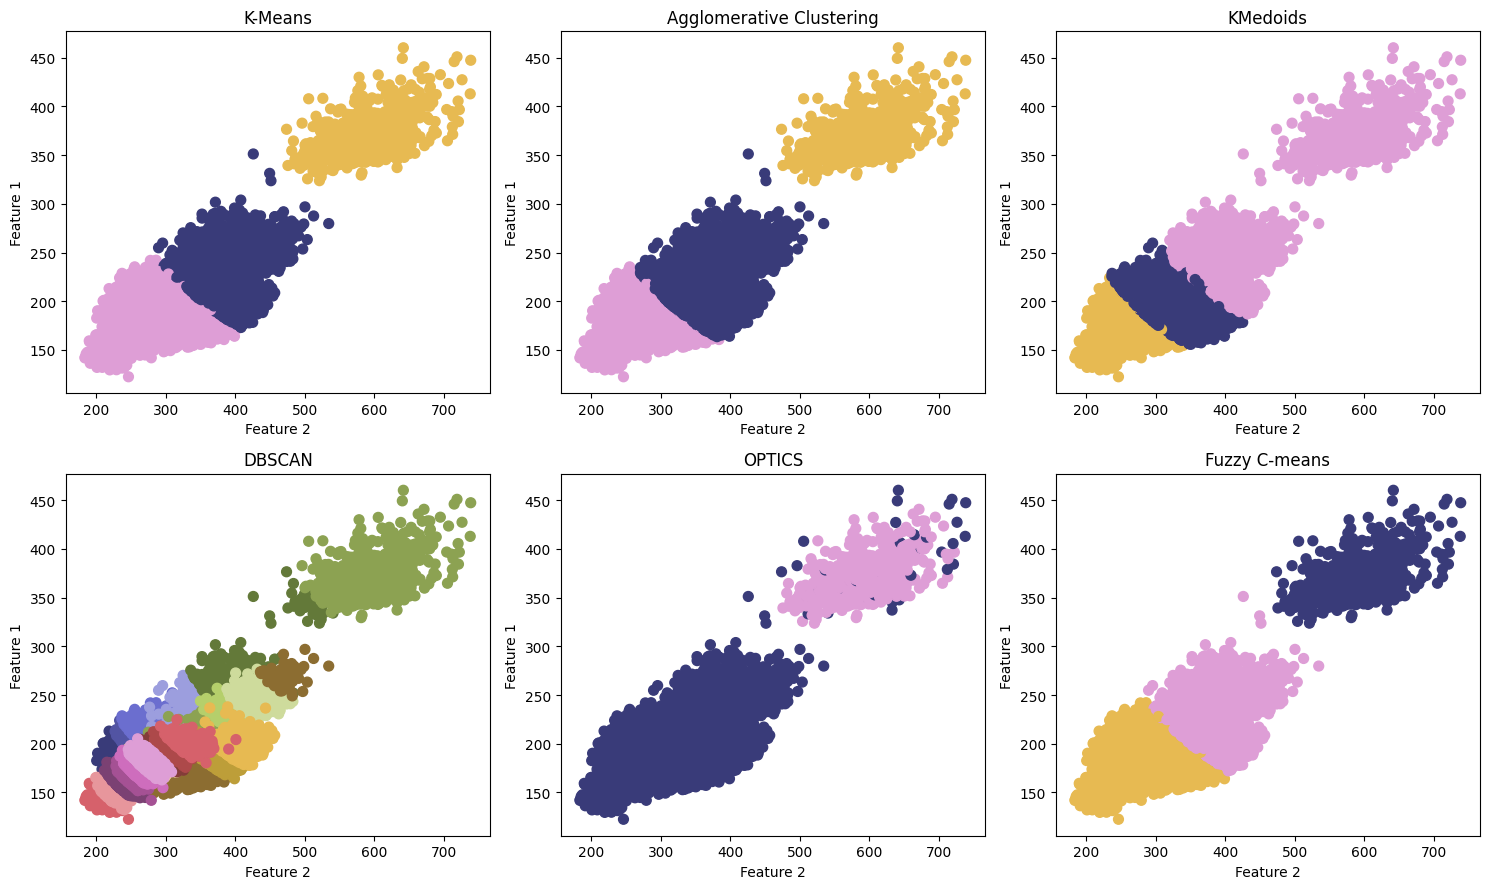

In [120]:
plt.figure(figsize = (15, 9))

plt.subplot(2, 3, 1)
plt.title("K-Means")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmeans, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 2)
plt.title("Agglomerative Clustering")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_hc, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 3)
plt.title("KMedoids")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmc, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 4)
plt.title("DBSCAN")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_dbscan, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 5)
plt.title("OPTICS")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_optics, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 6)
plt.title("Fuzzy C-means")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = fcm_labels, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.tight_layout()
plt.show()

Calculate Silhouette Scores and Davies Bouldin Score

In [121]:
print("Silhouette Scores:\n")
print("K-Means Clustering silhouette: ", silhouette_score(X, y_kmeans))
print("K-Means Clustering davies_bouldin: ", davies_bouldin_score(X, y_kmeans))
print("")
print("Agglomerative Clustering: ", silhouette_score(X, y_hc))
print("Agglomerative Clustering: ", davies_bouldin_score(X, y_hc))
print("")
print("KMedoids Clustering: ", silhouette_score(X, y_kmc))
print("KMedoids Clustering: ", davies_bouldin_score(X, y_kmc))
print("")
print("DBSCAN Clustering: ", silhouette_score(X, y_dbscan))
print("DBSCAN Clustering: ", davies_bouldin_score(X, y_dbscan))
print("")
print("OPTICS Clustering: ", silhouette_score(X, y_optics))
print("OPTICS Clustering: ", davies_bouldin_score(X, y_optics))
print("")
print("Fuzzy C-means Clustering: ", silhouette_score(X, fcm_labels))
print("Fuzzy C-means Clustering: ", davies_bouldin_score(X, fcm_labels))

Silhouette Scores:

K-Means Clustering silhouette:  0.6647284829798941
K-Means Clustering davies_bouldin:  0.401417605872967

Agglomerative Clustering:  0.6108111488137355
Agglomerative Clustering:  0.4610992133842608

KMedoids Clustering:  0.44801645593755496
KMedoids Clustering:  0.7073202663251461

DBSCAN Clustering:  0.00999182510471594
DBSCAN Clustering:  1.5297933880159627e-06

OPTICS Clustering:  0.834240443359346
OPTICS Clustering:  0.25138329297613066

Fuzzy C-means Clustering:  0.6634766822178854
Fuzzy C-means Clustering:  0.40407022302355183


### 4.7.1 Comparision of Clusters in Area and Perimeter features

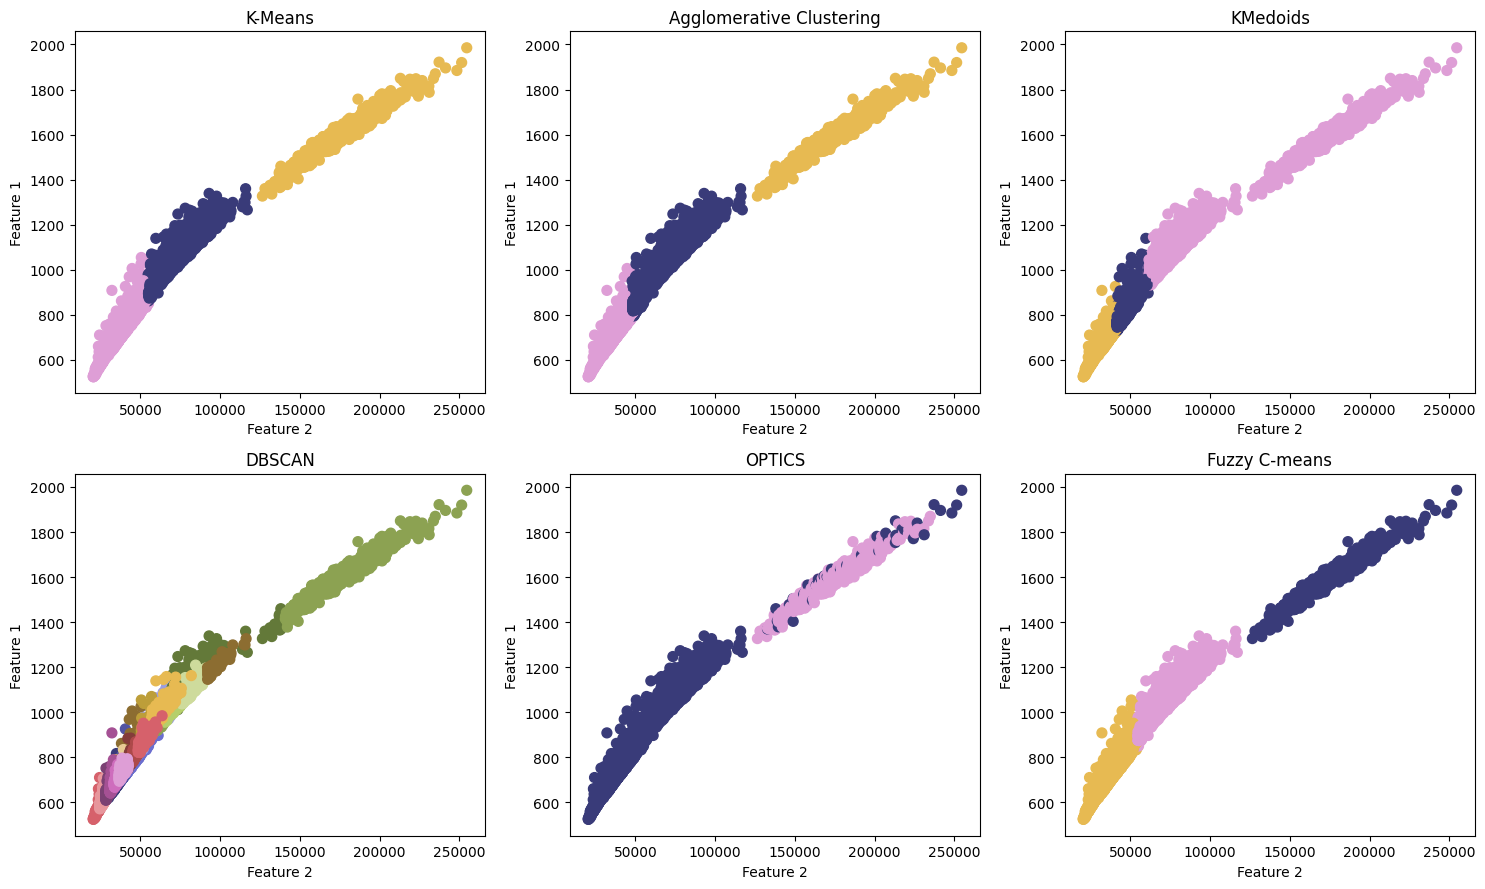

In [122]:
feature1_index = 0 # Area
feature2_index = 1 # Perimeter

plt.figure(figsize = (15, 9))

plt.subplot(2, 3, 1)
plt.title("K-Means")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmeans, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 2)
plt.title("Agglomerative Clustering")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_hc, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 3)
plt.title("KMedoids")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmc, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 4)
plt.title("DBSCAN")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_dbscan, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 5)
plt.title("OPTICS")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_optics, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 6)
plt.title("Fuzzy C-means")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = fcm_labels, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.tight_layout()
plt.show()

### 4.7.2 Comparision of Clusters in ShapeFactor1 and ShapeFactor2 features

In [123]:
feature1_index = 12 # ShapeFactor1
feature2_index = 13 # ShapeFactor2

plt.figure(figsize = (15, 9))

plt.subplot(2, 3, 1)
plt.title("K-Means")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmeans, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 2)
plt.title("Agglomerative Clustering")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_hc, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 3)
plt.title("KMedoids")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmc, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 4)
plt.title("DBSCAN")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_dbscan, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 5)
plt.title("OPTICS")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_optics, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 6)
plt.title("Fuzzy C-means")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = fcm_labels, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.tight_layout()
plt.show()

### 4.7.3 Comparision of Clusters in ShapeFactor3 and ShapeFactor4 features

In [124]:
feature1_index = 14 # ShapeFactor3
feature2_index = 15 # ShapeFactor4

plt.figure(figsize = (15, 9))

plt.subplot(2, 3, 1)
plt.title("K-Means")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmeans, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 2)
plt.title("Agglomerative Clustering")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_hc, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 3)
plt.title("KMedoids")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_kmc, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 4)
plt.title("DBSCAN")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_dbscan, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 5)
plt.title("OPTICS")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = y_optics, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.subplot(2, 3, 6)
plt.title("Fuzzy C-means")
plt.scatter(X[:, feature1_index], X[:, feature2_index], c = fcm_labels, s = 50, cmap = 'tab20b')
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.tight_layout()
plt.show()

**Conclusion**

1.	What are the similarities or dissimilarities between the clusters?

The clusters that have a parameter of “n_clusters” number of clusters seem works better than the other ones, it is the case of K-Means Clustering, Hierarchical Clustering, K-Medoids Clustering and Fuzzy C-Means Clustering, all of them use the values of the features to work, that is not the case of DBSCAN and OPTICS Clustering that does not have a specific parameter for number of clusters, gets the all feature as information and works differently.
The clustering methods K-Means Clustering, Hierarchical Clustering, K-Medoids Clustering and Fuzzy C-Means Clustering work similarly and have better results.

2.	Which clustering solution showed the best performance?

Comparison of the results of the Elbow method, the Silhouette score and the Davies-Bouldin index:

- K-Means Clustering: 4 clusters work well, Elbow method 3 clusters work well, Silhouette 2 clusters and Davies-Bouldin 2 clusters.
- Hierarchical Clustering: 4 clusters work well, 3 clusters work well, Silhouette 2 clusters and Davies-Bouldin 2 clusters.
- K-Medoids Clustering: 5 as predicted seems ok, 3 clusters work well, Silhouette 2 clusters work well and Davies-Bouldin 5 clusters work better than 2 clusters.
- DBSCAN: Difficult to find the best parameter and to work decently.
- OPTICS Clustering: 2 Clusters almost get a good result, also complicate to find the best parameters to use in it.
- Fuzzy C-Means Clustering: 4 clusters work well, 3 clusters work well, Silhouette 3 clusters work well and Davies-Bouldin 3.

Checking the results and the graphics, it seems that the K-Means Clustering, Hierarchical Clustering and Fuzzy C-Means Clustering showed the best performance.

3.	Which clustering algorithm is easy to use?

After analyses, it would recommend the use of K-Means Clustering or Fuzzy C-Means Clustering, but Hierarchical Clustering and K-Medoids Clustering are good choices as well and easy to deal it.

Therefore for segmentation, it would consider to use of K-Means Clustering or Fuzzy C-Means Clustering for simplicity.

# 5. Machine Learning Time Series

To work in Time Series, first, it is important to analyse the data set, to understand and continue working properly with it, first is essential to understand a few properties or components, such as, "Trend, Seasonality, Noise or Irregularity and Cyclicity" and types of series "forecast or residuals". 

- "`Trend`" - A long-term increase (upward) or decrease (downward).
- "`Seasonality`" - When patterns or fixed frequency, seasonal factors and variances, can be derived from an autocorrelation plot if it has a sinusoidal shape.
- "`Noise, Variation, Anomalies or Irregularity`" - Random noises.
- "`Cyclicity`" - Rises and falls that repeat frequently in a long period.

Next, check if the data is "`Stationarity`" or not, this is important before applying any model to get forecasting accurately; the series has to be stationarity, and this normally is checked when the statistical properties do not change over time, should have constant "mean", "variance or standard deviation" and "covariance".

To check, whether the time series is stationary or not, we can use the "`Rolling Statistics`" visually or a statistical "`Dickey-Fuller`" test. 

**Rolling Statistics**
- Plot a moving average or moving standard deviation to see visually if it varies with time.

**Dickey-Fuller or ADCF Test** 
- ($H_0$) The Null hypothesis - if then p > 0, and the process is not stationary, checking Test Statistics and some critical values for confidence levels.
- ($H_1$) hypothesis - Otherwise, p = 0, or less than the critical values, the null hypothesis is rejected, and the process is considered to be stationary.

## 5.1 Time Series - First Steps

Starting to import some libraries such as "`pandas`" to start the project and "`warnings`" to suppress the warnings using a filter of warnings "`warnings.filterwarnings("ignore")`", other libraries will be added at the body of the notebook once needed it with a description.

In [125]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

**Loading Data:**

Creating a Data Frame named "`gold`" after loading the data set "GC=F_historical_Gold.csv" using the command ".read_csv()".

In [126]:
gold = pd.read_csv("GC=F_historical_Gold.csv")

**Inspecting the Data Set**

Getting the "`Head`" of the data frame using the command "`.head()`" and understanding how the first 5 observations were presented as default and the features.

Gold database from 2019-10-24 to 2024-10-24

In [127]:
gold.head()

Date         Open         High          Low        Close  \
0  2019-10-24  1490.500000  1501.199951  1485.900024  1498.900024   
1  2019-10-25  1501.400024  1514.300049  1499.000000  1499.500000   
2  2019-10-28  1504.099976  1504.099976  1490.000000  1490.000000   
3  2019-10-29  1485.900024  1487.000000  1485.900024  1487.000000   
4  2019-10-30  1487.199951  1495.400024  1481.000000  1493.199951   

     Adj Close  Volume  
0  1498.900024     115  
1  1499.500000      93  
2  1490.000000      37  
3  1487.000000     425  
4  1493.199951     320

Getting the "`Null information`" of the data frame using the command "`.isnull().sum()`", checking the missing values in the data frame, there exist no features missing values.

In [128]:
gold.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Checking the "`.info()`" of the database.

In [129]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


Checking the data types of the features

In [130]:
gold.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Converting the feature "Date" to "datetime64", checked in the documentation about the "format" parameter "pandas.to_datetime" (The Pandas Development Team, 2024), and checking once again the data types of the features.

In [131]:
gold["Date"] = pd.to_datetime(gold["Date"], format = "%Y-%m-%d")
gold.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Next, changing the index feature to the "`Date`" feature using the command "`set_index()`", sorting the values just in case using "`sort_index()`", and getting the "Head" of it.

In [132]:
gold.set_index("Date", inplace = True)
gold.sort_index(inplace = True)

gold.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-10-24  1490.500000  1501.199951  1485.900024  1498.900024  1498.900024   
2019-10-25  1501.400024  1514.300049  1499.000000  1499.500000  1499.500000   
2019-10-28  1504.099976  1504.099976  1490.000000  1490.000000  1490.000000   
2019-10-29  1485.900024  1487.000000  1485.900024  1487.000000  1487.000000   
2019-10-30  1487.199951  1495.400024  1481.000000  1493.199951  1493.199951   

            Volume  
Date                
2019-10-24     115  
2019-10-25      93  
2019-10-28      37  
2019-10-29     425  
2019-10-30     320

Creating a filter from "2024-01-01" to "2024-01-31" to analyse the dates and check whether the data set it is daily, weekly, monthly, etc., and in this case seems a daily data set, not working on weekends just in the business days.

In [133]:
# gold["2024-01-01" : "2024-01-31"]

Next, creating a copy of the "gold" data frame to a new data frame called "gold_outliers" to check and deal with outliers.

In [134]:
gold_outliers = gold.copy()

Importing "seaborn" and "matplotlib.pyplot" in "5 topic" to create visualisations.

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

Creating a boxplot of the "Close" feature to check outliers.

In [136]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = gold_outliers["Close"])
plt.show()

Next, using the IQR (Interquartile Range) Scoring technique to detect and remove any outliers.

In [137]:
Q1 = gold_outliers["Close"].quantile(0.25)
Q3 = gold_outliers["Close"].quantile(0.75)
IQR = Q3 - Q1

gold_outliers = gold_outliers[~((gold_outliers[["Close"]] < (Q1 - 1.5 * IQR)) | (gold_outliers[["Close"]] > (Q3 + 1.5 * IQR))).any(axis = 1)]

Creating a boxplot of the "Close" feature to check the outliers after dealing with it.

In [138]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = gold_outliers["Close"])
plt.show()

Next, it creating a Line plot for a comparison before and after removing outliers.

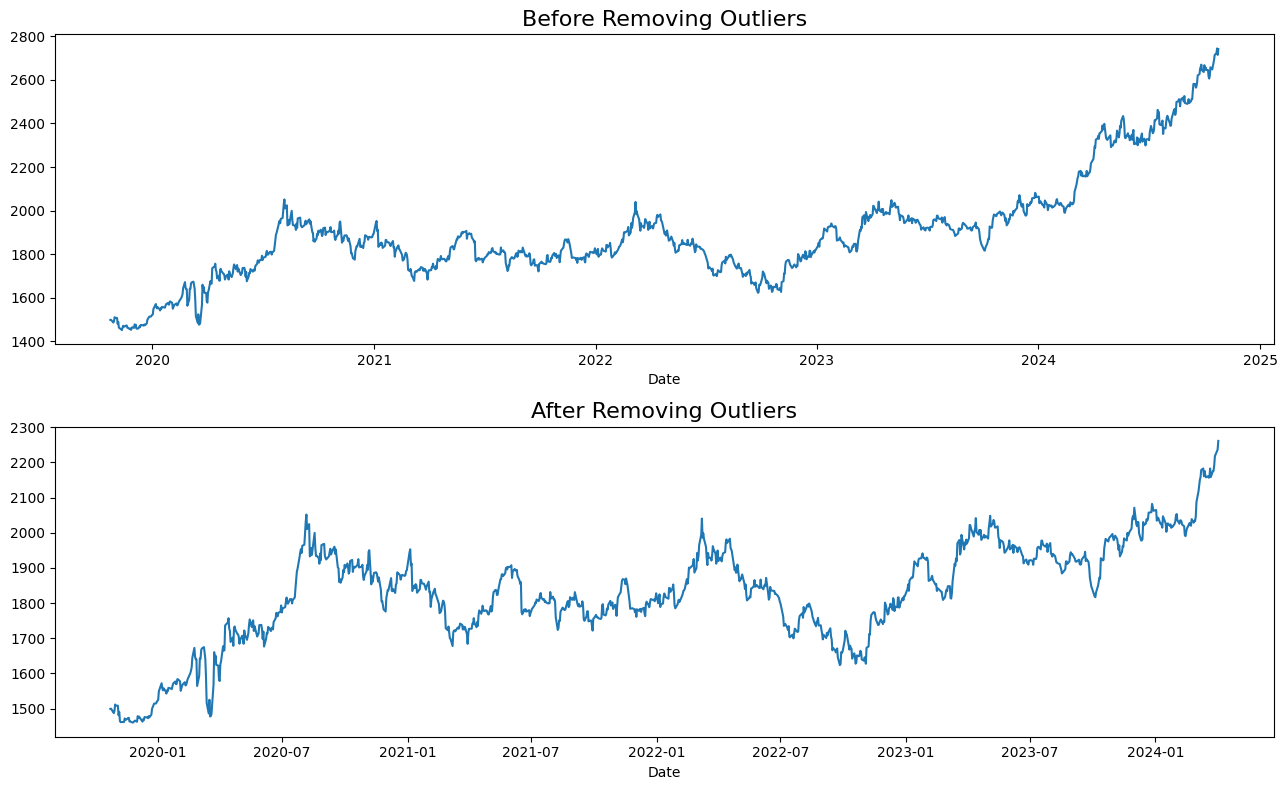

In [139]:
plt.figure(figsize = (13, 8))

plt.subplot(2, 1, 1)
plt.title("Before Removing Outliers",  size = 16)
plt.plot(gold["Close"]);
plt.xlabel("Date")

plt.subplot(2, 1, 2)
plt.title("After Removing Outliers",  size = 16)
plt.plot(gold_outliers["Close"]);
plt.xlabel("Date")

plt.tight_layout()
plt.show()

## 5.2 Time Series (Analysis)

After the first steps and analysis of the data set, it starts the analysis by creating a new Data Frame named "`df`" after loading the data set "GC=F_historical_Gold.csv" using the command ".read_csv()", converting the column "Date" to DateTime, next setting it as feature index in a new data frame called "`gold`" and drop the other columns to make easy to plot the graphics where the x-axis it will be the "Date" feature and the y-axis the "Close" feature, and getting a "Head" of it.

In [140]:
df = pd.read_csv("GC=F_historical_Gold.csv")

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True) 
gold = df.set_index(['Date'])
gold = gold.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1)
gold.head(5)

Close
Date                   
2019-10-24  1498.900024
2019-10-25  1499.500000
2019-10-28  1490.000000
2019-10-29  1487.000000
2019-10-30  1493.199951

Testing of removing outliers from the "Close" feature, left commented.

In [141]:
# Q1 = gold["Close"].quantile(0.25)
# Q3 = gold["Close"].quantile(0.75)
# IQR = Q3 - Q1

# gold = gold[~((gold[["Close"]] < (Q1 - 1.5 * IQR)) | (gold[["Close"]] > (Q3 + 1.5 * IQR))).any(axis = 1)]

### 5.2.1 Time Series (Analysis) **`Trend + Seasonality + Residuals**`** checks

Next, using a simple plot to visualise the "Closing" value of Gold for the last five years.

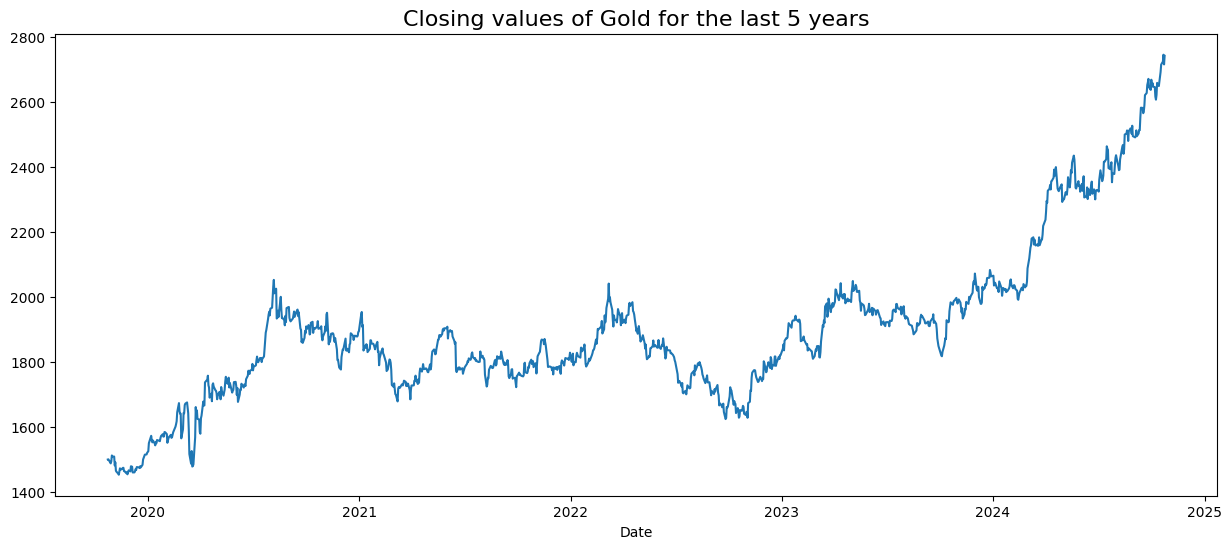

In [142]:
plt.figure(figsize = (15, 6))

plt.title("Closing values of Gold for the last 5 years",  size = 16)
plt.plot(gold);
plt.xlabel("Date")

plt.show()

Importing "seasonal_decompose" from "statsmodels.tsa.seasona" in "5 topic".

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose

- **Problem:** ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

The dates there are no associated frequencies like daily, weekly, monthly, and so on, but we can resolve it by adding a parameter of time called "period", learned after reading a forum question on stack overflow "decompose() for time series: ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None" (and_and, 2020).

In [144]:
gold.interpolate(inplace = True)

# decompose the data using seasonal_decompose() function
decomposition = seasonal_decompose(gold, model = 'additive', period = 12)

# Plot the function using plot()
decomposition.plot()

plt.show()

In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

The "plotds" is a method created to plot time series, Autocorrelation (ACF) and Partial Autocorrelation (PACF)

In [146]:
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize = fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 30, ax = ax_acf)
    plot_pacf(xt, lags = 30, ax = ax_pacf)
    plt.tight_layout()
    return None

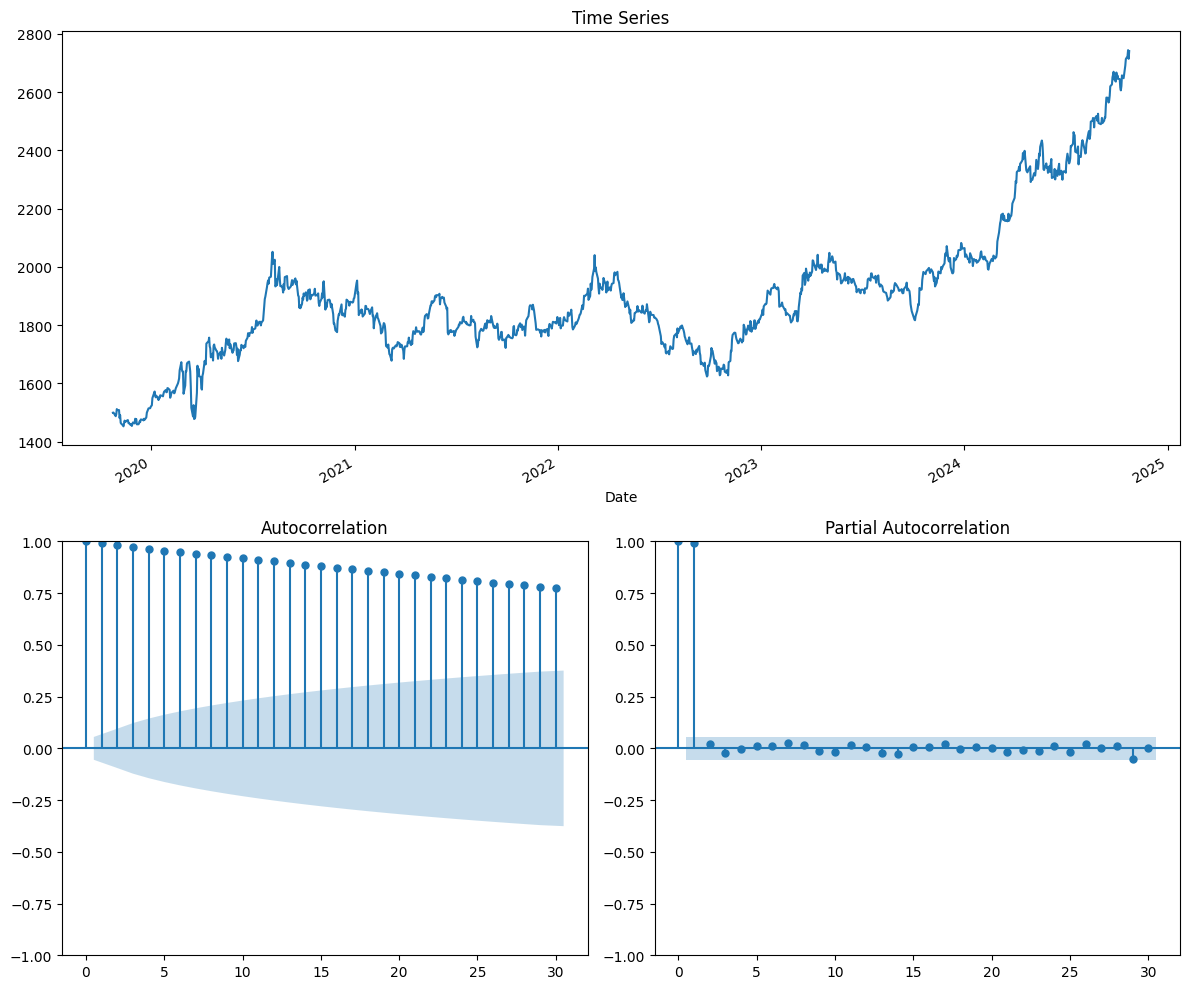

In [147]:
plotds(gold['Close'])

- **`Trend`**, about trends, analysing the graphics, it is possible to see visually that there exists a trend, a long-term increase in the data.

- **`Seasonality`**, about Seasonality, analysing the graphics, it is possible to see visually that there exists no Seasonality with cyclical patterns of fixed frequency.
  
- **`Noise, Variation, Anomalies or Irregularity`**, There exists.

- **`Cyclicity`** - There are rises and falls that occur but do not repeat frequently over a long period.

### 5.2.2 Time Series (Analysis) **`Stationarity`** Rolling Statistics checks

Next, using the method "rolling" to observe the moving average, considering 12 consecutive data points or months at a time, giving a yearly level for rolling "mean, var and std".

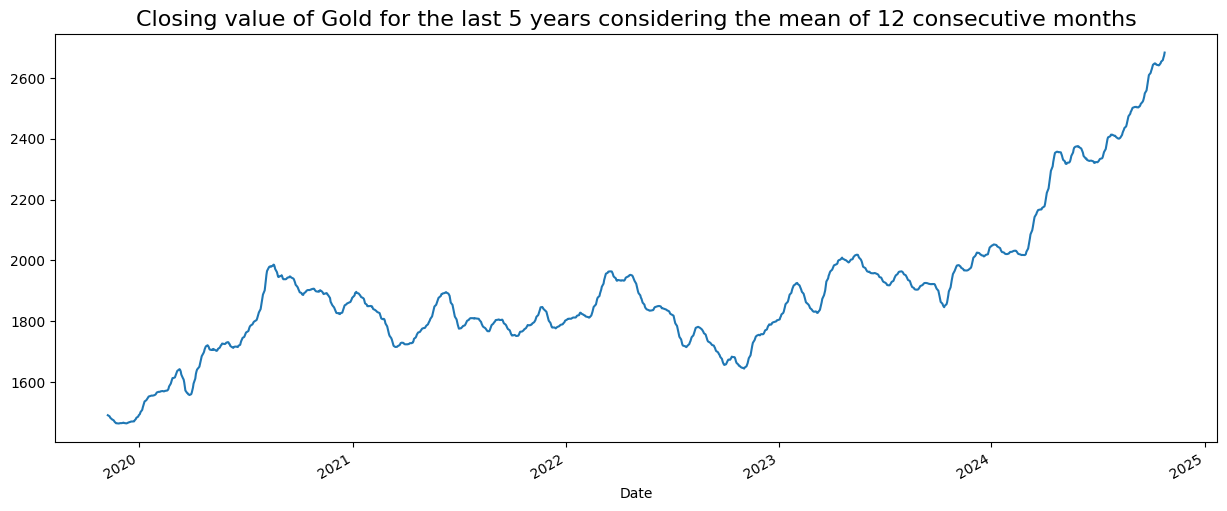

In [148]:
plt.figure(figsize = (15, 6))

plt.title("Closing value of Gold for the last 5 years considering the mean of 12 consecutive months", size = 16)
gold["Close"].rolling(window = 12).mean().plot()
plt.xlabel("Date")

plt.show()

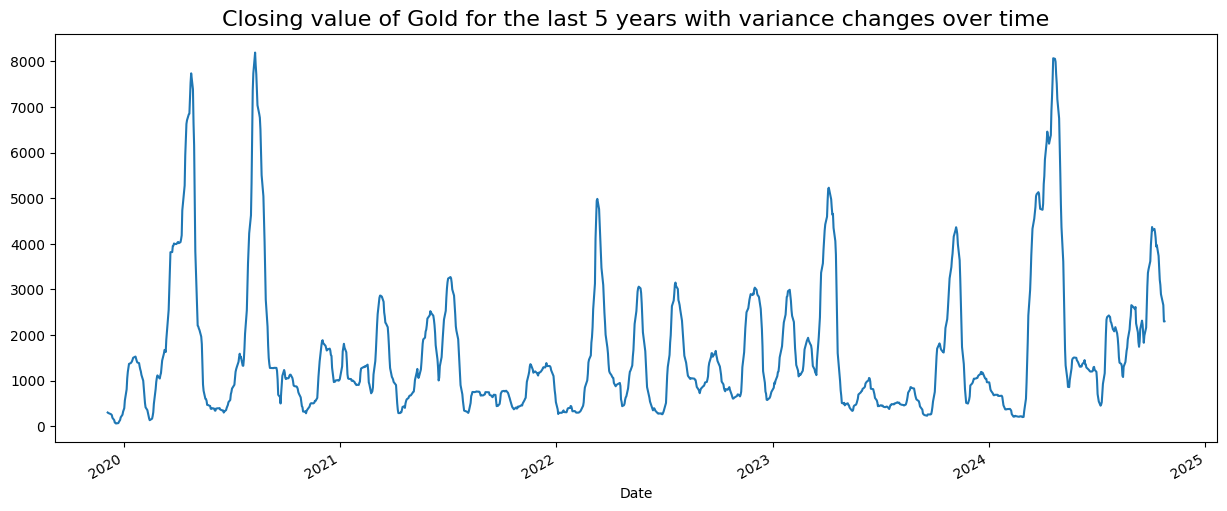

In [149]:
plt.figure(figsize = (15, 6))

plt.title("Closing value of Gold for the last 5 years with variance changes over time", size = 16)
gold["Close"].rolling(window = 30).var().plot()
plt.xlabel("Date")

plt.show()

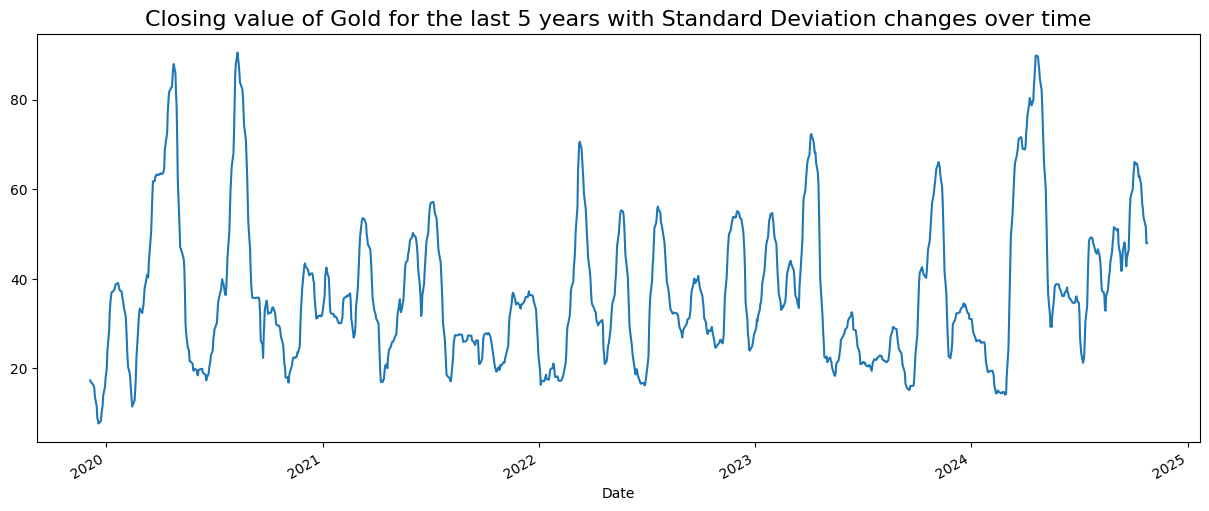

In [150]:
plt.figure(figsize = (15, 6))

plt.title("Closing value of Gold for the last 5 years with Standard Deviation changes over time", size = 16)
gold["Close"].rolling(window = 30).std().plot()
plt.xlabel("Date")

plt.show()

#### 5.2.2.1 Time Series (Analysis) **`Stationarity`** Dickey-Fuller checks

Determine the rolling statistics with "mean and std", the example below learned on the "Kaggle" website, "Time Series For beginners with ARIMA" (Arindam Chatterjee, 2018).

In [151]:
rolmean = gold.rolling(window = 12).mean()
rolstd = gold.rolling(window = 12).std()

print(rolmean, rolstd)

                  Close
Date                   
2019-10-24          NaN
2019-10-25          NaN
2019-10-28          NaN
2019-10-29          NaN
2019-10-30          NaN
...                 ...
2024-10-18  2652.900024
2024-10-21  2658.400024
2024-10-22  2666.600016
2024-10-23  2672.400004
2024-10-24  2682.875000

[1259 rows x 1 columns]                 Close
Date                 
2019-10-24        NaN
2019-10-25        NaN
2019-10-28        NaN
2019-10-29        NaN
2019-10-30        NaN
...               ...
2024-10-18  30.935073
2024-10-21  37.018638
2024-10-22  44.179556
2024-10-23  45.603107
2024-10-24  45.656318

[1259 rows x 1 columns]


Plotting rolling statistics with "Mean and Standard Deviation", the example below learned on the "Kaggle" website, "Time Series For beginners with ARIMA" (Arindam Chatterjee, 2018).

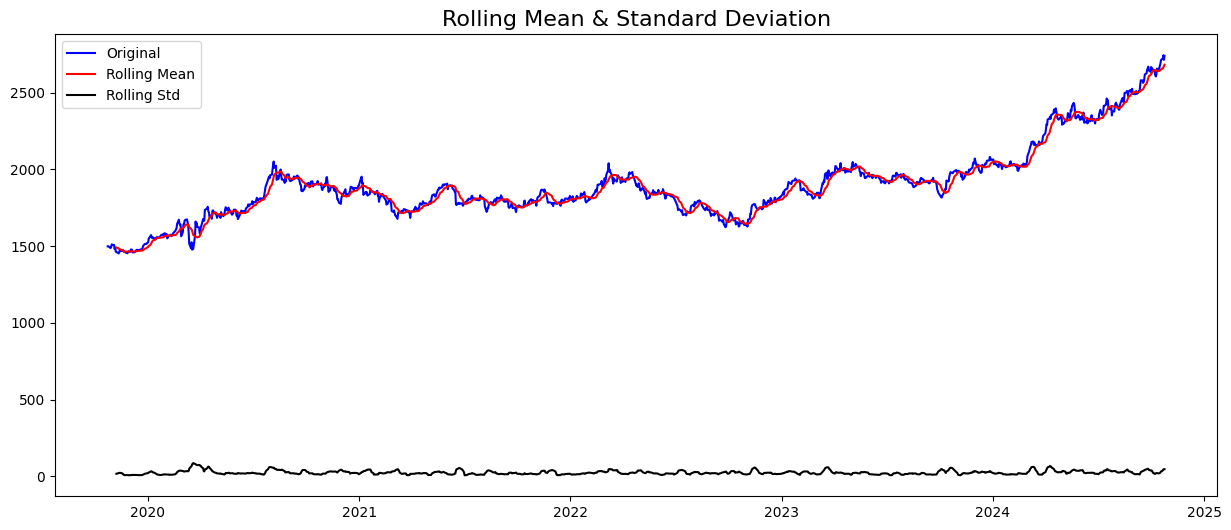

In [152]:
plt.figure(figsize = (15, 6))

plt.title('Rolling Mean & Standard Deviation', size = 16)

orig = plt.plot(gold, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')

plt.show()

It is possible to visualise that the rolling mean has a trend over time even though the rolling standard deviation is basically constant with time, then we deduce that it is necessary to make a time series stationary, keeping the mean and standard deviation invariant or constant with time.

Importing the method “adfuller” from "statsmodels.tsa.stattools" in “5 topic”.

In [153]:
from statsmodels.tsa.stattools import adfuller

Perform the Augmented Dickey-Fuller test to confirm if the time series is not stationary, the example below learned on the "Kaggle" website, "Time Series For beginners with ARIMA" (Arindam Chatterjee, 2018).

In [154]:
print('Results of Dickey Fuller Test:')

dftest = adfuller(gold, autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s) ' %key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    0.317946
p-value                           0.978153
#Lags Used                        0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64


After Stationarity Rolling Statistics and Stationarity Dickey-Fuller analysis, it was noted that the time series is not stationary, once "For a Time series to be stationary, its ADCF test should have:" 

1. "p-value to be low (according to the null hypothesis)".
2. "The critical values at 1%, 5%, 10% confidence intervals should be as close as possible to the Test Statistics." (Arindam Chatterjee, 2018)

In the results, the p-value is higher than 0, in this case, **0.97**, and the critical values "-3.43, -2.86, -2.56" are far from the Test Statistic value **0.31**, at the moment, we can consider that the time series is not stationary, so we fail to reject the ($H_0$) null hypothesis.

Next, testing a few data transformations to achieve a stationary data series.

#### 5.2.2.2 Time Series (Analysis) **Stationary Time series** Log Scale Transformation

There are some ways to transform the time series to achieve stationarity, such as "$log_10$, $log_e$, square, square root, cube, cube root, exponential decay, time shift", and so on. (Arindam Chatterjee, 2018).

In this case, it is going to be used the log transformation, to remove the trend component.

Importing the library "numpy" in "5 topic", to use the method log.

In [155]:
import numpy as np

Applying a method to get rid of time-varying variance, in this case, using a log transformation to punish larger values more than smaller values, before 1400 to 2800 and now 7.3 to 7.9.

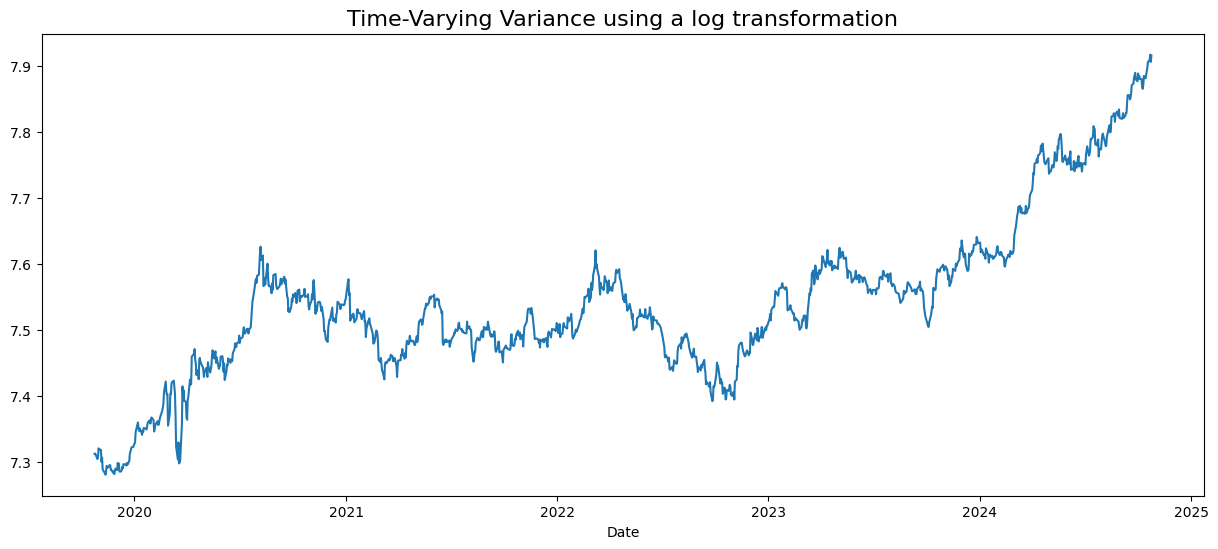

In [156]:
# log_gold = gold.Close.apply(lambda x: np.log(x))
log_gold = np.log(gold).copy()
# log_gold = np.sqrt(gold["Close"]) #Worst

plt.figure(figsize = (15, 6))

plt.title("Time-Varying Variance using a log transformation", size = 16)
plt.plot(log_gold)
plt.xlabel("Date")

plt.show()

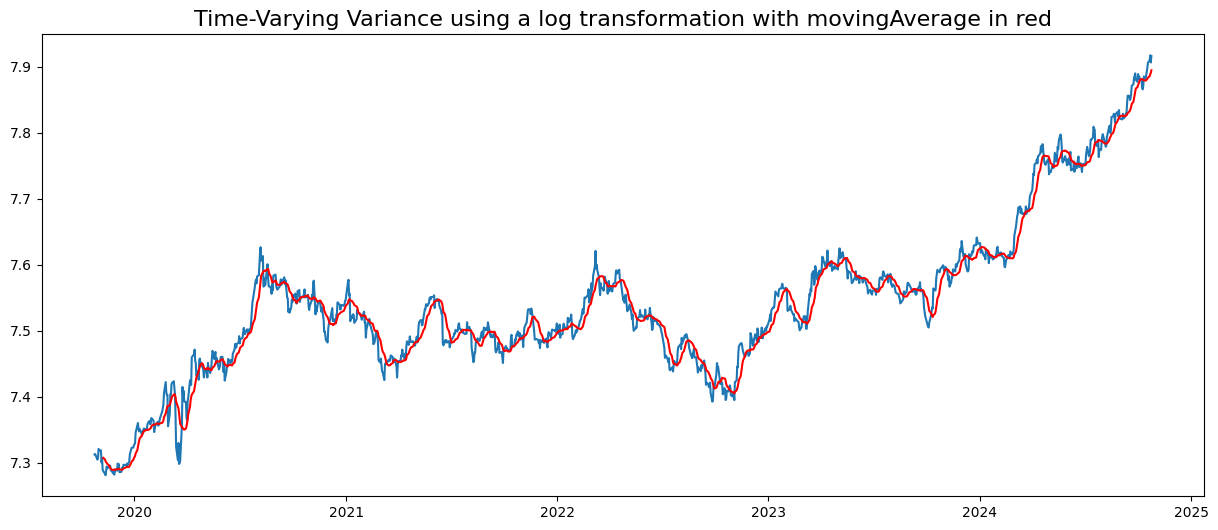

In [157]:
plt.figure(figsize = (15, 6))

plt.title("Time-Varying Variance using a log transformation with movingAverage in red", size = 16)

movingAverage = log_gold.rolling(window = 12).mean()
movingSTD = log_gold.rolling(window = 12).std()

plt.plot(log_gold)
plt.plot(movingAverage, color = 'red')

plt.show()

Analysing the graphic, "we see that even though rolling mean is not stationary, it is still better than the previous case, where no transformation were applied to series." (Arindam Chatterjee, 2018). Also, it is noted that both case has a trend component, so it is possible to remove the trend component of both scenarios.

Subtract this rolling mean from the original series and plotting it.

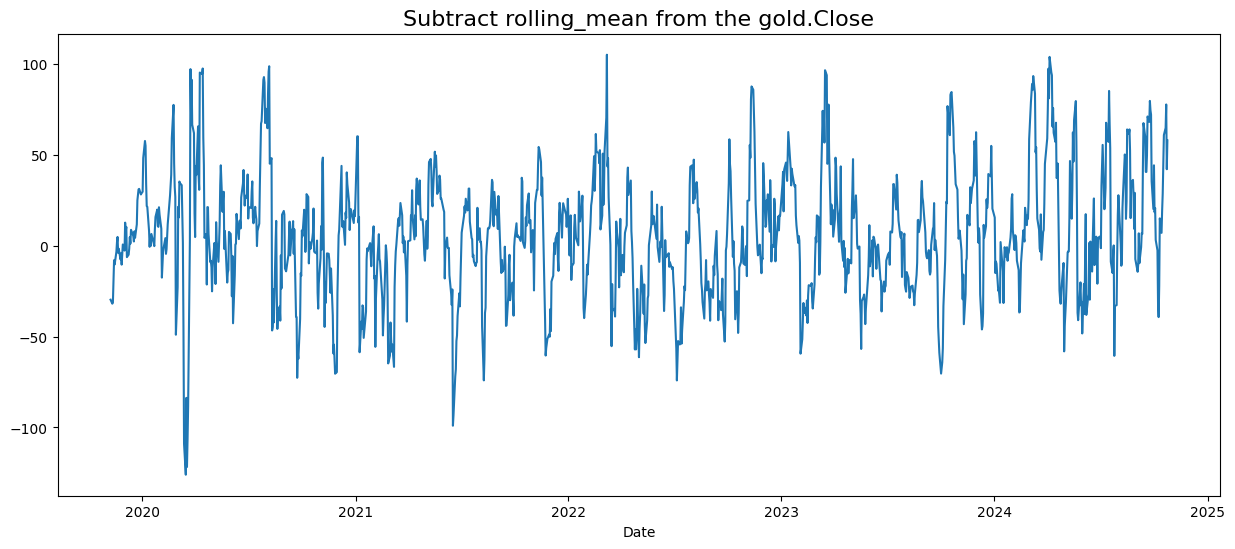

In [158]:
rolling_mean = gold.rolling(window = 12).mean()

gold_detrended = gold - rolling_mean

plt.figure(figsize = (15, 6))

plt.title("Subtract rolling_mean from the gold.Close", size = 16)
plt.plot(gold_detrended)
plt.xlabel("Date")

plt.show()

Detrending after taking the log

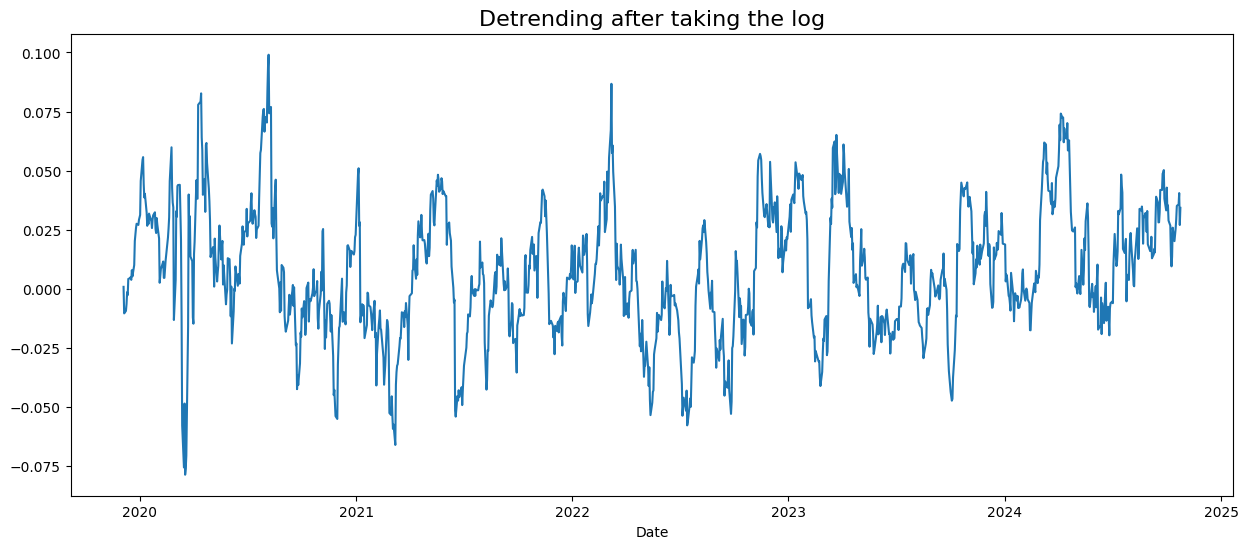

In [159]:
log_rolling_mean = log_gold.rolling(window = 30).mean()
log_detrended = log_gold - log_rolling_mean

plt.figure(figsize = (15, 6))

plt.title("Detrending after taking the log", size = 16)
plt.plot(log_detrended)
plt.xlabel("Date")

plt.show()

Doing the same, but now, dropping the null values and creating a function to plot the results, first, subtract this rolling mean from the original series, drop null values, and store in a variable called "goldLogScaleMinusMovingAverage".

In [160]:
goldLogScaleMinusMovingAverage = log_gold - movingAverage
goldLogScaleMinusMovingAverage.dropna(inplace = True)

Next, creates a function called "test_stationarity" to Plotting rolling statistics with "Mean and Standard Deviation" and Perform the Augmented Dickey-Fuller test, the example below learned on the "Kaggle" website, "Time Series For beginners with ARIMA" (Arindam Chatterjee, 2018).

In [161]:
def test_stationarity(timeseries):
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistics
    plt.figure(figsize = (15, 6))
    
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries["Close"], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

Calling the function to test the results of "goldLogScaleMinusMovingAverage"

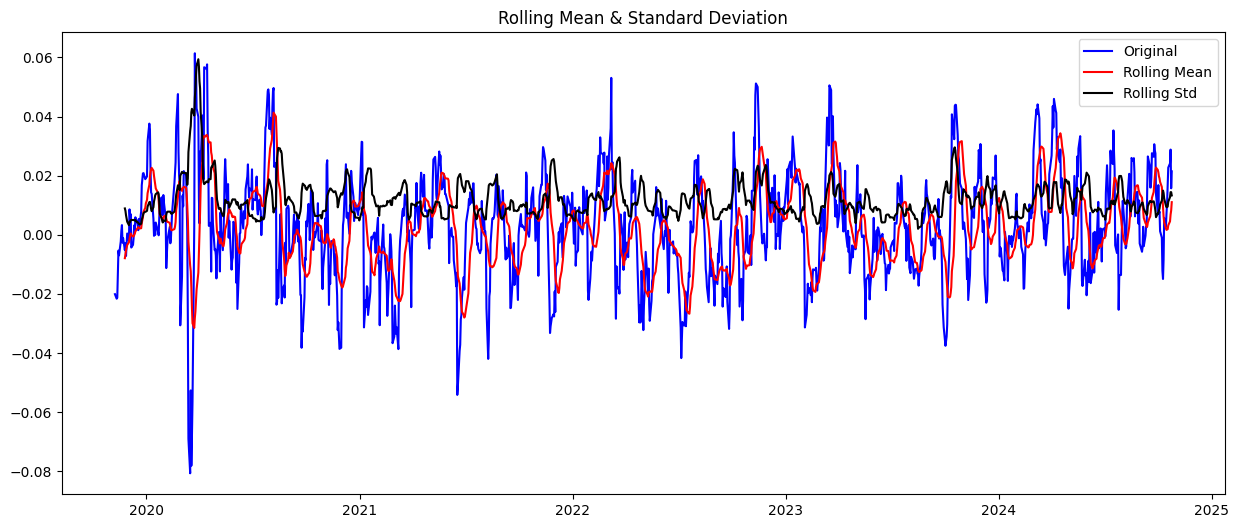

Results of Dickey Fuller Test:
Test Statistic                -9.252910e+00
p-value                        1.475726e-15
#Lags Used                     1.300000e+01
Number of Observations Used    1.234000e+03
Critical Value (1%)           -3.435660e+00
Critical Value (5%)           -2.863885e+00
Critical Value (10%)          -2.568019e+00
dtype: float64


In [162]:
test_stationarity(goldLogScaleMinusMovingAverage)

From the above visualisation, it is possible to check that "subtracting two related series having similar trend components will make the result stationary" (Arindam Chatterjee, 2018), but for any reason did not work well, at this time.

1. "p-value has increased from **0.97** to **1.47** using log".
2. "The critical values at 1%, 5%, and 10% confidence intervals are far from the Test Statistic.

The Data series is still far from stationary.

Next, it trying other data transformations to achieve a stationary data series.

#### 5.2.2.3 Time Series (Analysis) **Stationary Time series** Exponential Decay Transformation 

Next, checking with the "Decay Transformation" to see if get better results.

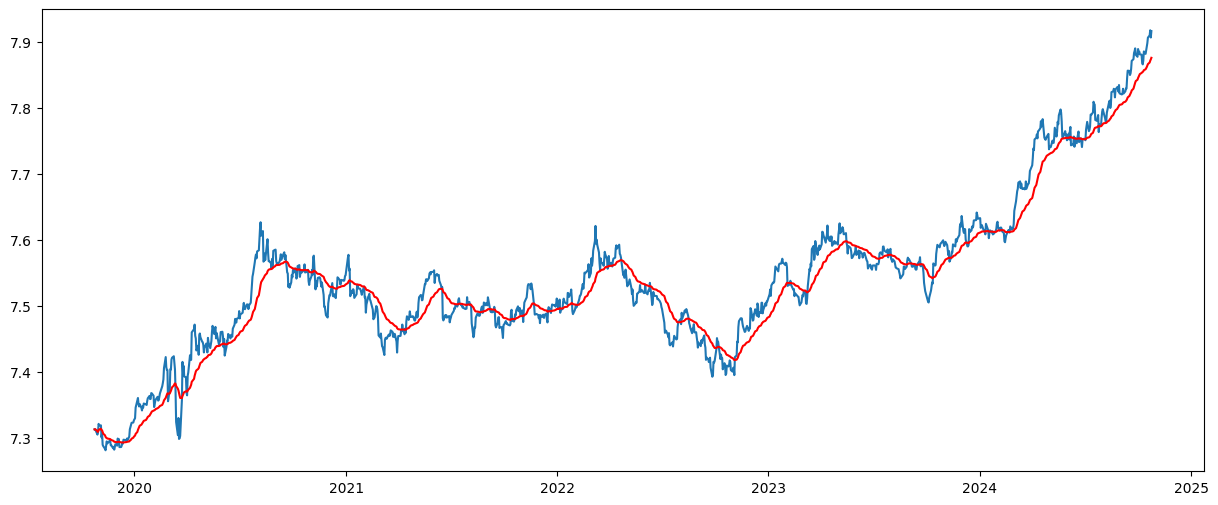

In [163]:
plt.figure(figsize = (15, 6))

exponentialDecayWeightedAverage = log_gold.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(log_gold)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

plt.show()

From the graphic above, it looks like the exponential decay is not better than the log scale; next, subtract the rolling mean or average and plot it.

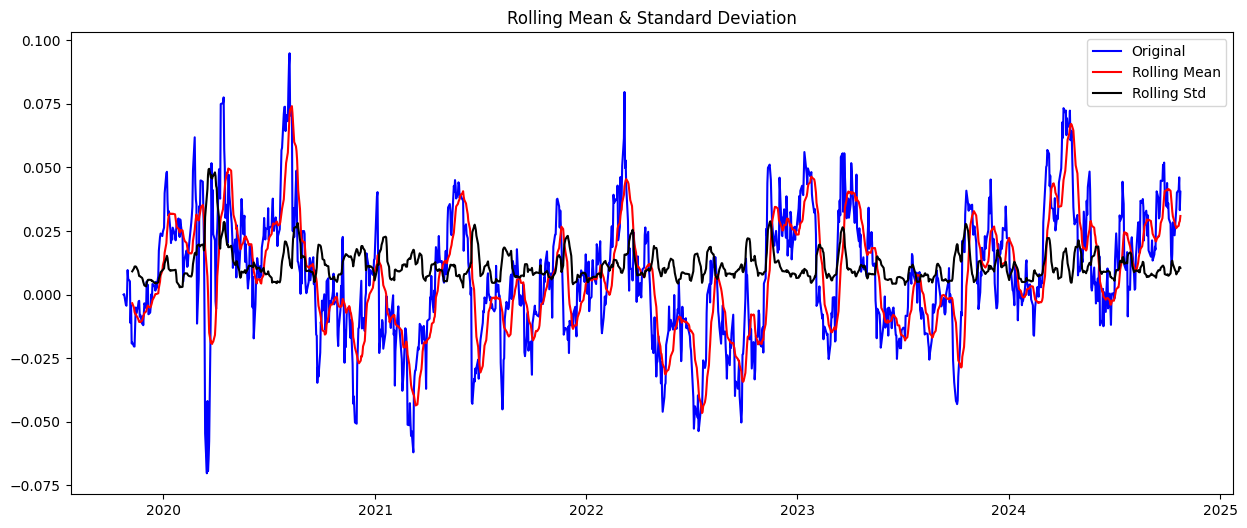

Results of Dickey Fuller Test:
Test Statistic                -6.943714e+00
p-value                        1.009724e-09
#Lags Used                     0.000000e+00
Number of Observations Used    1.258000e+03
Critical Value (1%)           -3.435559e+00
Critical Value (5%)           -2.863840e+00
Critical Value (10%)          -2.567995e+00
dtype: float64


In [164]:
goldLogScaleMinusExponentialMovingAverage = log_gold - exponentialDecayWeightedAverage
test_stationarity(goldLogScaleMinusExponentialMovingAverage)

From the above visualisation, it seems that the results got a little better.

1. "p-value has increased from **0.97**, **1.47** using log to **1.00** using exp decay".
2. "The critical values at 1%, 5%, and 10% confidence intervals are far from the Test Statistic.

The Data series is still far from stationary.

Next, it trying other data transformations to achieve a stationary data series.

#### 5.2.2.4 Time Series (Analysis) **Stationary Time series** Time Shift Transformation

Next, checking with a common technique for differencing, which will be "Time Shift Transformation" to see if get better results.

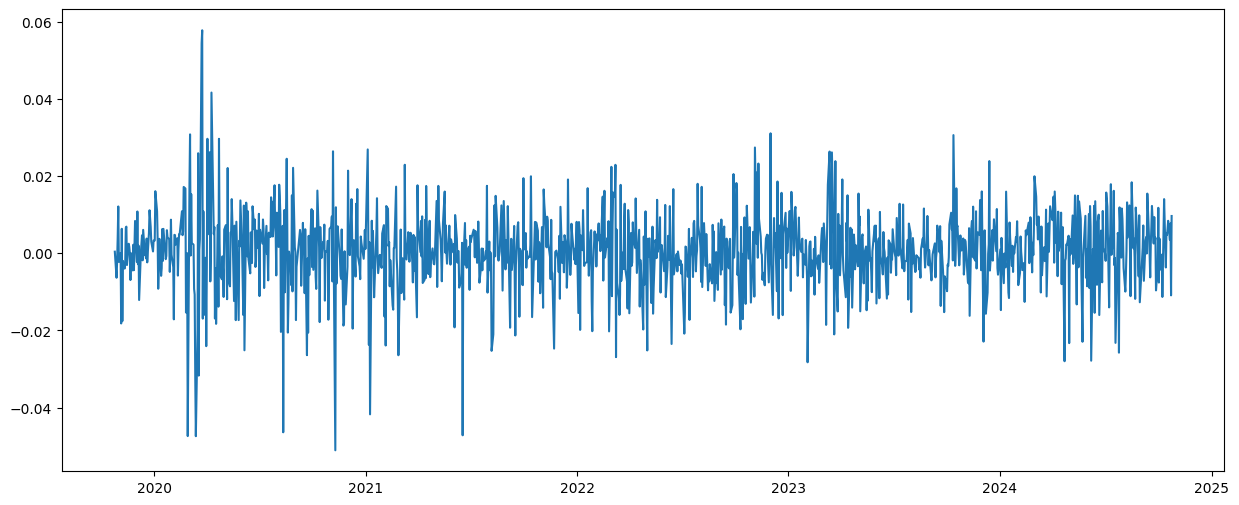

In [165]:
plt.figure(figsize = (15, 6))

goldLogDiffShifting = log_gold - log_gold.shift()
plt.plot(goldLogDiffShifting)

plt.show()

From the graphic above, it looks like the Time Shift Transformation is not better than the log scale or exponential decay; next, subtract the rolling mean or average and plot it.

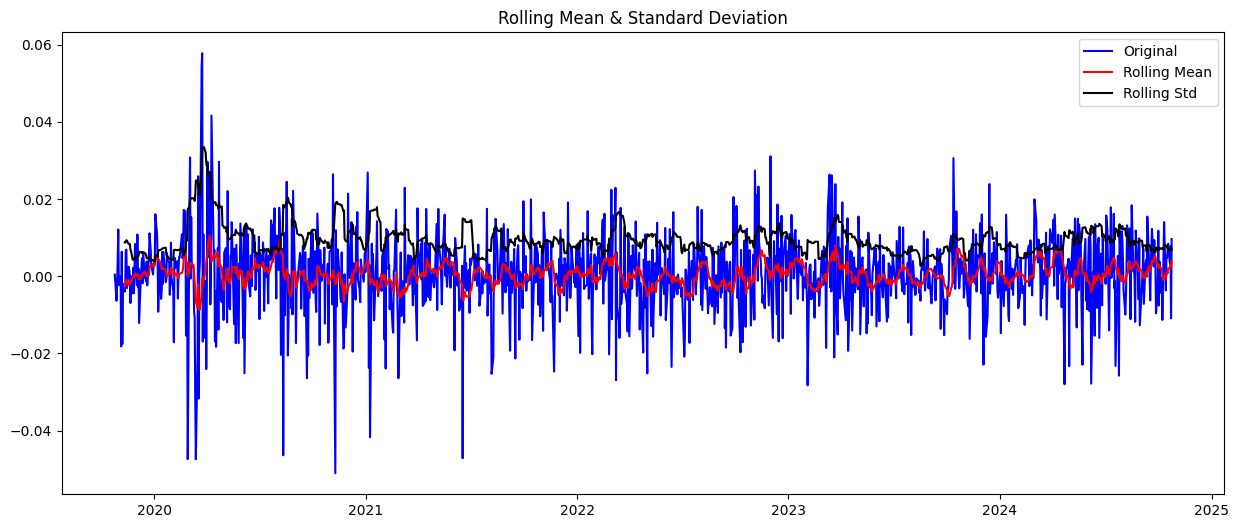

Results of Dickey Fuller Test:
Test Statistic                -1.532324e+01
p-value                        4.037495e-28
#Lags Used                     6.000000e+00
Number of Observations Used    1.251000e+03
Critical Value (1%)           -3.435588e+00
Critical Value (5%)           -2.863853e+00
Critical Value (10%)          -2.568002e+00
dtype: float64


In [166]:
goldLogDiffShifting.dropna(inplace = True)
test_stationarity(goldLogDiffShifting)

From the above visualisation, it seems that the results got worse.

1. "p-value has increased from **0.97**, **1.47** using log, **1.00** using exp decay to **4.03** using time shift".
2. "The critical values at 1%, 5%, and 10% confidence intervals are far from the Test Statistic.

The Data series is still far from stationary.

Even though it tried the three different transformations, log, exp decay and time shift, the results were not very good, it will keep the log results once is possible to revert to the original scale during forecasting in case needed.

Next, it decomposes into three components from the log scale, which will ignore the trend and seasonality and keep checking just the residual component, the example below is learned on the "Kaggle" website, "Time Series For beginners with ARIMA" (Arindam Chatterjee, 2018).

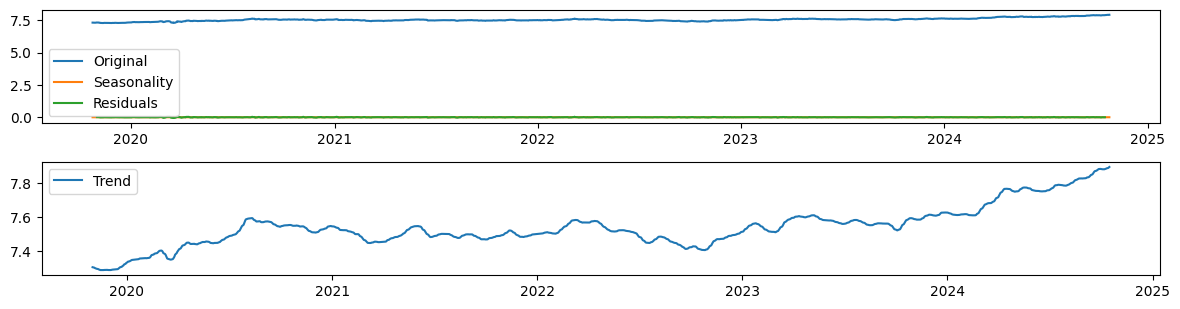

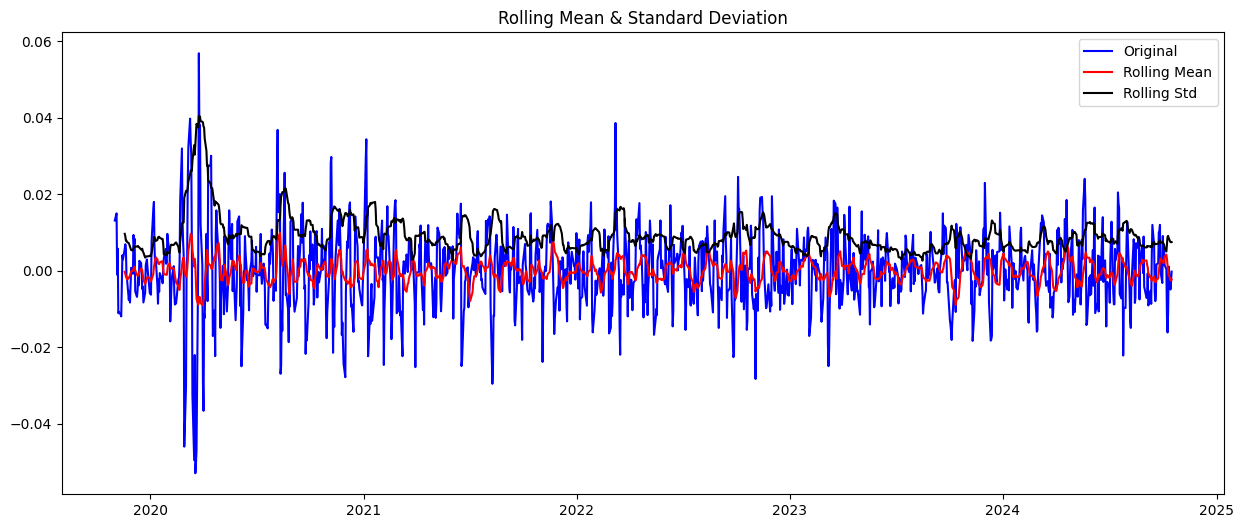

Results of Dickey Fuller Test:
Test Statistic                -1.285176e+01
p-value                        5.334428e-24
#Lags Used                     2.200000e+01
Number of Observations Used    1.224000e+03
Critical Value (1%)           -3.435704e+00
Critical Value (5%)           -2.863904e+00
Critical Value (10%)          -2.568029e+00
dtype: float64


In [167]:
plt.figure(figsize = (12, 6))

decomposition = seasonal_decompose(log_gold, period = 12) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_gold, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(411)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')

plt.tight_layout()

# there can be cases where an observation simply consisted of trend & seasonality. 
# In that case, there won't be any residual component & that would be a null or NaN. 
# Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
decomposedLogData = pd.DataFrame(residual).rename({"resid": "Close"}, axis = 1)

test_stationarity(decomposedLogData)

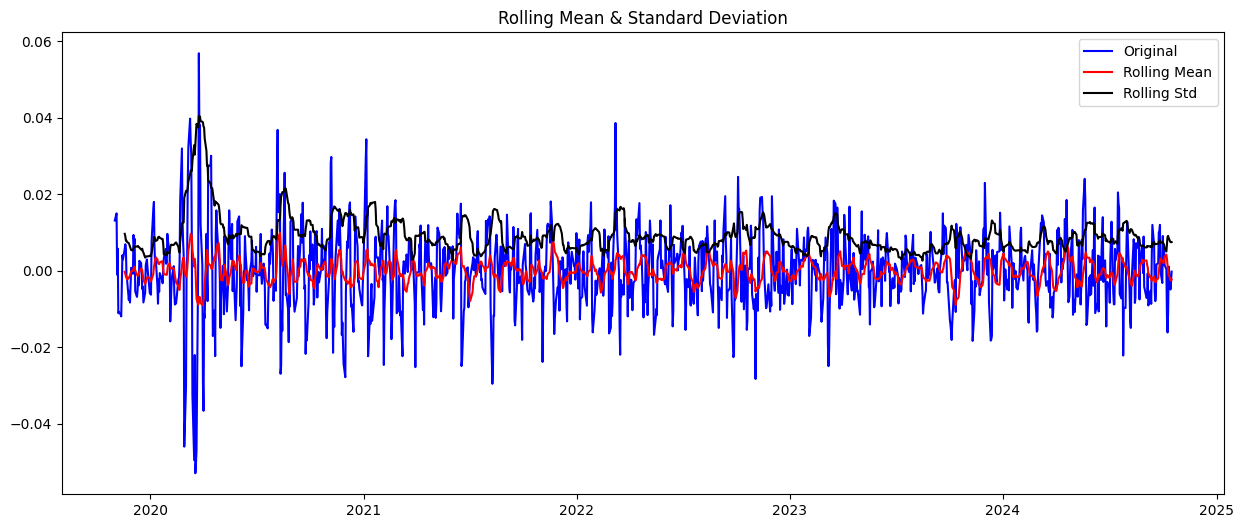

Results of Dickey Fuller Test:
Test Statistic                -1.285176e+01
p-value                        5.334428e-24
#Lags Used                     2.200000e+01
Number of Observations Used    1.224000e+03
Critical Value (1%)           -3.435704e+00
Critical Value (5%)           -2.863904e+00
Critical Value (10%)          -2.568029e+00
dtype: float64


In [168]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
decomposedLogData = pd.DataFrame(residual).rename({"resid": "Close"}, axis = 1)

test_stationarity(decomposedLogData)

#### 5.2.2.5 Time Series (Analysis) **Stationary Time series** ACF and PACF

Plotting ACF and PACF to check the presence of seasonality and the q (MA) parameter number and PACF to identify the p (AR) parameter number.

Importing "acf and pacf" from "statsmodels.tsa.stattools" in "5 topic".

In [169]:
from statsmodels.tsa.stattools import acf, pacf

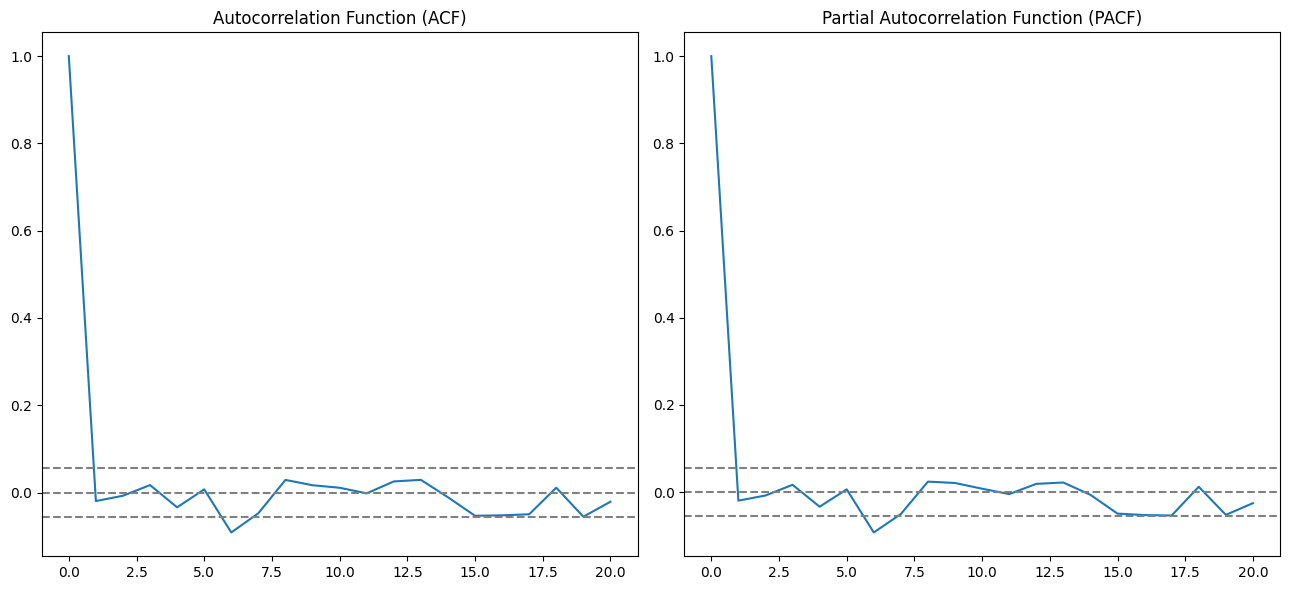

In [170]:
#ACF & PACF plots
plt.figure(figsize = (13, 6))

lag_acf = acf(goldLogDiffShifting, nlags = 20)
lag_pacf = pacf(goldLogDiffShifting, nlags = 20, method = 'ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96 / np.sqrt(len(goldLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96 / np.sqrt(len(goldLogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function (ACF)')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96 / np.sqrt(len(goldLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96 / np.sqrt(len(goldLogDiffShifting)), linestyle = '--', color = 'gray')

plt.title('Partial Autocorrelation Function (PACF)')
            
plt.tight_layout()      

Analysing the Autocorrelation Function (ACF) graphic, the curve touches the y = 0.0 line at x = 1.25. 

Thus, from theory, Q = 2 From the Partial Autocorrelation Function (PACF) graphic, the curve touches the y = 0.0 line at x = 1.5. Thus, from theory, P = 5.

Once checked and confirmed that the time series data is non-stationary, instead of the "ARMA" model, it will be tested the "ARIMA" model for non-stationary cases.

## 5.3 Time Series ARIMA 

**`ARIMA`**
- **AR** (Autoregression) - **p** value
- **I** (Integrated)
- **MA** (Moving Average) - **q** value

1. p: The number of lag observations included in the model called the lag order.
2. d: The number of times that the raw observations are differenced called degree of differencing.
3. q: The size of the moving average window called the order of moving average.

Dropping the first row of the "Close" feature where has "NaN" value and getting the head of it.

In [171]:
first_order_diff = gold['Close'].diff(1).dropna()

first_order_diff.head()

Date
2019-10-25     0.599976
2019-10-28    -9.500000
2019-10-29    -3.000000
2019-10-30     6.199951
2019-10-31    18.200073
Name: Close, dtype: float64

Next plotting a line plot of "Close values of GOLD during Oct 2019 - Oct 2024" and "First-order differences of Gold during Oct 2019 - Oct 2024".

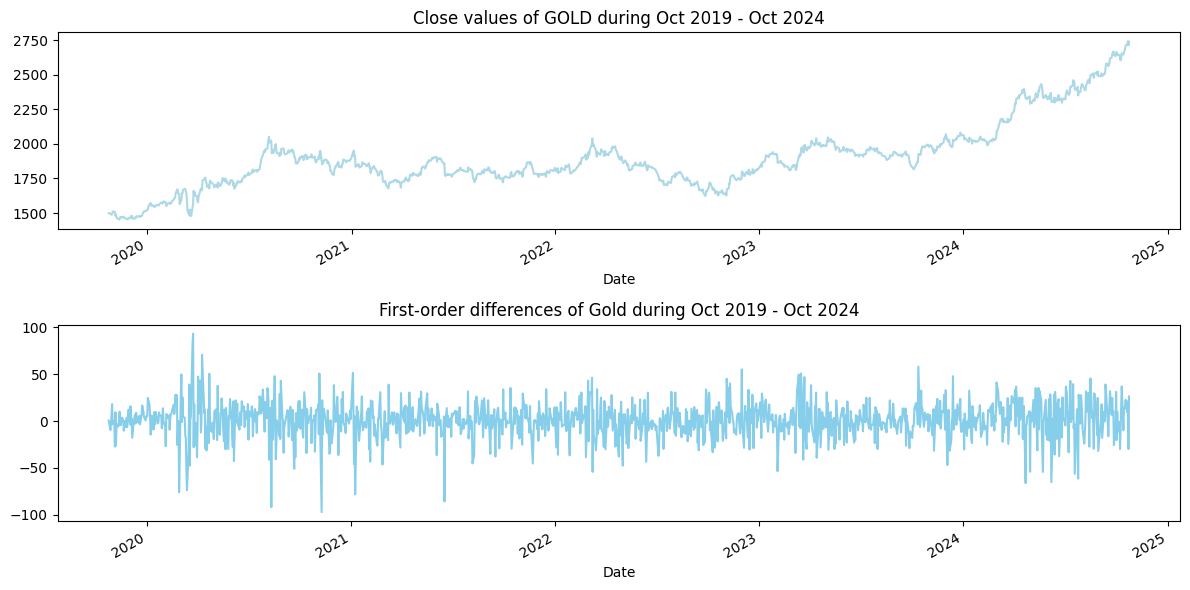

In [172]:
plt.figure(figsize = (12, 6))

plt.subplot(2, 1, 1)
gold['Close'].plot(color = 'lightblue')
plt.title('Close values of GOLD during Oct 2019 - Oct 2024')

plt.subplot(2, 1, 2)
first_order_diff.plot(color = 'skyblue')
plt.title('First-order differences of Gold during Oct 2019 - Oct 2024')

plt.tight_layout()
plt.show()

Called the "plotds" method to plot time series, Autocorrelation (ACF) and Partial Autocorrelation (PACF)

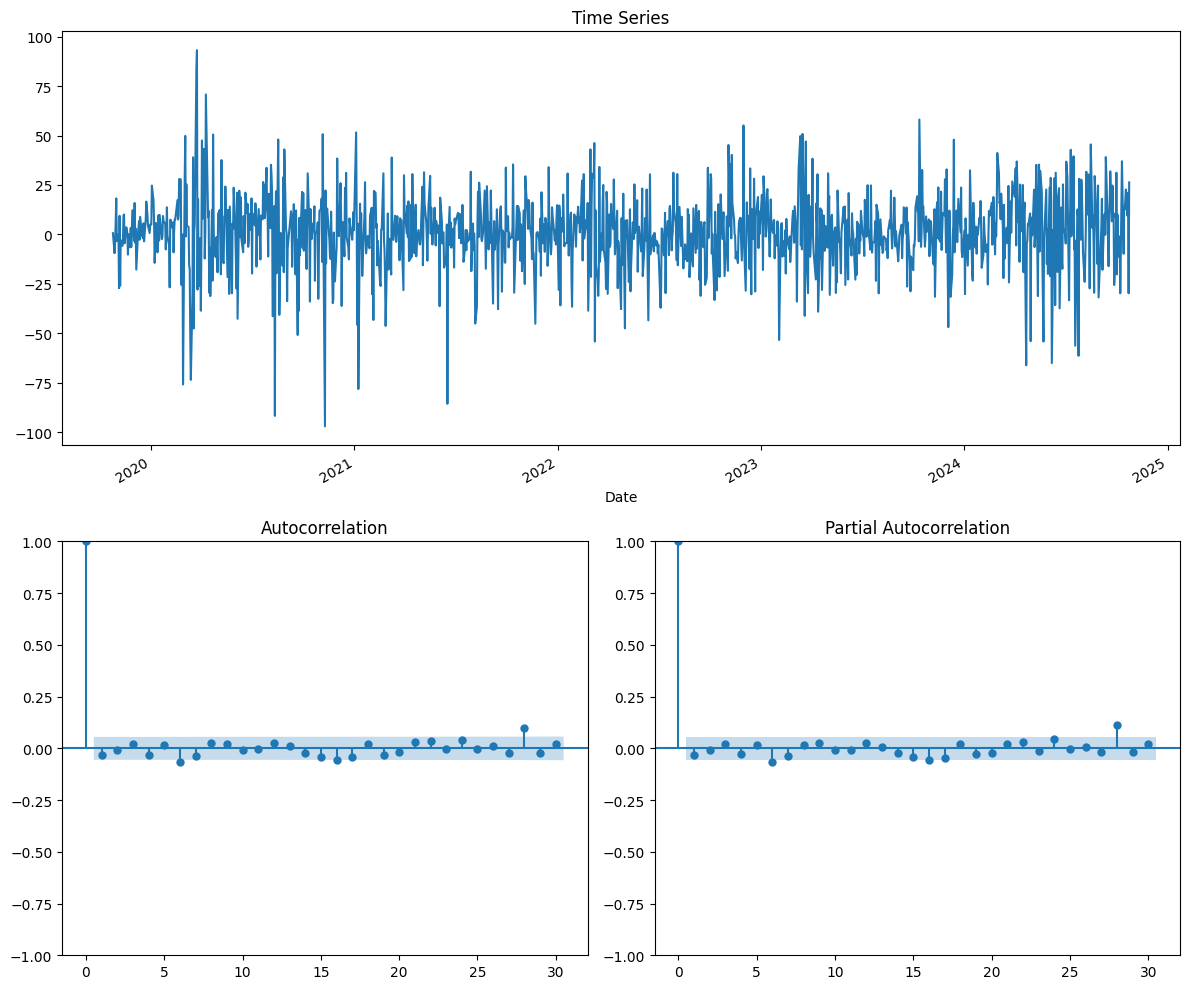

In [173]:
plotds(first_order_diff, nlag = 12)

Next, Plotting rolling statistics with "Mean and Standard Deviation" and Perform the Augmented Dickey-Fuller test

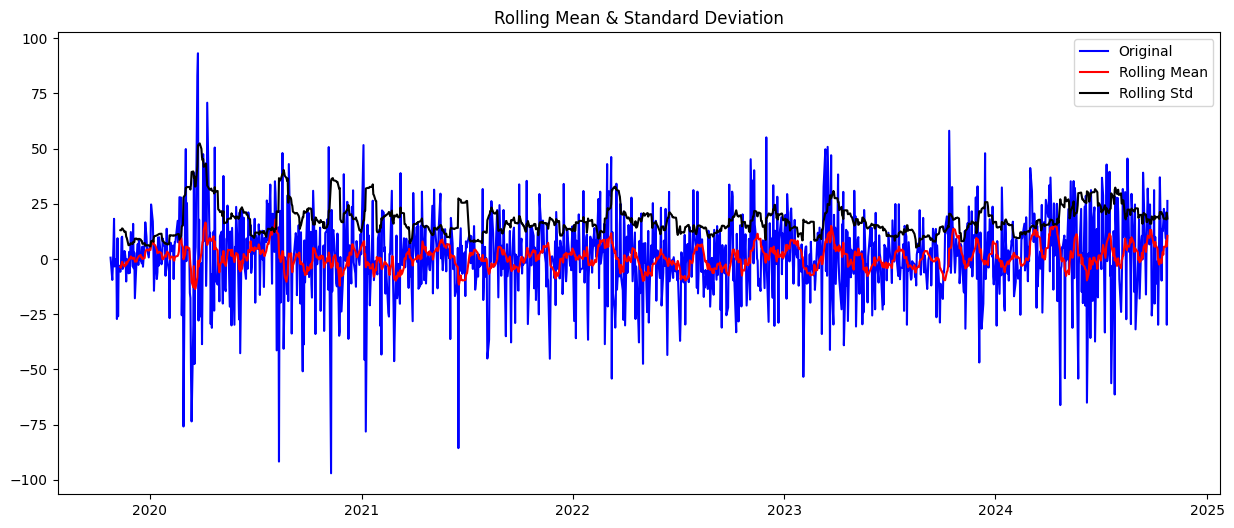

Results of Dickey Fuller Test:
Test Statistic                  -36.633406
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1257.000000
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
Critical Value (10%)             -2.567996
dtype: float64


In [174]:
# Determine rolling statistics
movingAverage = first_order_diff.rolling(window = 12).mean()
movingSTD = first_order_diff.rolling(window = 12).std()

# Plot rolling statistics
plt.figure(figsize = (15, 6))

orig = plt.plot(first_order_diff, color = 'blue', label = 'Original')
mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(first_order_diff, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

In [175]:
adf_result = adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -36.633406
p-value: 0.000000


And now seems that the Time Series data frame is Stationary after applied First-order differences.

Importing "ARIMA" from "statsmodels.tsa.arima.model" in "5 Topic".

In [176]:
from statsmodels.tsa.arima.model import ARIMA

First, creating a model called "arima" to use the "ARIMA" function, determining the appropriate parameters (p, d, q) for the ARIMA model as (1, 1, 0) from the previous results, in this case, the time series is not stationary the first value **p** the number of autoregressive, after checking the Partial Autocorrelation Function (PACF) graphic the number it will be **1**, for **d** degree of differencing as **1**, in case still have trends it will be changed for 2 and for **q** the number of moving average terms, after checking the Autocorrelation Function (ACF) graphic the number it will be **0**.

In [177]:
arima = ARIMA(gold['Close'].tolist(), order = (1, 1, 0))

arima_fit = arima.fit()

Next, it were created the "ARIMA" feature and "diffval" with the predict and difference.

In [178]:
predict = arima_fit.fittedvalues

gold['ARIMA'] = predict

diffval = arima_fit.resid + arima_fit.fittedvalues

gold['diffval'] = diffval

gold.head()

Close        ARIMA      diffval
Date                                             
2019-10-24  1498.900024     0.000000  1498.900024
2019-10-25  1499.500000  1498.883113  1499.500000
2019-10-28  1490.000000  1499.481166  1490.000000
2019-10-29  1487.000000  1490.298221  1487.000000
2019-10-30  1493.199951  1487.094175  1493.199951

Importing "sm" from "statsmodels.api" in "5 topic".

In [179]:
import statsmodels.api as sm

Next, create a "Q-Q Plot" to analyse how the points are in a distribution from the quantiles

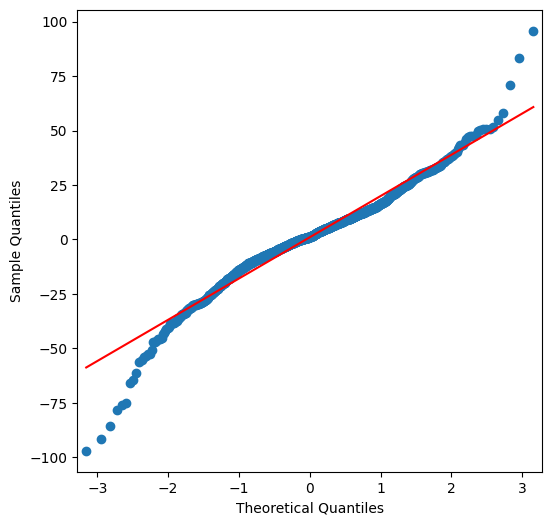

In [180]:
fig, ax = plt.subplots(figsize=(6, 6))

residuals = arima_fit.resid[2:]

sm.qqplot(residuals, line = 's', ax=ax)
plt.show()

Plotting a graphic to check "Actual x ARIMA Forecast - ARIMA"

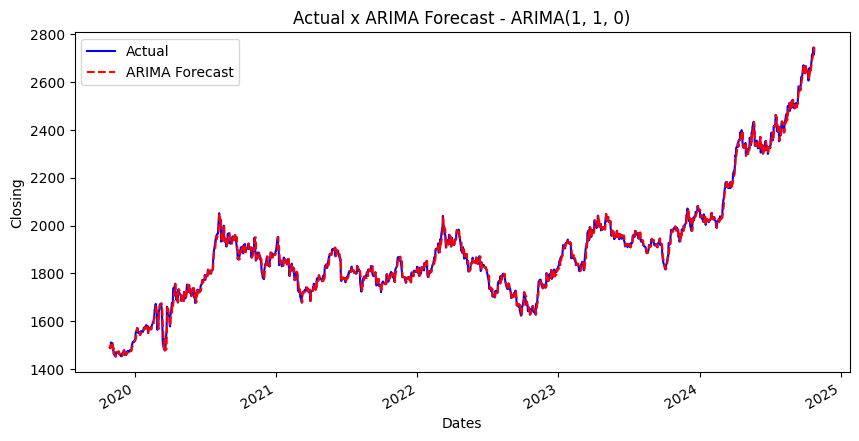

In [181]:
plt.figure(figsize = (10, 5))

gold['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', label = 'Actual')
gold['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', label = 'ARIMA Forecast')

plt.title('Actual x ARIMA Forecast - ARIMA(1, 1, 0)')
plt.xlabel('Dates')
plt.ylabel('Closing')

plt.legend()
plt.show()

Next, it getting the Confidence interval results of the prediction and forecast with 80%, 90%, 95% and 99%.

In [182]:
result = arima_fit.get_forecast()
forecast = result.predicted_mean

intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 2739.874 between 2715.586 and 2764.163
90.0% Confidence Interval: 2739.874 between 2708.700 and 2771.048
95.0% Confidence Interval: 2739.874 between 2702.728 and 2777.020
99.0% Confidence Interval: 2739.874 between 2691.056 and 2788.692


## 5.4 Time Series SARIMA 

Imported the gold dataset once again to test now "SARIMA" algorithm.

In [183]:
gold = pd.read_csv("GC=F_historical_Gold.csv")
gold.head()

Date         Open         High          Low        Close  \
0  2019-10-24  1490.500000  1501.199951  1485.900024  1498.900024   
1  2019-10-25  1501.400024  1514.300049  1499.000000  1499.500000   
2  2019-10-28  1504.099976  1504.099976  1490.000000  1490.000000   
3  2019-10-29  1485.900024  1487.000000  1485.900024  1487.000000   
4  2019-10-30  1487.199951  1495.400024  1481.000000  1493.199951   

     Adj Close  Volume  
0  1498.900024     115  
1  1499.500000      93  
2  1490.000000      37  
3  1487.000000     425  
4  1493.199951     320

Left a command comment to get just the values from 2024 since 1st January.

In [184]:
# gold = gold[gold["Date"] >= "2024-01-01"]
# gold.head()

Checking the "Dickey-Fuller" to see if the time series data set is stationary or not, in this case, is not stationary with a p-value too high almost in 1.

In [185]:
ad_fuller_result = adfuller(gold['Close'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.31794634387938164
p-value: 0.9781530368111724


Applying the differencing to convert the data in stationary and next checking the "Dickey-Fuller" once again, to confirm the stationary.

In [186]:
gold["Close Difference"] = gold["Close"] - gold["Close"].shift(1)

gold.dropna(subset = ["Close Difference"], inplace = True)
gold[["Close", "Close Difference"]].head()

Close  Close Difference
1  1499.500000          0.599976
2  1490.000000         -9.500000
3  1487.000000         -3.000000
4  1493.199951          6.199951
5  1511.400024         18.200073

In [187]:
ad_fuller_result = adfuller(gold["Close Difference"])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -36.63340557273512
p-value: 0.0


Next, plotting a line plot of the "Gold - Differenced Series" after applying the difference. 

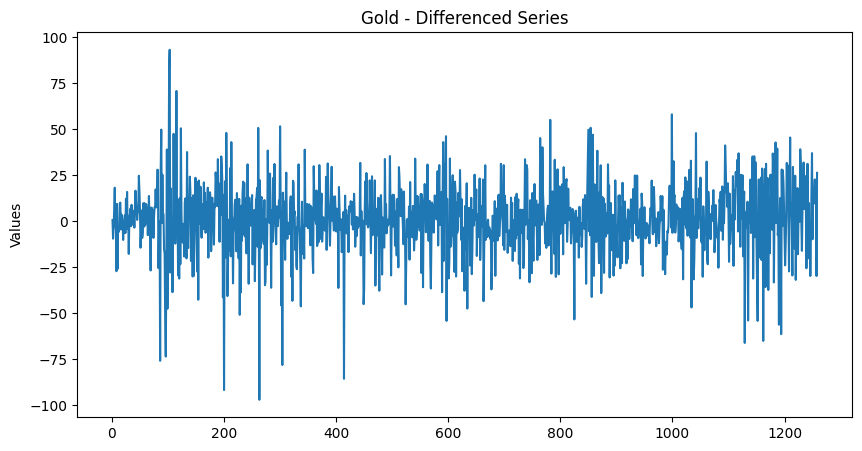

In [188]:
plt.figure(figsize = [10, 5]);

gold["Close Difference"].plot()

plt.title("Gold - Differenced Series")
plt.ylabel("Values")

plt.show()

Plotting the Autocorrelation (ACF) and Partial Autocorrelation (PACF).

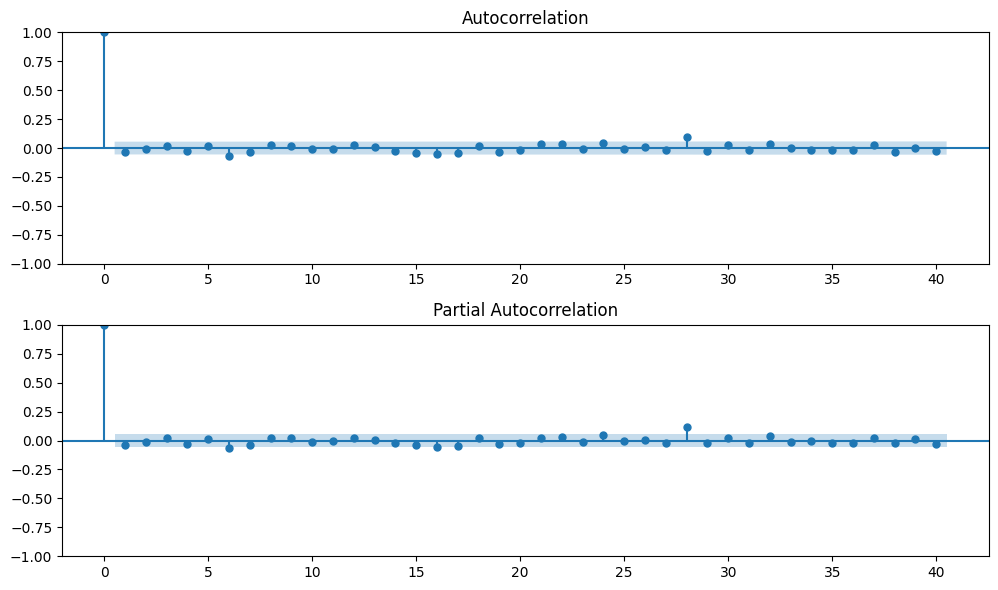

In [189]:
fig = plt.figure(figsize = (10, 6))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gold["Close Difference"], lags = 40, ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gold["Close Difference"], lags = 40, ax = ax2)

fig.tight_layout()

Importing "SARIMAX" from "statsmodels.tsa.statespace.sarimax" in "5 Topic".

In [190]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Next, create a model called "best_model" to test different parameters to get the best one.

In [191]:
best_model = SARIMAX(gold["Close"], order = (0, 0, 0), seasonal_order = (2, 1, 2, 12)).fit()

print(best_model.summary())

/opt/anaconda3/envs/DA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/DA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49158D+00    |proj g|=  1.24814D-01


 This problem is unconstrained.



At iterate    5    f=  5.48064D+00    |proj g|=  4.13006D-03

At iterate   10    f=  5.47384D+00    |proj g|=  4.37773D-03

At iterate   15    f=  5.47319D+00    |proj g|=  1.99127D-03

At iterate   20    f=  5.47297D+00    |proj g|=  8.37810D-03

At iterate   25    f=  5.47259D+00    |proj g|=  1.75826D-04

At iterate   30    f=  5.47259D+00    |proj g|=  9.44209D-05

At iterate   35    f=  5.47259D+00    |proj g|=  7.48988D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     49      1     0     0   1.604D-06   5.473D+00
  F =   5.4725877809806223     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

After get the parameters plot it using a "plot_diagnostics" plot.

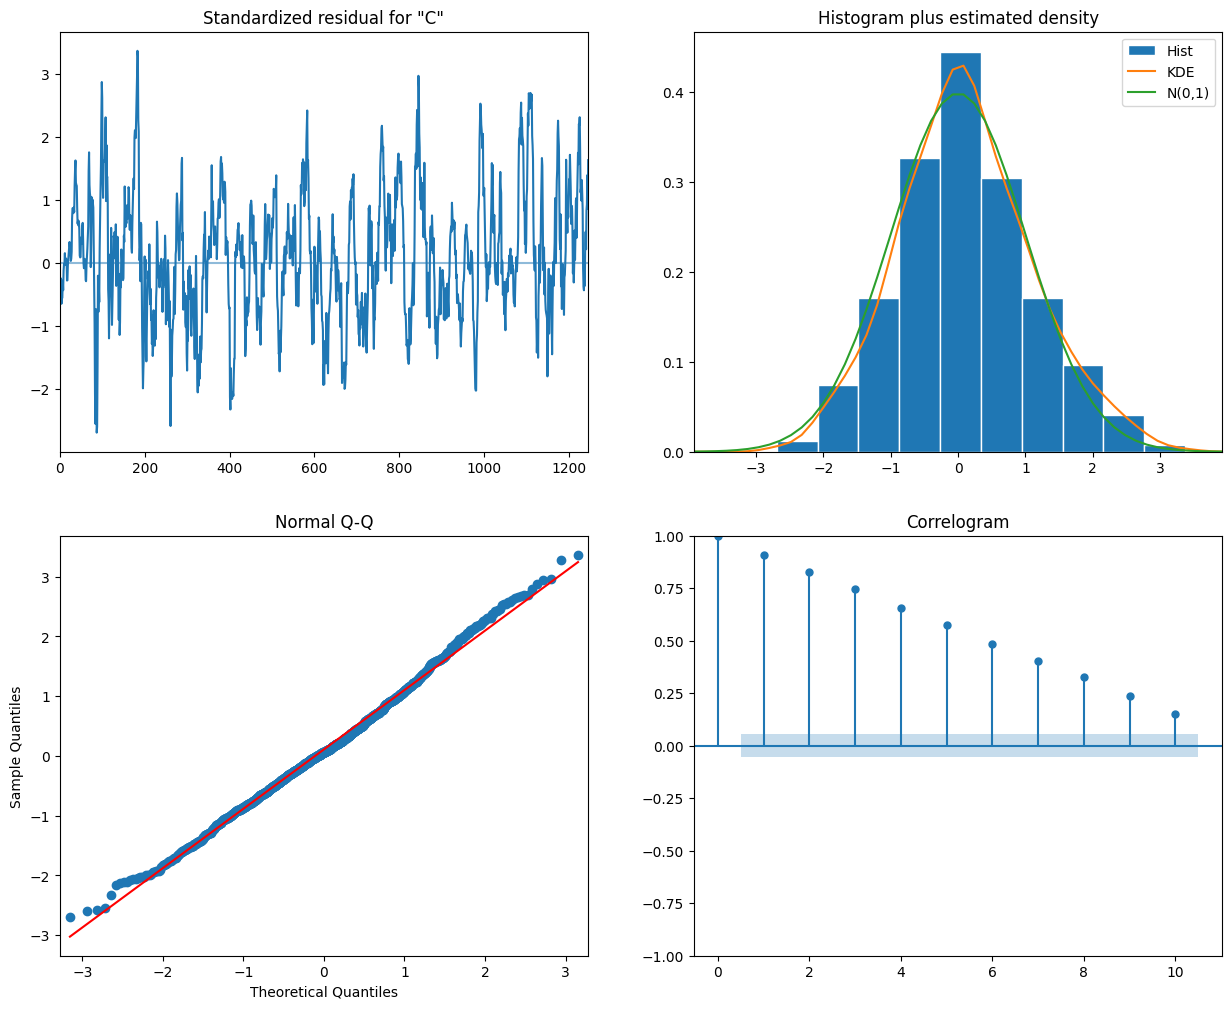

In [192]:
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

And finally plotting a Forecast plot.

/opt/anaconda3/envs/DA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


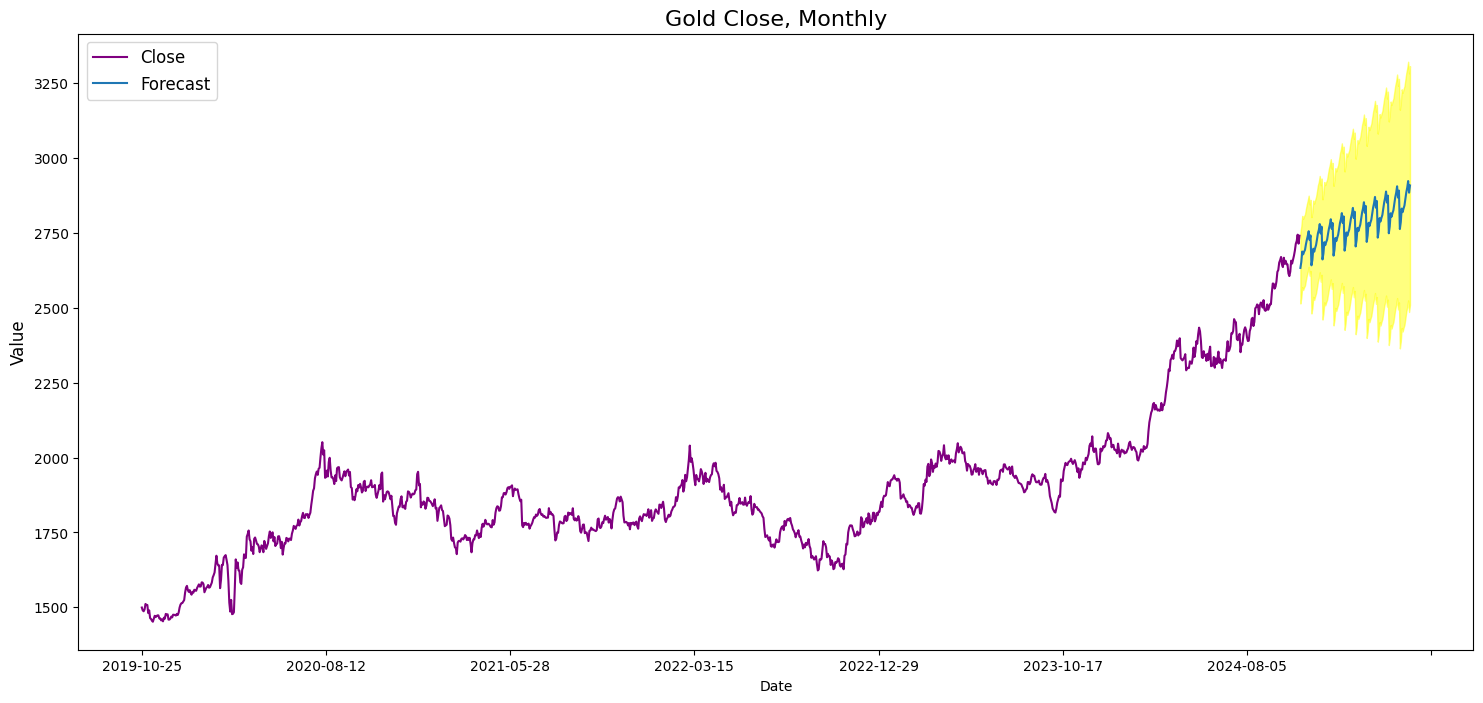

In [193]:
forecast_values = best_model.get_forecast(steps = 120)

forecast_ci = forecast_values.conf_int()

# Plot the data
ax = gold.plot(x = 'Date', y = 'Close', legend = True, color = 'purple', figsize = (18, 8))

# Plot the forecasted values 
forecast_values.predicted_mean.plot(ax = ax, label = 'Forecast', figsize = (18, 8))

# Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color = 'yellow', alpha = .5)

plt.title('Gold Close, Monthly', size = 16)
plt.ylabel('Value', size = 12)
plt.legend(loc = 'upper left', prop = {'size': 12})
ax.axes.get_xaxis().set_visible(True)

# ax.text(1, 1, 'Forecasted Values Until next month', fontsize = 12,  color = 'red')
plt.show()

**Conclusion**

After analyses with Time Series, applying ARIMA and SARIMA, the objective of "How to analyse and work with Time Series" was completed, also for the question "What would be a prediction of the value of Gold for the future?" the results seem to be very favourable for growth, there will be some drops, but the forecast is that it will continue to rise over time.

All the work was done based on studies in the classroom, reviewing examples, work and materials from classes at home, and also some research on the internet and the work found on the "Kaggle" website served as a great help in learning and being able to continue with the Time Series theme, article: "Time Series For beginners with ARIMA" (Arindam Chatterjee, 2018).

In addition to the assessment task, a free AI Writing Assistance Grammarly (Grammarly, 2009) is being used to help with English grammar while typing to check spelling. The project is available on this [link](https://github.com/CCT-College-Dublin/ca1-50-CristhianMacedo2024104) and the complete URL is available on References (Macedo, 2024).

---

# Data Dictionary 

Data Set Name:
Dry Bean Dataset

Abstract:
Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Source:
Murat KOKLU
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-2737-2360
mkoklu@selcuk.edu.tr

Ilker Ali OZKAN
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-5715-1040
ilkerozkan@selcuk.edu.tr

Data Type:
Multivariate

Task:
Classification

Attribute Type:
Categorical
Integer
Real

Area:
CS / Engineering

Format Type:
Matrix

Does your data set contain missing values?
No

Number of Instances (records in your data set): 
13611

Number of Attributes (fields within each record): 
17

Relevant Information:
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)



Relevant Papers:
KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

Citation Requests / Acknowledgements:
KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

### Additional Variable Information

1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

**Class Labels**

Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira

# References

and_and (2020). decompose() for time series: ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be [Accessed 2024].

Arindam Chatterjee (2018). Time Series For beginners with ARIMA. [online] kaggle.com. Available at: https://www.kaggle.com/code/freespirit08/time-series-for-beginners-with-arima [Accessed 25 Oct. 2024].

Baruah, I.D. (2023). All you need to know about encoding techniques! [online] ANOLYTICS. Available at: https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b [Accessed 22 Oct. 2024].

Grammarly (2009). Grammarly. [online] Grammarly.com. Available at: https://app.grammarly.com/ [Accessed 2024].

Macedo, C. (2024). Machine Learning for Business-ca1 Ft CristhianMacedo2024104. [online] GitHub. Available at: https://github.com/CCT-College-Dublin/ca1-50-CristhianMacedo2024104 [Accessed 2024].

scikit-learn developers (2023). sklearn.cluster.AgglomerativeClustering. [online] scikit-learn. Available at: https://scikit-learn.org/1.3/modules/generated/sklearn.cluster.AgglomerativeClustering.html [Accessed 2024].

scikit-learn developers (2024). sklearn.cluster.AgglomerativeClustering. [online] scikit-learn. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html [Accessed 2024].

The Pandas Development Team (2024). pandas.to_datetime — pandas 1.3.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 24 Oct. 2024].

UC Irvine Machine Learning Repository (2020). UCI Machine Learning Repository. [online] archive.ics.uci.edu. Available at: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset [Accessed 2024].

yahoo finance (2024). Gold Aug 24 (GC=F) Stock Price, News, Quote & History - Yahoo Finance. [online] Yahoo.com. Available at: https://finance.yahoo.com/quote/GC%3DF/ [Accessed 2024].